In [1]:
import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

2023-05-04 17:05:48.625070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented         2560
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented    1792
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented         717
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG16(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|                                                  | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 0s 171ms/step


  0%|                                          | 1/5121 [00:00<22:25,  3.81it/s]

1/1 [==============================] - 0s 28ms/step


  0%|                                          | 3/5121 [00:00<09:58,  8.55it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                          | 5/5121 [00:00<07:37, 11.19it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                          | 7/5121 [00:00<06:45, 12.61it/s]

1/1 [==============================] - 0s 35ms/step


  0%|                                          | 9/5121 [00:00<06:17, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                         | 11/5121 [00:00<06:09, 13.82it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                         | 13/5121 [00:01<05:55, 14.36it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                         | 15/5121 [00:01<06:02, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                        | 17/5121 [00:01<05:55, 14.35it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                        | 19/5121 [00:01<05:53, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                        | 21/5121 [00:01<05:51, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                        | 23/5121 [00:01<05:47, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                        | 25/5121 [00:01<05:39, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏                                        | 27/5121 [00:01<05:34, 15.21it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▏                                        | 29/5121 [00:02<05:27, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏                                        | 31/5121 [00:02<05:31, 15.36it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 33/5121 [00:02<05:30, 15.42it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▎                                        | 35/5121 [00:02<05:25, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▎                                        | 37/5121 [00:02<05:32, 15.27it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▎                                        | 39/5121 [00:02<05:38, 15.00it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 41/5121 [00:02<05:43, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▎                                        | 43/5121 [00:03<05:54, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▎                                        | 45/5121 [00:03<05:42, 14.81it/s]

1/1 [==============================] - 0s 44ms/step


  1%|▍                                        | 47/5121 [00:03<05:42, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                        | 49/5121 [00:03<05:32, 15.27it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                        | 51/5121 [00:03<05:24, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                        | 53/5121 [00:03<05:16, 16.02it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▍                                        | 55/5121 [00:03<05:48, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                        | 57/5121 [00:03<05:46, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                        | 59/5121 [00:04<05:44, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▍                                        | 61/5121 [00:04<05:40, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                        | 63/5121 [00:04<05:34, 15.13it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                        | 65/5121 [00:04<05:35, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▌                                        | 67/5121 [00:04<05:37, 14.99it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▌                                        | 69/5121 [00:04<05:30, 15.31it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                        | 71/5121 [00:04<05:18, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▌                                        | 73/5121 [00:05<05:09, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                        | 75/5121 [00:05<05:12, 16.14it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▌                                        | 77/5121 [00:05<05:18, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▋                                        | 79/5121 [00:05<05:13, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▋                                        | 81/5121 [00:05<05:05, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▋                                        | 83/5121 [00:05<04:59, 16.81it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▋                                        | 85/5121 [00:05<05:19, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▋                                        | 87/5121 [00:05<05:12, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▋                                        | 89/5121 [00:05<05:09, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▋                                        | 91/5121 [00:06<05:02, 16.61it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▋                                        | 93/5121 [00:06<04:57, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                        | 95/5121 [00:06<04:57, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                        | 97/5121 [00:06<04:53, 17.09it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                        | 99/5121 [00:06<04:53, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                       | 101/5121 [00:06<04:59, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                       | 103/5121 [00:06<05:06, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                       | 105/5121 [00:06<05:04, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▊                                       | 107/5121 [00:07<04:59, 16.72it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                       | 109/5121 [00:07<05:03, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                       | 111/5121 [00:07<05:00, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 113/5121 [00:07<05:00, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 115/5121 [00:07<05:08, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 117/5121 [00:07<05:02, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 119/5121 [00:07<05:00, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 121/5121 [00:07<04:58, 16.74it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 123/5121 [00:08<04:56, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▉                                       | 125/5121 [00:08<04:56, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 127/5121 [00:08<04:53, 17.00it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 129/5121 [00:08<04:52, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


  3%|█                                       | 131/5121 [00:08<04:57, 16.79it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█                                       | 133/5121 [00:08<04:55, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 135/5121 [00:08<04:54, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 137/5121 [00:08<04:53, 17.00it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 139/5121 [00:08<04:54, 16.94it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█                                       | 141/5121 [00:09<04:52, 17.01it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 143/5121 [00:09<04:51, 17.10it/s]

1/1 [==============================] - 0s 27ms/step


  3%|█▏                                      | 145/5121 [00:09<04:49, 17.22it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 147/5121 [00:09<04:47, 17.28it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 149/5121 [00:09<04:49, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▏                                      | 151/5121 [00:09<04:49, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 153/5121 [00:09<04:48, 17.22it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▏                                      | 155/5121 [00:09<04:47, 17.26it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 157/5121 [00:10<04:55, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 159/5121 [00:10<04:58, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▎                                      | 161/5121 [00:10<04:56, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▎                                      | 163/5121 [00:10<04:56, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


  3%|█▎                                      | 165/5121 [00:10<04:52, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▎                                      | 167/5121 [00:10<04:51, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▎                                      | 169/5121 [00:10<04:50, 17.07it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▎                                      | 171/5121 [00:10<04:48, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


  3%|█▎                                      | 173/5121 [00:10<04:45, 17.34it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▎                                      | 175/5121 [00:11<04:50, 17.01it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▍                                      | 177/5121 [00:11<04:51, 16.96it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▍                                      | 179/5121 [00:11<04:57, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 181/5121 [00:11<04:56, 16.65it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▍                                      | 183/5121 [00:11<05:02, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▍                                      | 185/5121 [00:11<05:02, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 187/5121 [00:11<04:57, 16.57it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 189/5121 [00:11<04:53, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 191/5121 [00:12<04:52, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


  4%|█▌                                      | 193/5121 [00:12<04:54, 16.71it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▌                                      | 195/5121 [00:12<04:53, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▌                                      | 197/5121 [00:12<04:50, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


  4%|█▌                                      | 199/5121 [00:12<04:46, 17.17it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▌                                      | 201/5121 [00:12<04:49, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▌                                      | 203/5121 [00:12<04:52, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


  4%|█▌                                      | 205/5121 [00:12<04:50, 16.91it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▌                                      | 207/5121 [00:12<04:50, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▋                                      | 209/5121 [00:13<04:52, 16.78it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▋                                      | 211/5121 [00:13<04:56, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▋                                      | 213/5121 [00:13<04:51, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▋                                      | 215/5121 [00:13<04:48, 17.02it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▋                                      | 217/5121 [00:13<04:45, 17.19it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▋                                      | 219/5121 [00:13<04:46, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


  4%|█▋                                      | 221/5121 [00:13<04:45, 17.15it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▋                                      | 223/5121 [00:13<05:04, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▊                                      | 225/5121 [00:14<05:03, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▊                                      | 227/5121 [00:14<04:56, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


  4%|█▊                                      | 229/5121 [00:14<04:55, 16.57it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▊                                      | 231/5121 [00:14<04:54, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▊                                      | 233/5121 [00:14<04:51, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


  5%|█▊                                      | 235/5121 [00:14<04:59, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


  5%|█▊                                      | 237/5121 [00:14<04:55, 16.53it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▊                                      | 239/5121 [00:14<04:58, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 241/5121 [00:15<04:59, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 243/5121 [00:15<04:56, 16.43it/s]

1/1 [==============================] - 0s 29ms/step


  5%|█▉                                      | 245/5121 [00:15<04:53, 16.62it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 247/5121 [00:15<04:51, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 249/5121 [00:15<04:48, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


  5%|█▉                                      | 251/5121 [00:15<04:50, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 253/5121 [00:15<04:45, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


  5%|█▉                                      | 255/5121 [00:15<04:43, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██                                      | 257/5121 [00:15<04:46, 16.97it/s]

1/1 [==============================] - 0s 29ms/step


  5%|██                                      | 259/5121 [00:16<04:46, 16.96it/s]

1/1 [==============================] - 0s 29ms/step


  5%|██                                      | 261/5121 [00:16<04:50, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██                                      | 263/5121 [00:16<04:50, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


  5%|██                                      | 265/5121 [00:16<04:51, 16.67it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██                                      | 267/5121 [00:16<04:49, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██                                      | 269/5121 [00:16<04:45, 17.02it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██                                      | 271/5121 [00:16<04:42, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


  5%|██▏                                     | 273/5121 [00:16<04:41, 17.20it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██▏                                     | 275/5121 [00:17<04:46, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


  5%|██▏                                     | 277/5121 [00:17<04:43, 17.11it/s]

1/1 [==============================] - 0s 29ms/step


  5%|██▏                                     | 279/5121 [00:17<04:41, 17.18it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██▏                                     | 281/5121 [00:17<04:41, 17.17it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▏                                     | 283/5121 [00:17<04:42, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▏                                     | 285/5121 [00:17<04:42, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▏                                     | 287/5121 [00:17<04:45, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


  6%|██▎                                     | 289/5121 [00:17<04:41, 17.17it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▎                                     | 291/5121 [00:17<04:38, 17.34it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▎                                     | 293/5121 [00:18<04:42, 17.07it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▎                                     | 295/5121 [00:18<04:42, 17.10it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▎                                     | 297/5121 [00:18<04:42, 17.09it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▎                                     | 299/5121 [00:18<04:46, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▎                                     | 301/5121 [00:18<04:50, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▎                                     | 303/5121 [00:18<04:48, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▍                                     | 305/5121 [00:18<04:45, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▍                                     | 307/5121 [00:18<04:43, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


  6%|██▍                                     | 309/5121 [00:19<04:43, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


  6%|██▍                                     | 311/5121 [00:19<04:44, 16.89it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▍                                     | 313/5121 [00:19<04:43, 16.96it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▍                                     | 315/5121 [00:19<04:42, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


  6%|██▍                                     | 317/5121 [00:19<04:39, 17.20it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▍                                     | 319/5121 [00:19<04:42, 17.01it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▌                                     | 321/5121 [00:19<04:42, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


  6%|██▌                                     | 323/5121 [00:19<04:38, 17.21it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▌                                     | 325/5121 [00:19<04:38, 17.19it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▌                                     | 327/5121 [00:20<04:43, 16.93it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▌                                     | 329/5121 [00:20<04:44, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


  6%|██▌                                     | 331/5121 [00:20<04:43, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


  7%|██▌                                     | 333/5121 [00:20<04:42, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▌                                     | 335/5121 [00:20<04:41, 16.99it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▋                                     | 337/5121 [00:20<04:44, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


  7%|██▋                                     | 339/5121 [00:20<04:41, 16.96it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▋                                     | 341/5121 [00:20<04:46, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


  7%|██▋                                     | 343/5121 [00:21<04:47, 16.61it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 345/5121 [00:21<04:48, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▋                                     | 347/5121 [00:21<04:49, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▋                                     | 349/5121 [00:21<04:45, 16.72it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▋                                     | 351/5121 [00:21<05:10, 15.38it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▊                                     | 353/5121 [00:21<05:04, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▊                                     | 355/5121 [00:21<05:01, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▊                                     | 357/5121 [00:21<04:57, 16.03it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▊                                     | 359/5121 [00:22<04:58, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▊                                     | 361/5121 [00:22<04:56, 16.05it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▊                                     | 363/5121 [00:22<04:52, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▊                                     | 365/5121 [00:22<04:57, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▊                                     | 367/5121 [00:22<04:56, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▉                                     | 369/5121 [00:22<04:55, 16.10it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▉                                     | 371/5121 [00:22<04:49, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▉                                     | 373/5121 [00:22<04:47, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▉                                     | 375/5121 [00:23<04:43, 16.77it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▉                                     | 377/5121 [00:23<04:41, 16.86it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▉                                     | 379/5121 [00:23<04:42, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


  7%|██▉                                     | 381/5121 [00:23<04:43, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


  7%|██▉                                     | 383/5121 [00:23<04:50, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███                                     | 385/5121 [00:23<04:49, 16.36it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███                                     | 387/5121 [00:23<04:47, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███                                     | 389/5121 [00:23<04:40, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███                                     | 391/5121 [00:23<04:42, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███                                     | 393/5121 [00:24<04:40, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███                                     | 395/5121 [00:24<04:39, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███                                     | 397/5121 [00:24<04:38, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


  8%|███                                     | 399/5121 [00:24<04:37, 17.03it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▏                                    | 401/5121 [00:24<04:41, 16.77it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▏                                    | 403/5121 [00:24<04:44, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▏                                    | 405/5121 [00:24<04:49, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▏                                    | 407/5121 [00:24<04:49, 16.27it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▏                                    | 409/5121 [00:25<04:49, 16.26it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▏                                    | 411/5121 [00:25<04:46, 16.46it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▏                                    | 413/5121 [00:25<04:44, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▏                                    | 415/5121 [00:25<04:42, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


  8%|███▎                                    | 417/5121 [00:25<04:40, 16.75it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▎                                    | 419/5121 [00:25<04:42, 16.65it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▎                                    | 421/5121 [00:25<04:40, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▎                                    | 423/5121 [00:25<04:38, 16.89it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▎                                    | 425/5121 [00:26<04:38, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


  8%|███▎                                    | 427/5121 [00:26<04:40, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▎                                    | 429/5121 [00:26<04:43, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▎                                    | 431/5121 [00:26<04:40, 16.70it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▍                                    | 433/5121 [00:26<04:44, 16.50it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▍                                    | 435/5121 [00:26<04:44, 16.47it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▍                                    | 437/5121 [00:26<04:51, 16.07it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▍                                    | 439/5121 [00:26<04:50, 16.13it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▍                                    | 441/5121 [00:27<04:50, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▍                                    | 443/5121 [00:27<04:48, 16.24it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▍                                    | 445/5121 [00:27<04:54, 15.89it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▍                                    | 447/5121 [00:27<04:57, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▌                                    | 449/5121 [00:27<04:52, 15.99it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 451/5121 [00:27<04:55, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▌                                    | 453/5121 [00:27<04:49, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▌                                    | 455/5121 [00:27<04:49, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▌                                    | 457/5121 [00:28<04:46, 16.28it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▌                                    | 459/5121 [00:28<04:42, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▌                                    | 461/5121 [00:28<04:40, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▌                                    | 463/5121 [00:28<04:40, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▋                                    | 465/5121 [00:28<04:40, 16.62it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▋                                    | 467/5121 [00:28<04:38, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▋                                    | 469/5121 [00:28<04:35, 16.90it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▋                                    | 471/5121 [00:28<04:35, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▋                                    | 473/5121 [00:29<05:02, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▋                                    | 475/5121 [00:29<04:56, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▋                                    | 477/5121 [00:29<04:52, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


  9%|███▋                                    | 479/5121 [00:29<04:51, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▊                                    | 481/5121 [00:29<04:49, 16.00it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▊                                    | 483/5121 [00:29<04:49, 16.01it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▊                                    | 485/5121 [00:29<04:46, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███▊                                    | 487/5121 [00:29<04:43, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███▊                                    | 489/5121 [00:29<04:40, 16.50it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███▊                                    | 491/5121 [00:30<04:43, 16.32it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▊                                    | 493/5121 [00:30<04:41, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███▊                                    | 495/5121 [00:30<04:45, 16.23it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 497/5121 [00:30<04:40, 16.46it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███▉                                    | 499/5121 [00:30<04:43, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███▉                                    | 501/5121 [00:30<04:44, 16.26it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███▉                                    | 503/5121 [00:30<04:42, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███▉                                    | 505/5121 [00:30<04:39, 16.53it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███▉                                    | 507/5121 [00:31<04:44, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███▉                                    | 509/5121 [00:31<04:42, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███▉                                    | 511/5121 [00:31<04:40, 16.41it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████                                    | 513/5121 [00:31<04:46, 16.11it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 515/5121 [00:31<04:42, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 10%|████                                    | 517/5121 [00:31<04:44, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████                                    | 519/5121 [00:31<04:39, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████                                    | 521/5121 [00:31<04:36, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████                                    | 523/5121 [00:32<04:36, 16.65it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████                                    | 525/5121 [00:32<04:41, 16.35it/s]

1/1 [==============================] - 0s 29ms/step


 10%|████                                    | 527/5121 [00:32<04:42, 16.26it/s]

1/1 [==============================] - 0s 29ms/step


 10%|████▏                                   | 529/5121 [00:32<04:48, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████▏                                   | 531/5121 [00:32<04:45, 16.07it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████▏                                   | 533/5121 [00:32<04:46, 16.01it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████▏                                   | 535/5121 [00:32<04:45, 16.08it/s]

1/1 [==============================] - 0s 29ms/step


 10%|████▏                                   | 537/5121 [00:32<04:44, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▏                                   | 539/5121 [00:33<04:40, 16.34it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▏                                   | 541/5121 [00:33<04:37, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▏                                   | 543/5121 [00:33<04:39, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▎                                   | 545/5121 [00:33<04:40, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▎                                   | 547/5121 [00:33<04:40, 16.29it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 549/5121 [00:33<05:09, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▎                                   | 551/5121 [00:33<05:01, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▎                                   | 553/5121 [00:33<04:59, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▎                                   | 555/5121 [00:34<04:57, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▎                                   | 557/5121 [00:34<04:58, 15.31it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▎                                   | 559/5121 [00:34<04:49, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▍                                   | 561/5121 [00:34<04:44, 16.04it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▍                                   | 563/5121 [00:34<04:48, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████▍                                   | 565/5121 [00:34<04:48, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▍                                   | 567/5121 [00:34<04:45, 15.94it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 569/5121 [00:34<04:43, 16.08it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▍                                   | 571/5121 [00:35<04:40, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▍                                   | 573/5121 [00:35<04:38, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▍                                   | 575/5121 [00:35<04:36, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▌                                   | 577/5121 [00:35<04:33, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▌                                   | 579/5121 [00:35<04:32, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▌                                   | 581/5121 [00:35<05:10, 14.63it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▌                                   | 583/5121 [00:35<05:02, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▌                                   | 585/5121 [00:35<05:01, 15.04it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▌                                   | 587/5121 [00:36<04:55, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▌                                   | 589/5121 [00:36<05:18, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▌                                   | 591/5121 [00:36<05:05, 14.81it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▋                                   | 593/5121 [00:36<04:55, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▋                                   | 595/5121 [00:36<04:50, 15.59it/s]

1/1 [==============================] - 0s 30ms/step


 12%|████▋                                   | 597/5121 [00:36<04:44, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▋                                   | 599/5121 [00:36<04:42, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▋                                   | 601/5121 [00:37<04:39, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▋                                   | 603/5121 [00:37<04:35, 16.38it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▋                                   | 605/5121 [00:37<04:36, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▋                                   | 607/5121 [00:37<04:35, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▊                                   | 609/5121 [00:37<04:35, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████▊                                   | 611/5121 [00:37<04:37, 16.24it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 613/5121 [00:37<04:36, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▊                                   | 615/5121 [00:37<04:33, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▊                                   | 617/5121 [00:37<04:37, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▊                                   | 619/5121 [00:38<04:36, 16.31it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 621/5121 [00:38<04:35, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▊                                   | 623/5121 [00:38<04:35, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▉                                   | 625/5121 [00:38<04:37, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▉                                   | 627/5121 [00:38<04:36, 16.26it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▉                                   | 629/5121 [00:38<04:32, 16.45it/s]

1/1 [==============================] - 0s 30ms/step


 12%|████▉                                   | 631/5121 [00:38<04:32, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████▉                                   | 633/5121 [00:38<04:31, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▉                                   | 635/5121 [00:39<04:39, 16.04it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▉                                   | 637/5121 [00:39<04:37, 16.15it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▉                                   | 639/5121 [00:39<04:42, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████                                   | 641/5121 [00:39<04:40, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████                                   | 643/5121 [00:39<04:46, 15.65it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█████                                   | 645/5121 [00:39<04:49, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████                                   | 647/5121 [00:39<04:40, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████                                   | 649/5121 [00:39<04:38, 16.08it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████                                   | 651/5121 [00:40<04:33, 16.32it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████                                   | 653/5121 [00:40<04:34, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████                                   | 655/5121 [00:40<04:34, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▏                                  | 657/5121 [00:40<04:34, 16.27it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▏                                  | 659/5121 [00:40<04:30, 16.47it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████▏                                  | 661/5121 [00:40<04:32, 16.36it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▏                                  | 663/5121 [00:40<04:28, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▏                                  | 665/5121 [00:40<04:31, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▏                                  | 667/5121 [00:41<04:30, 16.48it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▏                                  | 669/5121 [00:41<04:34, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▏                                  | 671/5121 [00:41<04:39, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 673/5121 [00:41<04:43, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 675/5121 [00:41<04:41, 15.81it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█████▎                                  | 677/5121 [00:41<04:38, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▎                                  | 679/5121 [00:41<04:33, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▎                                  | 681/5121 [00:41<04:33, 16.26it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████▎                                  | 683/5121 [00:42<04:31, 16.36it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 685/5121 [00:42<04:28, 16.54it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▎                                  | 687/5121 [00:42<04:27, 16.60it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▍                                  | 689/5121 [00:42<04:34, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▍                                  | 691/5121 [00:42<04:32, 16.27it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▍                                  | 693/5121 [00:42<04:32, 16.26it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▍                                  | 695/5121 [00:42<04:31, 16.28it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 697/5121 [00:42<04:34, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 699/5121 [00:43<04:33, 16.16it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█████▍                                  | 701/5121 [00:43<05:02, 14.61it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 703/5121 [00:43<04:55, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▌                                  | 705/5121 [00:43<04:49, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▌                                  | 707/5121 [00:43<04:52, 15.09it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▌                                  | 709/5121 [00:43<04:45, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▌                                  | 711/5121 [00:43<04:40, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▌                                  | 713/5121 [00:43<04:42, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▌                                  | 715/5121 [00:44<04:39, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▌                                  | 717/5121 [00:44<06:29, 11.32it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▌                                  | 719/5121 [00:44<05:51, 12.54it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 721/5121 [00:44<05:24, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 723/5121 [00:44<05:05, 14.41it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 725/5121 [00:44<04:52, 15.01it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▋                                  | 727/5121 [00:44<04:44, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 729/5121 [00:45<04:38, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 731/5121 [00:45<04:39, 15.72it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▋                                  | 733/5121 [00:45<04:38, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 735/5121 [00:45<04:32, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█████▊                                  | 737/5121 [00:45<04:31, 16.15it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▊                                  | 739/5121 [00:45<04:28, 16.31it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▊                                  | 741/5121 [00:45<04:31, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▊                                  | 743/5121 [00:45<04:33, 15.98it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▊                                  | 745/5121 [00:46<04:31, 16.10it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▊                                  | 747/5121 [00:46<04:30, 16.19it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█████▊                                  | 749/5121 [00:46<04:31, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▊                                  | 751/5121 [00:46<04:30, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▉                                  | 753/5121 [00:46<04:31, 16.07it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▉                                  | 755/5121 [00:46<04:30, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▉                                  | 757/5121 [00:46<04:28, 16.26it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█████▉                                  | 759/5121 [00:46<04:28, 16.27it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▉                                  | 761/5121 [00:47<04:29, 16.17it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▉                                  | 763/5121 [00:47<04:33, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▉                                  | 765/5121 [00:47<04:33, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▉                                  | 767/5121 [00:47<04:34, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 15%|██████                                  | 769/5121 [00:47<04:34, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 771/5121 [00:47<04:43, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 773/5121 [00:47<04:36, 15.71it/s]

1/1 [==============================] - 0s 34ms/step


 15%|██████                                  | 775/5121 [00:47<04:33, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 15%|██████                                  | 777/5121 [00:48<04:32, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████                                  | 779/5121 [00:48<04:37, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 781/5121 [00:48<04:33, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 15%|██████                                  | 783/5121 [00:48<04:30, 16.04it/s]

1/1 [==============================] - 0s 32ms/step


 15%|██████▏                                 | 785/5121 [00:48<04:38, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████▏                                 | 787/5121 [00:48<04:34, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████▏                                 | 789/5121 [00:48<05:08, 14.06it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████▏                                 | 791/5121 [00:49<05:05, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████▏                                 | 793/5121 [00:49<04:56, 14.59it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▏                                 | 795/5121 [00:49<04:51, 14.82it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▏                                 | 797/5121 [00:49<04:51, 14.83it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▏                                 | 799/5121 [00:49<04:52, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▎                                 | 801/5121 [00:49<04:47, 15.03it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▎                                 | 803/5121 [00:49<04:40, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▎                                 | 805/5121 [00:49<04:41, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▎                                 | 807/5121 [00:50<04:38, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▎                                 | 809/5121 [00:50<04:35, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▎                                 | 811/5121 [00:50<04:57, 14.47it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▎                                 | 813/5121 [00:50<04:46, 15.06it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▎                                 | 815/5121 [00:50<04:39, 15.43it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▍                                 | 817/5121 [00:50<04:33, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▍                                 | 819/5121 [00:50<04:31, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▍                                 | 821/5121 [00:50<04:28, 16.02it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▍                                 | 823/5121 [00:51<04:25, 16.18it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▍                                 | 825/5121 [00:51<04:28, 16.02it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▍                                 | 827/5121 [00:51<04:26, 16.12it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▍                                 | 829/5121 [00:51<04:27, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▍                                 | 831/5121 [00:51<04:26, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▌                                 | 833/5121 [00:51<04:27, 16.02it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▌                                 | 835/5121 [00:51<04:33, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▌                                 | 837/5121 [00:51<04:29, 15.90it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▌                                 | 839/5121 [00:52<04:22, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▌                                 | 841/5121 [00:52<04:26, 16.03it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▌                                 | 843/5121 [00:52<04:29, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▌                                 | 845/5121 [00:52<04:25, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 17%|██████▌                                 | 847/5121 [00:52<04:21, 16.35it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▋                                 | 849/5121 [00:52<04:20, 16.38it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▋                                 | 851/5121 [00:52<04:22, 16.27it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▋                                 | 853/5121 [00:52<04:22, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▋                                 | 855/5121 [00:53<04:22, 16.24it/s]

1/1 [==============================] - 0s 30ms/step


 17%|██████▋                                 | 857/5121 [00:53<04:22, 16.24it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▋                                 | 859/5121 [00:53<04:26, 15.99it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▋                                 | 861/5121 [00:53<04:25, 16.02it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▋                                 | 863/5121 [00:53<04:22, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▊                                 | 865/5121 [00:53<04:24, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▊                                 | 867/5121 [00:53<04:21, 16.24it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▊                                 | 869/5121 [00:53<04:21, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▊                                 | 871/5121 [00:54<04:20, 16.33it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▊                                 | 873/5121 [00:54<04:24, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▊                                 | 875/5121 [00:54<04:28, 15.83it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▊                                 | 877/5121 [00:54<04:31, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▊                                 | 879/5121 [00:54<04:26, 15.94it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▉                                 | 881/5121 [00:54<04:28, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▉                                 | 883/5121 [00:54<04:25, 15.96it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▉                                 | 885/5121 [00:54<04:23, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▉                                 | 887/5121 [00:55<04:23, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▉                                 | 889/5121 [00:55<04:21, 16.16it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▉                                 | 891/5121 [00:55<04:23, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▉                                 | 893/5121 [00:55<04:19, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 17%|██████▉                                 | 895/5121 [00:55<04:18, 16.36it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████                                 | 897/5121 [00:55<04:23, 16.03it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████                                 | 899/5121 [00:55<04:23, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████                                 | 901/5121 [00:55<04:25, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████                                 | 903/5121 [00:56<04:27, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████                                 | 905/5121 [00:56<04:25, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████                                 | 907/5121 [00:56<04:24, 15.94it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████                                 | 909/5121 [00:56<04:22, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████                                 | 911/5121 [00:56<04:22, 16.01it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▏                                | 913/5121 [00:56<04:25, 15.85it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████▏                                | 915/5121 [00:56<04:26, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▏                                | 917/5121 [00:57<04:55, 14.22it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████▏                                | 919/5121 [00:57<04:42, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████▏                                | 921/5121 [00:57<04:39, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████▏                                | 923/5121 [00:57<04:32, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████▏                                | 925/5121 [00:57<04:26, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████▏                                | 927/5121 [00:57<04:22, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████▎                                | 929/5121 [00:57<04:25, 15.79it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████▎                                | 931/5121 [00:57<04:32, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 933/5121 [00:58<04:35, 15.20it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 935/5121 [00:58<04:27, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 937/5121 [00:58<04:24, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████▎                                | 939/5121 [00:58<04:27, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████▎                                | 941/5121 [00:58<04:32, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 943/5121 [00:58<04:33, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████▍                                | 945/5121 [00:58<04:24, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▍                                | 947/5121 [00:58<04:21, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▍                                | 949/5121 [00:59<04:23, 15.86it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 951/5121 [00:59<04:21, 15.93it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 953/5121 [00:59<04:24, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▍                                | 955/5121 [00:59<04:25, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▍                                | 957/5121 [00:59<04:22, 15.83it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 959/5121 [00:59<04:30, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 961/5121 [00:59<04:25, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▌                                | 963/5121 [00:59<04:24, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 965/5121 [01:00<04:21, 15.92it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▌                                | 967/5121 [01:00<04:23, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 969/5121 [01:00<04:18, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▌                                | 971/5121 [01:00<04:15, 16.26it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 973/5121 [01:00<04:12, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▌                                | 975/5121 [01:00<04:08, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▋                                | 977/5121 [01:00<04:12, 16.40it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▋                                | 979/5121 [01:00<04:13, 16.35it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▋                                | 981/5121 [01:01<04:13, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▋                                | 983/5121 [01:01<04:14, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▋                                | 985/5121 [01:01<04:18, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▋                                | 987/5121 [01:01<04:22, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▋                                | 989/5121 [01:01<04:20, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▋                                | 991/5121 [01:01<04:20, 15.87it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▊                                | 993/5121 [01:01<04:23, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▊                                | 995/5121 [01:01<04:48, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▊                                | 997/5121 [01:02<04:37, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                                | 999/5121 [01:02<04:29, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▌                               | 1001/5121 [01:02<04:29, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▋                               | 1003/5121 [01:02<04:28, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▋                               | 1005/5121 [01:02<04:22, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▋                               | 1007/5121 [01:02<04:22, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▋                               | 1009/5121 [01:02<04:19, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▋                               | 1011/5121 [01:02<04:17, 15.94it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▋                               | 1013/5121 [01:03<04:32, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▋                               | 1015/5121 [01:03<04:33, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▋                               | 1017/5121 [01:03<05:10, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                               | 1019/5121 [01:03<04:59, 13.72it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▊                               | 1021/5121 [01:03<04:44, 14.41it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▊                               | 1023/5121 [01:03<04:38, 14.69it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▊                               | 1025/5121 [01:03<04:36, 14.80it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▊                               | 1027/5121 [01:04<04:28, 15.23it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▊                               | 1029/5121 [01:04<04:22, 15.62it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                               | 1031/5121 [01:04<04:22, 15.59it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▊                               | 1033/5121 [01:04<04:17, 15.88it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▉                               | 1035/5121 [01:04<04:17, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▉                               | 1037/5121 [01:04<04:13, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▉                               | 1039/5121 [01:04<04:13, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▉                               | 1041/5121 [01:04<04:11, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▉                               | 1043/5121 [01:05<04:07, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████▉                               | 1045/5121 [01:05<04:08, 16.39it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1047/5121 [01:05<04:11, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▉                               | 1049/5121 [01:05<04:11, 16.19it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████                               | 1051/5121 [01:05<04:15, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████                               | 1053/5121 [01:05<04:11, 16.15it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████                               | 1055/5121 [01:05<04:09, 16.28it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1057/5121 [01:05<04:12, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████                               | 1059/5121 [01:06<04:08, 16.32it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████                               | 1061/5121 [01:06<04:17, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████                               | 1063/5121 [01:06<04:13, 16.02it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1065/5121 [01:06<04:14, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▏                              | 1067/5121 [01:06<04:12, 16.03it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▏                              | 1069/5121 [01:06<04:16, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▏                              | 1071/5121 [01:06<04:15, 15.86it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1073/5121 [01:06<04:18, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▏                              | 1075/5121 [01:07<04:16, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▏                              | 1077/5121 [01:07<04:13, 15.95it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▏                              | 1079/5121 [01:07<04:10, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▏                              | 1081/5121 [01:07<04:07, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████▏                              | 1083/5121 [01:07<04:09, 16.16it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▎                              | 1085/5121 [01:07<04:15, 15.82it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                              | 1087/5121 [01:07<04:12, 15.99it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                              | 1089/5121 [01:07<04:14, 15.84it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████▎                              | 1091/5121 [01:08<04:11, 16.05it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                              | 1093/5121 [01:08<04:15, 15.77it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                              | 1095/5121 [01:08<04:14, 15.83it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                              | 1097/5121 [01:08<04:16, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▎                              | 1099/5121 [01:08<04:21, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▍                              | 1101/5121 [01:08<04:23, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1103/5121 [01:08<04:21, 15.37it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▍                              | 1105/5121 [01:09<04:29, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▍                              | 1107/5121 [01:09<04:24, 15.18it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▍                              | 1109/5121 [01:09<04:22, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▍                              | 1111/5121 [01:09<04:43, 14.12it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▍                              | 1113/5121 [01:09<04:32, 14.70it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▍                              | 1115/5121 [01:09<04:24, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▌                              | 1117/5121 [01:09<04:19, 15.43it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████▌                              | 1119/5121 [01:09<04:15, 15.69it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▌                              | 1121/5121 [01:10<04:16, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▌                              | 1123/5121 [01:10<04:10, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▌                              | 1125/5121 [01:10<04:13, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▌                              | 1127/5121 [01:10<04:09, 15.99it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1129/5121 [01:10<04:12, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▌                              | 1131/5121 [01:10<04:12, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████▋                              | 1133/5121 [01:10<04:11, 15.85it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1135/5121 [01:10<04:10, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▋                              | 1137/5121 [01:11<04:07, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████▋                              | 1139/5121 [01:11<04:06, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▋                              | 1141/5121 [01:11<04:07, 16.06it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1143/5121 [01:11<04:08, 16.03it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████▋                              | 1145/5121 [01:11<04:05, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▋                              | 1147/5121 [01:11<04:08, 15.98it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▊                              | 1149/5121 [01:11<04:17, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▊                              | 1151/5121 [01:11<04:14, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▊                              | 1153/5121 [01:12<04:11, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▊                              | 1155/5121 [01:12<04:14, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▊                              | 1157/5121 [01:12<04:13, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▊                              | 1159/5121 [01:12<04:10, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▊                              | 1161/5121 [01:12<04:07, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▊                              | 1163/5121 [01:12<04:09, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▊                              | 1165/5121 [01:12<04:19, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▉                              | 1167/5121 [01:12<04:16, 15.44it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1169/5121 [01:13<04:18, 15.31it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▉                              | 1171/5121 [01:13<04:14, 15.51it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▉                              | 1173/5121 [01:13<04:16, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▉                              | 1175/5121 [01:13<04:22, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


 23%|████████▉                              | 1177/5121 [01:13<04:15, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▉                              | 1179/5121 [01:13<04:13, 15.56it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▉                              | 1181/5121 [01:13<04:10, 15.71it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                              | 1183/5121 [01:13<04:11, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████                              | 1185/5121 [01:14<04:07, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████                              | 1187/5121 [01:14<04:11, 15.65it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1189/5121 [01:14<04:09, 15.75it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                              | 1191/5121 [01:14<04:10, 15.66it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████                              | 1193/5121 [01:14<04:16, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████                              | 1195/5121 [01:14<04:13, 15.48it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████                              | 1197/5121 [01:14<04:12, 15.52it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████▏                             | 1199/5121 [01:15<04:10, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████▏                             | 1201/5121 [01:15<04:15, 15.35it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████▏                             | 1203/5121 [01:15<04:13, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▏                             | 1205/5121 [01:15<04:12, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▏                             | 1207/5121 [01:15<04:06, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▏                             | 1209/5121 [01:15<04:04, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▏                             | 1211/5121 [01:15<04:30, 14.47it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▏                             | 1213/5121 [01:15<04:24, 14.76it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▎                             | 1215/5121 [01:16<04:21, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▎                             | 1217/5121 [01:16<04:15, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 24%|█████████▎                             | 1219/5121 [01:16<04:12, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▎                             | 1221/5121 [01:16<04:08, 15.67it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▎                             | 1223/5121 [01:16<04:07, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▎                             | 1225/5121 [01:16<04:03, 15.99it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1227/5121 [01:16<04:01, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▎                             | 1229/5121 [01:16<04:05, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▎                             | 1231/5121 [01:17<04:01, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                             | 1233/5121 [01:17<03:58, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 24%|█████████▍                             | 1235/5121 [01:17<04:04, 15.90it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                             | 1237/5121 [01:17<04:07, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 24%|█████████▍                             | 1239/5121 [01:17<04:03, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                             | 1241/5121 [01:17<04:02, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                             | 1243/5121 [01:17<03:59, 16.18it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▍                             | 1245/5121 [01:17<04:02, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                             | 1247/5121 [01:18<04:03, 15.90it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▌                             | 1249/5121 [01:18<04:07, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▌                             | 1251/5121 [01:18<04:05, 15.76it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▌                             | 1253/5121 [01:18<04:03, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▌                             | 1255/5121 [01:18<04:11, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▌                             | 1257/5121 [01:18<04:06, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▌                             | 1259/5121 [01:18<04:04, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▌                             | 1261/5121 [01:18<04:01, 15.96it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▌                             | 1263/5121 [01:19<04:02, 15.89it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▋                             | 1265/5121 [01:19<04:05, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▋                             | 1267/5121 [01:19<04:03, 15.83it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▋                             | 1269/5121 [01:19<04:01, 15.94it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▋                             | 1271/5121 [01:19<04:04, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▋                             | 1273/5121 [01:19<04:06, 15.61it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▋                             | 1275/5121 [01:19<04:07, 15.55it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▋                             | 1277/5121 [01:19<04:04, 15.71it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1279/5121 [01:20<04:11, 15.29it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▊                             | 1281/5121 [01:20<04:11, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▊                             | 1283/5121 [01:20<04:15, 15.03it/s]

1/1 [==============================] - 0s 43ms/step


 25%|█████████▊                             | 1285/5121 [01:20<04:32, 14.08it/s]

1/1 [==============================] - 0s 37ms/step


 25%|█████████▊                             | 1287/5121 [01:20<04:41, 13.62it/s]

1/1 [==============================] - 0s 42ms/step


 25%|█████████▊                             | 1289/5121 [01:20<04:41, 13.60it/s]

1/1 [==============================] - 0s 28ms/step


 25%|█████████▊                             | 1291/5121 [01:21<04:41, 13.59it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▊                             | 1293/5121 [01:21<04:46, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▊                             | 1295/5121 [01:21<05:21, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


 25%|█████████▉                             | 1297/5121 [01:21<05:23, 11.82it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▉                             | 1299/5121 [01:21<05:15, 12.12it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▉                             | 1301/5121 [01:21<05:02, 12.63it/s]

1/1 [==============================] - 0s 57ms/step


 25%|█████████▉                             | 1303/5121 [01:22<05:05, 12.52it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▉                             | 1305/5121 [01:22<04:47, 13.26it/s]

1/1 [==============================] - 0s 30ms/step


 26%|█████████▉                             | 1307/5121 [01:22<04:31, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


 26%|█████████▉                             | 1309/5121 [01:22<04:28, 14.20it/s]

1/1 [==============================] - 0s 30ms/step


 26%|█████████▉                             | 1311/5121 [01:22<04:23, 14.48it/s]

1/1 [==============================] - 0s 30ms/step


 26%|█████████▉                             | 1313/5121 [01:22<04:16, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████                             | 1315/5121 [01:22<04:11, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1317/5121 [01:22<04:15, 14.92it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1319/5121 [01:23<04:14, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████                             | 1321/5121 [01:23<04:12, 15.06it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████                             | 1323/5121 [01:23<04:16, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1325/5121 [01:23<04:08, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1327/5121 [01:23<04:09, 15.20it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1329/5121 [01:23<04:10, 15.14it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▏                            | 1331/5121 [01:23<04:05, 15.47it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██████████▏                            | 1333/5121 [01:23<04:01, 15.66it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▏                            | 1335/5121 [01:24<04:06, 15.37it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1337/5121 [01:24<04:08, 15.23it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▏                            | 1339/5121 [01:24<04:04, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██████████▏                            | 1341/5121 [01:24<04:01, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▏                            | 1343/5121 [01:24<03:59, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██████████▏                            | 1345/5121 [01:24<03:58, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▎                            | 1347/5121 [01:24<03:56, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██████████▎                            | 1349/5121 [01:24<03:57, 15.85it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████▎                            | 1351/5121 [01:25<03:56, 15.97it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▎                            | 1353/5121 [01:25<03:53, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▎                            | 1355/5121 [01:25<03:59, 15.71it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▎                            | 1357/5121 [01:25<03:59, 15.70it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▎                            | 1359/5121 [01:25<03:58, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▎                            | 1361/5121 [01:25<03:54, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▍                            | 1363/5121 [01:25<03:55, 15.98it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▍                            | 1365/5121 [01:25<03:56, 15.90it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▍                            | 1367/5121 [01:26<03:57, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▍                            | 1369/5121 [01:26<03:55, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▍                            | 1371/5121 [01:26<03:55, 15.94it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▍                            | 1373/5121 [01:26<03:56, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▍                            | 1375/5121 [01:26<03:53, 16.06it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▍                            | 1377/5121 [01:26<03:54, 15.97it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▌                            | 1379/5121 [01:26<03:57, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                            | 1381/5121 [01:26<03:58, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                            | 1383/5121 [01:27<03:54, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▌                            | 1385/5121 [01:27<03:52, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                            | 1387/5121 [01:27<04:14, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                            | 1389/5121 [01:27<04:09, 14.96it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██████████▌                            | 1391/5121 [01:27<04:10, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▌                            | 1393/5121 [01:27<04:07, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                            | 1395/5121 [01:27<04:04, 15.23it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▋                            | 1397/5121 [01:28<04:05, 15.16it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▋                            | 1399/5121 [01:28<04:03, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▋                            | 1401/5121 [01:28<03:58, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▋                            | 1403/5121 [01:28<03:56, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▋                            | 1405/5121 [01:28<03:52, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▋                            | 1407/5121 [01:28<03:52, 15.97it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▋                            | 1409/5121 [01:28<03:55, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▋                            | 1411/5121 [01:28<04:20, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██████████▊                            | 1413/5121 [01:29<04:20, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1415/5121 [01:29<04:20, 14.21it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██████████▊                            | 1417/5121 [01:29<04:21, 14.17it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▊                            | 1419/5121 [01:29<04:18, 14.33it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▊                            | 1421/5121 [01:29<04:13, 14.58it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▊                            | 1423/5121 [01:29<04:10, 14.77it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██████████▊                            | 1425/5121 [01:29<04:04, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▊                            | 1427/5121 [01:30<04:00, 15.37it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██████████▉                            | 1429/5121 [01:30<03:56, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▉                            | 1431/5121 [01:30<03:55, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▉                            | 1433/5121 [01:30<03:50, 16.01it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▉                            | 1435/5121 [01:30<03:52, 15.87it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██████████▉                            | 1437/5121 [01:30<03:59, 15.40it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1439/5121 [01:30<03:56, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▉                            | 1441/5121 [01:30<03:55, 15.60it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██████████▉                            | 1443/5121 [01:31<03:57, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


 28%|███████████                            | 1445/5121 [01:31<03:59, 15.35it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1447/5121 [01:31<04:01, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 28%|███████████                            | 1449/5121 [01:31<04:00, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 28%|███████████                            | 1451/5121 [01:31<03:59, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████                            | 1453/5121 [01:31<04:00, 15.28it/s]

1/1 [==============================] - 0s 35ms/step


 28%|███████████                            | 1455/5121 [01:31<04:00, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████                            | 1457/5121 [01:32<04:04, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████                            | 1459/5121 [01:32<04:02, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▏                           | 1461/5121 [01:32<03:55, 15.51it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▏                           | 1463/5121 [01:32<03:56, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▏                           | 1465/5121 [01:32<03:54, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▏                           | 1467/5121 [01:32<03:55, 15.52it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▏                           | 1469/5121 [01:32<03:56, 15.46it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▏                           | 1471/5121 [01:32<04:01, 15.13it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▏                           | 1473/5121 [01:33<05:24, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▏                           | 1475/5121 [01:33<04:52, 12.45it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▏                           | 1477/5121 [01:33<04:57, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▎                           | 1479/5121 [01:33<05:06, 11.88it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▎                           | 1481/5121 [01:33<04:58, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████▎                           | 1483/5121 [01:33<04:33, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▎                           | 1485/5121 [01:34<04:18, 14.05it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▎                           | 1487/5121 [01:34<04:06, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▎                           | 1489/5121 [01:34<03:59, 15.18it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████▎                           | 1491/5121 [01:34<03:56, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▎                           | 1493/5121 [01:34<03:51, 15.64it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1495/5121 [01:34<03:52, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▍                           | 1497/5121 [01:34<03:49, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▍                           | 1499/5121 [01:34<04:15, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▍                           | 1501/5121 [01:35<04:11, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▍                           | 1503/5121 [01:35<04:07, 14.61it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▍                           | 1505/5121 [01:35<04:04, 14.78it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▍                           | 1507/5121 [01:35<03:57, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████▍                           | 1509/5121 [01:35<03:59, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▌                           | 1511/5121 [01:35<03:54, 15.37it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1513/5121 [01:35<03:50, 15.66it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▌                           | 1515/5121 [01:36<03:51, 15.55it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1517/5121 [01:36<03:50, 15.62it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███████████▌                           | 1519/5121 [01:36<04:03, 14.79it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███████████▌                           | 1521/5121 [01:36<04:05, 14.68it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▌                           | 1523/5121 [01:36<04:06, 14.59it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▌                           | 1525/5121 [01:36<03:58, 15.08it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███████████▋                           | 1527/5121 [01:36<04:22, 13.71it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1529/5121 [01:37<04:22, 13.67it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▋                           | 1531/5121 [01:37<04:14, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▋                           | 1533/5121 [01:37<04:14, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▋                           | 1535/5121 [01:37<04:14, 14.11it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███████████▋                           | 1537/5121 [01:37<04:32, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▋                           | 1539/5121 [01:37<04:44, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▋                           | 1541/5121 [01:37<04:32, 13.12it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▊                           | 1543/5121 [01:38<04:26, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                           | 1545/5121 [01:38<04:22, 13.61it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▊                           | 1547/5121 [01:38<04:25, 13.48it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1549/5121 [01:38<04:18, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▊                           | 1551/5121 [01:38<04:08, 14.34it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▊                           | 1553/5121 [01:38<04:00, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▊                           | 1555/5121 [01:38<04:03, 14.67it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▊                           | 1557/5121 [01:39<03:55, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▊                           | 1559/5121 [01:39<03:50, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▉                           | 1561/5121 [01:39<03:47, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███████████▉                           | 1563/5121 [01:39<03:51, 15.37it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1565/5121 [01:39<03:55, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████▉                           | 1567/5121 [01:39<03:52, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████▉                           | 1569/5121 [01:39<03:46, 15.70it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███████████▉                           | 1571/5121 [01:39<03:54, 15.15it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███████████▉                           | 1573/5121 [01:40<03:51, 15.30it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███████████▉                           | 1575/5121 [01:40<04:36, 12.81it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████                           | 1577/5121 [01:40<04:25, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████                           | 1579/5121 [01:40<04:14, 13.89it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████                           | 1581/5121 [01:40<04:09, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1583/5121 [01:40<04:06, 14.35it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████                           | 1585/5121 [01:40<03:59, 14.78it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████                           | 1587/5121 [01:41<03:55, 15.03it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████                           | 1589/5121 [01:41<03:56, 14.91it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1591/5121 [01:41<03:53, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████▏                          | 1593/5121 [01:41<03:49, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████▏                          | 1595/5121 [01:41<03:47, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████▏                          | 1597/5121 [01:41<03:40, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████▏                          | 1599/5121 [01:41<03:39, 16.08it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▏                          | 1601/5121 [01:41<03:39, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████▏                          | 1603/5121 [01:42<03:38, 16.12it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▏                          | 1605/5121 [01:42<03:38, 16.07it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████▏                          | 1607/5121 [01:42<03:38, 16.05it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████▎                          | 1609/5121 [01:42<03:39, 16.04it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▎                          | 1611/5121 [01:42<03:48, 15.38it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▎                          | 1613/5121 [01:42<03:46, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▎                          | 1615/5121 [01:42<03:45, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▎                          | 1617/5121 [01:42<03:48, 15.36it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▎                          | 1619/5121 [01:43<03:49, 15.28it/s]

1/1 [==============================] - 0s 37ms/step


 32%|████████████▎                          | 1621/5121 [01:43<03:54, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▎                          | 1623/5121 [01:43<03:50, 15.16it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▍                          | 1625/5121 [01:43<04:01, 14.48it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▍                          | 1627/5121 [01:43<03:59, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▍                          | 1629/5121 [01:43<03:53, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▍                          | 1631/5121 [01:43<03:51, 15.06it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▍                          | 1633/5121 [01:44<03:48, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▍                          | 1635/5121 [01:44<03:50, 15.12it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▍                          | 1637/5121 [01:44<03:47, 15.31it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▍                          | 1639/5121 [01:44<03:45, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▍                          | 1641/5121 [01:44<03:44, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▌                          | 1643/5121 [01:44<03:41, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▌                          | 1645/5121 [01:44<03:37, 15.96it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▌                          | 1647/5121 [01:44<03:40, 15.78it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▌                          | 1649/5121 [01:45<03:41, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▌                          | 1651/5121 [01:45<03:39, 15.80it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▌                          | 1653/5121 [01:45<03:38, 15.86it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1655/5121 [01:45<03:41, 15.67it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1657/5121 [01:45<03:40, 15.72it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▋                          | 1659/5121 [01:45<03:39, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▋                          | 1661/5121 [01:45<04:05, 14.11it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▋                          | 1663/5121 [01:45<03:59, 14.43it/s]

1/1 [==============================] - 0s 69ms/step


 33%|████████████▋                          | 1665/5121 [01:46<05:28, 10.52it/s]

1/1 [==============================] - 0s 29ms/step


 33%|████████████▋                          | 1667/5121 [01:46<04:58, 11.58it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▋                          | 1669/5121 [01:46<04:33, 12.62it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▋                          | 1671/5121 [01:46<04:20, 13.25it/s]

1/1 [==============================] - 0s 37ms/step


 33%|████████████▋                          | 1673/5121 [01:46<04:14, 13.56it/s]

1/1 [==============================] - 0s 29ms/step


 33%|████████████▊                          | 1675/5121 [01:46<04:01, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▊                          | 1677/5121 [01:47<03:53, 14.75it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▊                          | 1679/5121 [01:47<03:47, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 33%|████████████▊                          | 1681/5121 [01:47<03:42, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 33%|████████████▊                          | 1683/5121 [01:47<03:40, 15.58it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▊                          | 1685/5121 [01:47<03:38, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▊                          | 1687/5121 [01:47<03:33, 16.07it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▊                          | 1689/5121 [01:47<03:35, 15.90it/s]

1/1 [==============================] - 0s 30ms/step


 33%|████████████▉                          | 1691/5121 [01:47<03:41, 15.45it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▉                          | 1693/5121 [01:48<03:43, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 33%|████████████▉                          | 1695/5121 [01:48<03:42, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 33%|████████████▉                          | 1697/5121 [01:48<03:44, 15.28it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▉                          | 1699/5121 [01:48<03:46, 15.08it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1701/5121 [01:48<03:48, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▉                          | 1703/5121 [01:48<03:44, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▉                          | 1705/5121 [01:48<03:39, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████                          | 1707/5121 [01:48<03:39, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████                          | 1709/5121 [01:49<03:38, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████                          | 1711/5121 [01:49<03:34, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████                          | 1713/5121 [01:49<03:55, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                          | 1715/5121 [01:49<03:50, 14.80it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████                          | 1717/5121 [01:49<03:46, 15.05it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████                          | 1719/5121 [01:49<03:44, 15.16it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████                          | 1721/5121 [01:49<03:40, 15.41it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████                          | 1723/5121 [01:50<03:42, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▏                         | 1725/5121 [01:50<03:42, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▏                         | 1727/5121 [01:50<03:42, 15.24it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▏                         | 1729/5121 [01:50<03:38, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▏                         | 1731/5121 [01:50<03:34, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▏                         | 1733/5121 [01:50<03:39, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▏                         | 1735/5121 [01:50<03:38, 15.51it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▏                         | 1737/5121 [01:51<04:00, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▏                         | 1739/5121 [01:51<03:50, 14.69it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▎                         | 1741/5121 [01:51<03:51, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▎                         | 1743/5121 [01:51<03:48, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▎                         | 1745/5121 [01:51<04:05, 13.73it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▎                         | 1747/5121 [01:51<03:54, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▎                         | 1749/5121 [01:51<03:47, 14.83it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▎                         | 1751/5121 [01:51<03:44, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▎                         | 1753/5121 [01:52<03:36, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▎                         | 1755/5121 [01:52<03:34, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▍                         | 1757/5121 [01:52<03:32, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▍                         | 1759/5121 [01:52<03:26, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▍                         | 1761/5121 [01:52<03:31, 15.92it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▍                         | 1763/5121 [01:52<03:27, 16.17it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▍                         | 1765/5121 [01:52<03:25, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▍                         | 1767/5121 [01:52<03:29, 16.01it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▍                         | 1769/5121 [01:53<03:28, 16.05it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▍                         | 1771/5121 [01:53<03:30, 15.90it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▌                         | 1773/5121 [01:53<03:28, 16.04it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▌                         | 1775/5121 [01:53<03:32, 15.74it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▌                         | 1777/5121 [01:53<03:32, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▌                         | 1779/5121 [01:53<03:34, 15.60it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▌                         | 1781/5121 [01:53<03:32, 15.75it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▌                         | 1783/5121 [01:53<03:29, 15.90it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▌                         | 1785/5121 [01:54<03:28, 16.03it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▌                         | 1787/5121 [01:54<03:33, 15.58it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1789/5121 [01:54<03:32, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▋                         | 1791/5121 [01:54<03:35, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▋                         | 1793/5121 [01:54<03:30, 15.79it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▋                         | 1795/5121 [01:54<03:30, 15.80it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1797/5121 [01:54<03:39, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▋                         | 1799/5121 [01:54<03:34, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▋                         | 1801/5121 [01:55<03:32, 15.64it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▋                         | 1803/5121 [01:55<03:36, 15.34it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▋                         | 1805/5121 [01:55<03:35, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                         | 1807/5121 [01:55<03:33, 15.53it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▊                         | 1809/5121 [01:55<03:33, 15.50it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▊                         | 1811/5121 [01:55<03:32, 15.56it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                         | 1813/5121 [01:55<03:32, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▊                         | 1815/5121 [01:56<03:55, 14.02it/s]

1/1 [==============================] - 0s 44ms/step


 35%|█████████████▊                         | 1817/5121 [01:56<04:16, 12.87it/s]

1/1 [==============================] - 0s 29ms/step


 36%|█████████████▊                         | 1819/5121 [01:56<04:07, 13.35it/s]

1/1 [==============================] - 0s 30ms/step


 36%|█████████████▊                         | 1821/5121 [01:56<03:55, 14.03it/s]

1/1 [==============================] - 0s 29ms/step


 36%|█████████████▉                         | 1823/5121 [01:56<03:45, 14.61it/s]

1/1 [==============================] - 0s 29ms/step


 36%|█████████████▉                         | 1825/5121 [01:56<03:44, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1827/5121 [01:56<03:45, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


 36%|█████████████▉                         | 1829/5121 [01:57<03:40, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 36%|█████████████▉                         | 1831/5121 [01:57<03:38, 15.09it/s]

1/1 [==============================] - 0s 29ms/step


 36%|█████████████▉                         | 1833/5121 [01:57<03:43, 14.74it/s]

1/1 [==============================] - 0s 28ms/step


 36%|█████████████▉                         | 1835/5121 [01:57<03:39, 14.97it/s]

1/1 [==============================] - 0s 36ms/step


 36%|█████████████▉                         | 1837/5121 [01:57<03:36, 15.20it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████                         | 1839/5121 [01:57<03:33, 15.34it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1841/5121 [01:57<03:38, 14.99it/s]

1/1 [==============================] - 0s 30ms/step


 36%|██████████████                         | 1843/5121 [01:57<03:36, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 36%|██████████████                         | 1845/5121 [01:58<03:31, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████                         | 1847/5121 [01:58<03:27, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 36%|██████████████                         | 1849/5121 [01:58<03:28, 15.70it/s]

1/1 [==============================] - 0s 37ms/step


 36%|██████████████                         | 1851/5121 [01:58<03:31, 15.44it/s]

1/1 [==============================] - 0s 31ms/step


 36%|██████████████                         | 1853/5121 [01:58<03:31, 15.48it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                        | 1855/5121 [01:58<03:28, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 36%|██████████████▏                        | 1857/5121 [01:58<03:28, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


 36%|██████████████▏                        | 1859/5121 [01:58<03:27, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                        | 1861/5121 [01:59<03:26, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                        | 1863/5121 [01:59<03:28, 15.66it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████▏                        | 1865/5121 [01:59<03:27, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                        | 1867/5121 [01:59<03:27, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                        | 1869/5121 [01:59<03:25, 15.80it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▏                        | 1871/5121 [01:59<03:25, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▎                        | 1873/5121 [01:59<03:25, 15.79it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▎                        | 1875/5121 [01:59<03:27, 15.63it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▎                        | 1877/5121 [02:00<03:30, 15.41it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▎                        | 1879/5121 [02:00<03:32, 15.27it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▎                        | 1881/5121 [02:00<04:02, 13.37it/s]

1/1 [==============================] - 0s 42ms/step


 37%|██████████████▎                        | 1883/5121 [02:00<04:02, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▎                        | 1885/5121 [02:00<04:00, 13.46it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▎                        | 1887/5121 [02:00<04:08, 13.02it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▍                        | 1889/5121 [02:01<03:56, 13.64it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▍                        | 1891/5121 [02:01<03:46, 14.27it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████▍                        | 1893/5121 [02:01<03:36, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▍                        | 1895/5121 [02:01<03:34, 15.03it/s]

1/1 [==============================] - 0s 82ms/step


 37%|██████████████▍                        | 1897/5121 [02:01<03:57, 13.55it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▍                        | 1899/5121 [02:01<03:52, 13.88it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▍                        | 1901/5121 [02:01<03:46, 14.24it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████▍                        | 1903/5121 [02:01<03:35, 14.90it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████▌                        | 1905/5121 [02:02<03:36, 14.86it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1907/5121 [02:02<03:33, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▌                        | 1909/5121 [02:02<03:33, 15.07it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████▌                        | 1911/5121 [02:02<03:35, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████▌                        | 1913/5121 [02:02<03:36, 14.85it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▌                        | 1915/5121 [02:02<03:31, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▌                        | 1917/5121 [02:02<03:29, 15.28it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1919/5121 [02:03<03:28, 15.34it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▋                        | 1921/5121 [02:03<03:26, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▋                        | 1923/5121 [02:03<03:22, 15.76it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1925/5121 [02:03<03:29, 15.24it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▋                        | 1927/5121 [02:03<03:36, 14.77it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▋                        | 1929/5121 [02:03<03:38, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 38%|██████████████▋                        | 1931/5121 [02:03<03:31, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 38%|██████████████▋                        | 1933/5121 [02:03<03:29, 15.24it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▋                        | 1935/5121 [02:04<03:32, 15.01it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▊                        | 1937/5121 [02:04<03:30, 15.10it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▊                        | 1939/5121 [02:04<03:32, 14.98it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▊                        | 1941/5121 [02:04<03:34, 14.83it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▊                        | 1943/5121 [02:04<03:35, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▊                        | 1945/5121 [02:04<03:30, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 38%|██████████████▊                        | 1947/5121 [02:04<03:29, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▊                        | 1949/5121 [02:05<03:39, 14.47it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▊                        | 1951/5121 [02:05<03:37, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▊                        | 1953/5121 [02:05<03:32, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


 38%|██████████████▉                        | 1955/5121 [02:05<03:32, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▉                        | 1957/5121 [02:05<03:30, 15.06it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▉                        | 1959/5121 [02:05<03:30, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▉                        | 1961/5121 [02:05<03:29, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▉                        | 1963/5121 [02:05<03:33, 14.82it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▉                        | 1965/5121 [02:06<03:28, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▉                        | 1967/5121 [02:06<03:25, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▉                        | 1969/5121 [02:06<03:27, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████                        | 1971/5121 [02:06<03:29, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████                        | 1973/5121 [02:06<03:46, 13.87it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████                        | 1975/5121 [02:06<03:34, 14.64it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████                        | 1977/5121 [02:06<03:32, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████                        | 1979/5121 [02:07<03:31, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████                        | 1981/5121 [02:07<03:50, 13.64it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████                        | 1983/5121 [02:07<03:46, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████                        | 1985/5121 [02:07<03:49, 13.66it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████▏                       | 1987/5121 [02:07<03:43, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 1989/5121 [02:07<03:35, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████▏                       | 1991/5121 [02:07<03:29, 14.93it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████▏                       | 1993/5121 [02:08<03:31, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 1995/5121 [02:08<03:32, 14.68it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▏                       | 1997/5121 [02:08<03:28, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████▏                       | 1999/5121 [02:08<03:22, 15.40it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████▏                       | 2001/5121 [02:08<03:22, 15.43it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▎                       | 2003/5121 [02:08<03:24, 15.22it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████▎                       | 2005/5121 [02:08<03:26, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████▎                       | 2007/5121 [02:08<03:26, 15.08it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████▎                       | 2009/5121 [02:09<03:27, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████▎                       | 2011/5121 [02:09<03:24, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▎                       | 2013/5121 [02:09<03:23, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████▎                       | 2015/5121 [02:09<03:41, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▎                       | 2017/5121 [02:09<03:33, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████▍                       | 2019/5121 [02:09<03:31, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▍                       | 2021/5121 [02:09<03:34, 14.47it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▍                       | 2023/5121 [02:10<03:31, 14.67it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▍                       | 2025/5121 [02:10<03:27, 14.91it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▍                       | 2027/5121 [02:10<03:26, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▍                       | 2029/5121 [02:10<03:26, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▍                       | 2031/5121 [02:10<03:23, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▍                       | 2033/5121 [02:10<03:20, 15.44it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▍                       | 2035/5121 [02:10<03:20, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▌                       | 2037/5121 [02:10<03:18, 15.51it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▌                       | 2039/5121 [02:11<03:20, 15.36it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▌                       | 2041/5121 [02:11<03:18, 15.55it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████▌                       | 2043/5121 [02:11<03:39, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████▌                       | 2045/5121 [02:11<03:35, 14.26it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▌                       | 2047/5121 [02:11<03:29, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▌                       | 2049/5121 [02:11<03:31, 14.54it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▌                       | 2051/5121 [02:11<03:26, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▋                       | 2053/5121 [02:12<03:49, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2055/5121 [02:12<03:37, 14.08it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████▋                       | 2057/5121 [02:12<03:29, 14.59it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2059/5121 [02:12<03:29, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▋                       | 2061/5121 [02:12<03:22, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▋                       | 2063/5121 [02:12<03:15, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▋                       | 2065/5121 [02:12<03:14, 15.71it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2067/5121 [02:12<03:21, 15.13it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▊                       | 2069/5121 [02:13<03:23, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▊                       | 2071/5121 [02:13<03:18, 15.37it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▊                       | 2073/5121 [02:13<03:22, 15.08it/s]

1/1 [==============================] - 0s 35ms/step


 41%|███████████████▊                       | 2075/5121 [02:13<03:28, 14.61it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████▊                       | 2077/5121 [02:13<03:22, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████▊                       | 2079/5121 [02:13<03:20, 15.17it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▊                       | 2081/5121 [02:13<03:19, 15.25it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████▊                       | 2083/5121 [02:14<03:19, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████▉                       | 2085/5121 [02:14<03:21, 15.03it/s]

1/1 [==============================] - 0s 32ms/step


 41%|███████████████▉                       | 2087/5121 [02:14<03:17, 15.34it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████▉                       | 2089/5121 [02:14<03:14, 15.57it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████▉                       | 2091/5121 [02:14<03:14, 15.61it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2093/5121 [02:14<03:18, 15.25it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▉                       | 2095/5121 [02:14<03:16, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 41%|███████████████▉                       | 2097/5121 [02:14<03:13, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


 41%|███████████████▉                       | 2099/5121 [02:15<03:16, 15.35it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2101/5121 [02:15<03:20, 15.05it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████                       | 2103/5121 [02:15<03:22, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████                       | 2105/5121 [02:15<03:23, 14.82it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████                       | 2107/5121 [02:15<03:24, 14.74it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2109/5121 [02:15<03:21, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████                       | 2111/5121 [02:15<03:19, 15.09it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████████████████                       | 2113/5121 [02:16<03:18, 15.16it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2115/5121 [02:16<03:21, 14.89it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2117/5121 [02:16<03:22, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████▏                      | 2119/5121 [02:16<03:17, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████▏                      | 2121/5121 [02:16<03:22, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▏                      | 2123/5121 [02:16<03:18, 15.10it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████████████████▏                      | 2125/5121 [02:16<03:24, 14.68it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▏                      | 2127/5121 [02:16<03:25, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▏                      | 2129/5121 [02:17<03:22, 14.80it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████████████████▏                      | 2131/5121 [02:17<03:40, 13.55it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▏                      | 2133/5121 [02:17<03:34, 13.91it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▎                      | 2135/5121 [02:17<03:33, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▎                      | 2137/5121 [02:17<03:30, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▎                      | 2139/5121 [02:17<03:24, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████████████████▎                      | 2141/5121 [02:17<03:18, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████████████████▎                      | 2143/5121 [02:18<03:20, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▎                      | 2145/5121 [02:18<03:20, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▎                      | 2147/5121 [02:18<03:22, 14.66it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▎                      | 2149/5121 [02:18<03:16, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▍                      | 2151/5121 [02:18<03:20, 14.84it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▍                      | 2153/5121 [02:18<03:19, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▍                      | 2155/5121 [02:18<03:21, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▍                      | 2157/5121 [02:19<03:20, 14.75it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▍                      | 2159/5121 [02:19<03:21, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▍                      | 2161/5121 [02:19<03:18, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▍                      | 2163/5121 [02:19<03:15, 15.16it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████████████████▍                      | 2165/5121 [02:19<03:14, 15.20it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▌                      | 2167/5121 [02:19<03:16, 15.04it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▌                      | 2169/5121 [02:19<03:12, 15.33it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▌                      | 2171/5121 [02:19<03:16, 15.03it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▌                      | 2173/5121 [02:20<03:13, 15.20it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▌                      | 2175/5121 [02:20<03:13, 15.24it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▌                      | 2177/5121 [02:20<03:12, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▌                      | 2179/5121 [02:20<03:14, 15.11it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▌                      | 2181/5121 [02:20<03:13, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████▋                      | 2183/5121 [02:20<03:15, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▋                      | 2185/5121 [02:20<03:31, 13.86it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2187/5121 [02:21<03:31, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▋                      | 2189/5121 [02:21<03:23, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▋                      | 2191/5121 [02:21<03:18, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████▋                      | 2193/5121 [02:21<03:22, 14.45it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▋                      | 2195/5121 [02:21<03:18, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▋                      | 2197/5121 [02:21<03:12, 15.18it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▋                      | 2199/5121 [02:21<03:13, 15.08it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▊                      | 2201/5121 [02:21<03:13, 15.08it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████▊                      | 2203/5121 [02:22<03:08, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████▊                      | 2205/5121 [02:22<03:09, 15.40it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2207/5121 [02:22<03:07, 15.54it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▊                      | 2209/5121 [02:22<03:29, 13.89it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▊                      | 2211/5121 [02:22<03:25, 14.15it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████▊                      | 2213/5121 [02:22<03:17, 14.74it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▊                      | 2215/5121 [02:22<03:13, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▉                      | 2217/5121 [02:23<03:15, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▉                      | 2219/5121 [02:23<03:12, 15.07it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████████████████▉                      | 2221/5121 [02:23<03:15, 14.85it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▉                      | 2223/5121 [02:23<03:35, 13.48it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████▉                      | 2225/5121 [02:23<03:29, 13.85it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▉                      | 2227/5121 [02:23<03:24, 14.16it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████████████████▉                      | 2229/5121 [02:23<03:39, 13.19it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████████████████▉                      | 2231/5121 [02:24<03:57, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████                      | 2233/5121 [02:24<04:24, 10.91it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████                      | 2235/5121 [02:24<04:06, 11.70it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████                      | 2237/5121 [02:24<03:50, 12.51it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████                      | 2239/5121 [02:24<03:34, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████                      | 2241/5121 [02:24<03:26, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████                      | 2243/5121 [02:25<03:19, 14.46it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████                      | 2245/5121 [02:25<03:17, 14.55it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████                      | 2247/5121 [02:25<03:19, 14.43it/s]

1/1 [==============================] - 0s 36ms/step


 44%|█████████████████▏                     | 2249/5121 [02:25<03:15, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████▏                     | 2251/5121 [02:25<03:11, 15.02it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2253/5121 [02:25<03:14, 14.74it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2255/5121 [02:25<03:13, 14.80it/s]

1/1 [==============================] - 0s 36ms/step


 44%|█████████████████▏                     | 2257/5121 [02:25<03:14, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████▏                     | 2259/5121 [02:26<03:12, 14.89it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2261/5121 [02:26<03:13, 14.82it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▏                     | 2263/5121 [02:26<03:13, 14.79it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▏                     | 2265/5121 [02:26<03:11, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▎                     | 2267/5121 [02:26<03:14, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████▎                     | 2269/5121 [02:26<03:11, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████▎                     | 2271/5121 [02:26<03:05, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████▎                     | 2273/5121 [02:27<03:05, 15.33it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▎                     | 2275/5121 [02:27<03:04, 15.44it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▎                     | 2277/5121 [02:27<03:05, 15.32it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▎                     | 2279/5121 [02:27<03:04, 15.37it/s]

1/1 [==============================] - 0s 75ms/step


 45%|█████████████████▎                     | 2281/5121 [02:27<03:25, 13.85it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2283/5121 [02:27<03:23, 13.92it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▍                     | 2285/5121 [02:27<03:16, 14.40it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▍                     | 2287/5121 [02:28<03:22, 14.01it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▍                     | 2289/5121 [02:28<03:23, 13.95it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▍                     | 2291/5121 [02:28<03:16, 14.37it/s]

1/1 [==============================] - 0s 28ms/step


 45%|█████████████████▍                     | 2293/5121 [02:28<04:21, 10.81it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▍                     | 2295/5121 [02:28<03:56, 11.95it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2297/5121 [02:28<03:43, 12.65it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▌                     | 2299/5121 [02:28<03:32, 13.27it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▌                     | 2301/5121 [02:29<03:26, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▌                     | 2303/5121 [02:29<03:17, 14.30it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▌                     | 2305/5121 [02:29<03:18, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▌                     | 2307/5121 [02:29<03:12, 14.60it/s]

1/1 [==============================] - 0s 37ms/step


 45%|█████████████████▌                     | 2309/5121 [02:29<03:30, 13.34it/s]

1/1 [==============================] - 0s 40ms/step


 45%|█████████████████▌                     | 2311/5121 [02:29<03:25, 13.69it/s]

1/1 [==============================] - 0s 39ms/step


 45%|█████████████████▌                     | 2313/5121 [02:30<03:41, 12.70it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▋                     | 2315/5121 [02:30<03:31, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▋                     | 2317/5121 [02:30<03:26, 13.57it/s]

1/1 [==============================] - 0s 40ms/step


 45%|█████████████████▋                     | 2319/5121 [02:30<03:23, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▋                     | 2321/5121 [02:30<03:15, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▋                     | 2323/5121 [02:30<03:31, 13.24it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▋                     | 2325/5121 [02:30<03:23, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2327/5121 [02:31<03:18, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▋                     | 2329/5121 [02:31<03:14, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2331/5121 [02:31<03:15, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▊                     | 2333/5121 [02:31<03:19, 13.97it/s]

1/1 [==============================] - 0s 38ms/step


 46%|█████████████████▊                     | 2335/5121 [02:31<03:18, 14.05it/s]

1/1 [==============================] - 0s 30ms/step


 46%|█████████████████▊                     | 2337/5121 [02:31<03:18, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▊                     | 2339/5121 [02:31<03:18, 14.02it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▊                     | 2341/5121 [02:32<03:14, 14.32it/s]

1/1 [==============================] - 0s 30ms/step


 46%|█████████████████▊                     | 2343/5121 [02:32<03:11, 14.48it/s]

1/1 [==============================] - 0s 31ms/step


 46%|█████████████████▊                     | 2345/5121 [02:32<03:12, 14.45it/s]

1/1 [==============================] - 0s 36ms/step


 46%|█████████████████▊                     | 2347/5121 [02:32<03:10, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 46%|█████████████████▉                     | 2349/5121 [02:32<03:11, 14.47it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2351/5121 [02:32<03:42, 12.47it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2353/5121 [02:32<03:34, 12.91it/s]

1/1 [==============================] - 0s 30ms/step


 46%|█████████████████▉                     | 2355/5121 [02:33<03:26, 13.40it/s]

1/1 [==============================] - 0s 36ms/step


 46%|█████████████████▉                     | 2357/5121 [02:33<03:27, 13.34it/s]

1/1 [==============================] - 0s 42ms/step


 46%|█████████████████▉                     | 2359/5121 [02:33<03:27, 13.31it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2361/5121 [02:33<03:23, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 46%|█████████████████▉                     | 2363/5121 [02:33<03:26, 13.33it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████                     | 2365/5121 [02:33<03:20, 13.75it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████                     | 2367/5121 [02:33<03:12, 14.31it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████                     | 2369/5121 [02:34<03:08, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████                     | 2371/5121 [02:34<03:06, 14.76it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████                     | 2373/5121 [02:34<03:05, 14.78it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████                     | 2375/5121 [02:34<03:01, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 46%|██████████████████                     | 2377/5121 [02:34<03:03, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████                     | 2379/5121 [02:34<03:02, 15.00it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████▏                    | 2381/5121 [02:34<02:59, 15.25it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▏                    | 2383/5121 [02:34<03:03, 14.95it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▏                    | 2385/5121 [02:35<03:01, 15.10it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▏                    | 2387/5121 [02:35<02:58, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


 47%|██████████████████▏                    | 2389/5121 [02:35<02:57, 15.42it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▏                    | 2391/5121 [02:35<03:03, 14.90it/s]

1/1 [==============================] - 0s 81ms/step


 47%|██████████████████▏                    | 2393/5121 [02:35<04:03, 11.20it/s]

1/1 [==============================] - 0s 29ms/step


 47%|██████████████████▏                    | 2395/5121 [02:35<04:06, 11.04it/s]

1/1 [==============================] - 0s 58ms/step


 47%|██████████████████▎                    | 2397/5121 [02:36<04:12, 10.79it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2399/5121 [02:36<04:16, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▎                    | 2401/5121 [02:36<03:56, 11.53it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▎                    | 2403/5121 [02:36<03:41, 12.27it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▎                    | 2405/5121 [02:36<03:31, 12.85it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▎                    | 2407/5121 [02:36<03:19, 13.64it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▎                    | 2409/5121 [02:37<03:17, 13.74it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▎                    | 2411/5121 [02:37<03:16, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▍                    | 2413/5121 [02:37<03:22, 13.35it/s]

1/1 [==============================] - 0s 42ms/step


 47%|██████████████████▍                    | 2415/5121 [02:37<03:21, 13.44it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▍                    | 2417/5121 [02:37<03:17, 13.67it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▍                    | 2419/5121 [02:37<03:14, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▍                    | 2421/5121 [02:37<03:30, 12.84it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▍                    | 2423/5121 [02:38<03:19, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▍                    | 2425/5121 [02:38<03:09, 14.26it/s]

1/1 [==============================] - 0s 29ms/step


 47%|██████████████████▍                    | 2427/5121 [02:38<03:11, 14.07it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▍                    | 2429/5121 [02:38<03:10, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▌                    | 2431/5121 [02:38<03:05, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▌                    | 2433/5121 [02:38<03:01, 14.80it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▌                    | 2435/5121 [02:38<02:55, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▌                    | 2437/5121 [02:38<02:54, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▌                    | 2439/5121 [02:39<02:54, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▌                    | 2441/5121 [02:39<02:53, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▌                    | 2443/5121 [02:39<02:52, 15.57it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▌                    | 2445/5121 [02:39<02:57, 15.04it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▋                    | 2447/5121 [02:39<03:00, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2449/5121 [02:39<02:54, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▋                    | 2451/5121 [02:39<02:56, 15.15it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▋                    | 2453/5121 [02:40<02:53, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2455/5121 [02:40<02:55, 15.16it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2457/5121 [02:40<02:53, 15.38it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▋                    | 2459/5121 [02:40<02:53, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▋                    | 2461/5121 [02:40<02:51, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▊                    | 2463/5121 [02:40<02:55, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2465/5121 [02:40<02:56, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▊                    | 2467/5121 [02:40<02:52, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▊                    | 2469/5121 [02:41<02:55, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2471/5121 [02:41<02:51, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▊                    | 2473/5121 [02:41<02:52, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▊                    | 2475/5121 [02:41<02:52, 15.37it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▊                    | 2477/5121 [02:41<02:54, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▉                    | 2479/5121 [02:41<02:50, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▉                    | 2481/5121 [02:41<02:51, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▉                    | 2483/5121 [02:41<02:51, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 49%|██████████████████▉                    | 2485/5121 [02:42<02:48, 15.62it/s]

1/1 [==============================] - 0s 30ms/step


 49%|██████████████████▉                    | 2487/5121 [02:42<02:56, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 49%|██████████████████▉                    | 2489/5121 [02:42<03:12, 13.66it/s]

1/1 [==============================] - 0s 28ms/step


 49%|██████████████████▉                    | 2491/5121 [02:42<03:09, 13.87it/s]

1/1 [==============================] - 0s 31ms/step


 49%|██████████████████▉                    | 2493/5121 [02:42<03:03, 14.32it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████                    | 2495/5121 [02:42<03:03, 14.34it/s]

1/1 [==============================] - 0s 29ms/step


 49%|███████████████████                    | 2497/5121 [02:43<03:32, 12.32it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████                    | 2499/5121 [02:43<03:24, 12.83it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████                    | 2501/5121 [02:43<03:16, 13.34it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████                    | 2503/5121 [02:43<03:10, 13.77it/s]

1/1 [==============================] - 0s 29ms/step


 49%|███████████████████                    | 2505/5121 [02:43<03:05, 14.10it/s]

1/1 [==============================] - 0s 40ms/step


 49%|███████████████████                    | 2507/5121 [02:43<03:01, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████                    | 2509/5121 [02:43<02:57, 14.71it/s]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████                    | 2511/5121 [02:44<03:14, 13.39it/s]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████▏                   | 2513/5121 [02:44<03:17, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2515/5121 [02:44<03:12, 13.54it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2517/5121 [02:44<03:11, 13.63it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████▏                   | 2519/5121 [02:44<03:11, 13.56it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2521/5121 [02:44<03:10, 13.63it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2523/5121 [02:44<03:07, 13.86it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▏                   | 2525/5121 [02:45<03:05, 13.97it/s]

1/1 [==============================] - 0s 29ms/step


 49%|███████████████████▏                   | 2527/5121 [02:45<03:05, 14.00it/s]

1/1 [==============================] - 0s 100ms/step


 49%|███████████████████▎                   | 2529/5121 [02:45<03:30, 12.30it/s]

1/1 [==============================] - 0s 62ms/step


 49%|███████████████████▎                   | 2531/5121 [02:45<04:26,  9.72it/s]

1/1 [==============================] - 0s 28ms/step


 49%|███████████████████▎                   | 2533/5121 [02:45<04:14, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2535/5121 [02:46<03:48, 11.31it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▎                   | 2537/5121 [02:46<03:31, 12.25it/s]

1/1 [==============================] - 0s 29ms/step


 50%|███████████████████▎                   | 2539/5121 [02:46<03:19, 12.96it/s]

1/1 [==============================] - 0s 39ms/step


 50%|███████████████████▎                   | 2541/5121 [02:46<03:10, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2543/5121 [02:46<03:05, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▍                   | 2545/5121 [02:46<03:04, 13.96it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▍                   | 2547/5121 [02:46<03:18, 13.00it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▍                   | 2549/5121 [02:47<03:06, 13.80it/s]

1/1 [==============================] - 0s 28ms/step


 50%|███████████████████▍                   | 2551/5121 [02:47<02:57, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 50%|███████████████████▍                   | 2553/5121 [02:47<02:53, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▍                   | 2555/5121 [02:47<02:52, 14.91it/s]

1/1 [==============================] - 0s 28ms/step


 50%|███████████████████▍                   | 2557/5121 [02:47<02:48, 15.17it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▍                   | 2559/5121 [02:47<02:48, 15.20it/s]

1/1 [==============================] - 0s 38ms/step


 50%|███████████████████▌                   | 2561/5121 [02:47<02:48, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 50%|███████████████████▌                   | 2563/5121 [02:47<02:49, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2565/5121 [02:48<02:46, 15.31it/s]

1/1 [==============================] - 0s 71ms/step


 50%|███████████████████▌                   | 2567/5121 [02:48<03:07, 13.65it/s]

1/1 [==============================] - 0s 38ms/step


 50%|███████████████████▌                   | 2569/5121 [02:48<03:04, 13.82it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2571/5121 [02:48<03:02, 13.98it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▌                   | 2573/5121 [02:48<03:01, 14.02it/s]

1/1 [==============================] - 0s 38ms/step


 50%|███████████████████▌                   | 2575/5121 [02:48<03:12, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▋                   | 2577/5121 [02:48<03:04, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▋                   | 2579/5121 [02:49<02:58, 14.25it/s]

1/1 [==============================] - 0s 29ms/step


 50%|███████████████████▋                   | 2581/5121 [02:49<02:56, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▋                   | 2583/5121 [02:49<02:50, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▋                   | 2585/5121 [02:49<02:47, 15.11it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▋                   | 2587/5121 [02:49<02:47, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 51%|███████████████████▋                   | 2589/5121 [02:49<02:45, 15.30it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▋                   | 2591/5121 [02:49<02:42, 15.55it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▋                   | 2593/5121 [02:49<02:40, 15.71it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2595/5121 [02:50<02:40, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 51%|███████████████████▊                   | 2597/5121 [02:50<02:39, 15.81it/s]

1/1 [==============================] - 0s 36ms/step


 51%|███████████████████▊                   | 2599/5121 [02:50<02:58, 14.15it/s]

1/1 [==============================] - 0s 39ms/step


 51%|███████████████████▊                   | 2601/5121 [02:50<03:13, 13.04it/s]

1/1 [==============================] - 0s 38ms/step


 51%|███████████████████▊                   | 2603/5121 [02:50<03:07, 13.46it/s]

1/1 [==============================] - 0s 29ms/step


 51%|███████████████████▊                   | 2605/5121 [02:50<03:03, 13.73it/s]

1/1 [==============================] - 0s 29ms/step


 51%|███████████████████▊                   | 2607/5121 [02:51<03:04, 13.64it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▊                   | 2609/5121 [02:51<02:59, 13.97it/s]

1/1 [==============================] - 0s 30ms/step


 51%|███████████████████▉                   | 2611/5121 [02:51<02:52, 14.59it/s]

1/1 [==============================] - 0s 35ms/step


 51%|███████████████████▉                   | 2613/5121 [02:51<03:00, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▉                   | 2615/5121 [02:51<02:56, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▉                   | 2617/5121 [02:51<02:50, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▉                   | 2619/5121 [02:51<03:06, 13.45it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▉                   | 2621/5121 [02:51<03:02, 13.69it/s]

1/1 [==============================] - 0s 39ms/step


 51%|███████████████████▉                   | 2623/5121 [02:52<02:57, 14.05it/s]

1/1 [==============================] - 0s 30ms/step


 51%|███████████████████▉                   | 2625/5121 [02:52<02:54, 14.34it/s]

1/1 [==============================] - 0s 48ms/step


 51%|████████████████████                   | 2627/5121 [02:52<03:50, 10.82it/s]

1/1 [==============================] - 0s 33ms/step


 51%|████████████████████                   | 2629/5121 [02:52<03:30, 11.81it/s]

1/1 [==============================] - 0s 31ms/step


 51%|████████████████████                   | 2631/5121 [02:52<03:14, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 51%|████████████████████                   | 2633/5121 [02:52<03:06, 13.33it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████                   | 2635/5121 [02:53<03:22, 12.25it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████                   | 2637/5121 [02:53<03:13, 12.83it/s]

1/1 [==============================] - 0s 80ms/step


 52%|████████████████████                   | 2639/5121 [02:53<03:25, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████                   | 2641/5121 [02:53<03:25, 12.05it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▏                  | 2643/5121 [02:53<03:11, 12.91it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▏                  | 2645/5121 [02:53<03:08, 13.15it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▏                  | 2647/5121 [02:54<03:02, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▏                  | 2649/5121 [02:54<02:55, 14.09it/s]

1/1 [==============================] - 0s 28ms/step


 52%|████████████████████▏                  | 2651/5121 [02:54<02:49, 14.59it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████▏                  | 2653/5121 [02:54<02:47, 14.71it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▏                  | 2655/5121 [02:54<02:45, 14.90it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▏                  | 2657/5121 [02:54<02:48, 14.66it/s]

1/1 [==============================] - 0s 40ms/step


 52%|████████████████████▎                  | 2659/5121 [02:54<02:45, 14.90it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▎                  | 2661/5121 [02:54<02:45, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▎                  | 2663/5121 [02:55<02:44, 14.96it/s]

1/1 [==============================] - 0s 39ms/step


 52%|████████████████████▎                  | 2665/5121 [02:55<02:42, 15.11it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▎                  | 2667/5121 [02:55<02:41, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


 52%|████████████████████▎                  | 2669/5121 [02:55<02:38, 15.44it/s]

1/1 [==============================] - 0s 40ms/step


 52%|████████████████████▎                  | 2671/5121 [02:55<02:39, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▎                  | 2673/5121 [02:55<02:42, 15.06it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2675/5121 [02:55<02:43, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▍                  | 2677/5121 [02:56<02:39, 15.36it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▍                  | 2679/5121 [02:56<02:41, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▍                  | 2681/5121 [02:56<03:01, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2683/5121 [02:56<02:58, 13.66it/s]

1/1 [==============================] - 0s 39ms/step


 52%|████████████████████▍                  | 2685/5121 [02:56<02:55, 13.87it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▍                  | 2687/5121 [02:56<02:51, 14.16it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████▍                  | 2689/5121 [02:56<02:49, 14.36it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▍                  | 2691/5121 [02:57<02:45, 14.66it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▌                  | 2693/5121 [02:57<02:44, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▌                  | 2695/5121 [02:57<02:41, 15.05it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2697/5121 [02:57<02:41, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▌                  | 2699/5121 [02:57<02:41, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▌                  | 2701/5121 [02:57<02:39, 15.15it/s]

1/1 [==============================] - 0s 44ms/step


 53%|████████████████████▌                  | 2703/5121 [02:57<03:02, 13.24it/s]

1/1 [==============================] - 0s 38ms/step


 53%|████████████████████▌                  | 2705/5121 [02:58<02:55, 13.78it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▌                  | 2707/5121 [02:58<02:48, 14.32it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▋                  | 2709/5121 [02:58<02:46, 14.44it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▋                  | 2711/5121 [02:58<02:48, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 53%|████████████████████▋                  | 2713/5121 [02:58<02:43, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▋                  | 2715/5121 [02:58<02:41, 14.86it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▋                  | 2717/5121 [02:58<02:40, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▋                  | 2719/5121 [02:58<02:40, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▋                  | 2721/5121 [02:59<02:41, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2723/5121 [02:59<02:41, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▊                  | 2725/5121 [02:59<02:44, 14.55it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2727/5121 [02:59<02:44, 14.57it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▊                  | 2729/5121 [02:59<02:42, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▊                  | 2731/5121 [02:59<02:40, 14.90it/s]

1/1 [==============================] - 0s 30ms/step


 53%|████████████████████▊                  | 2733/5121 [02:59<02:42, 14.73it/s]

1/1 [==============================] - 0s 39ms/step


 53%|████████████████████▊                  | 2735/5121 [03:00<02:56, 13.50it/s]

1/1 [==============================] - 0s 43ms/step


 53%|████████████████████▊                  | 2737/5121 [03:00<02:56, 13.52it/s]

1/1 [==============================] - 0s 29ms/step


 53%|████████████████████▊                  | 2739/5121 [03:00<02:47, 14.19it/s]

1/1 [==============================] - 0s 28ms/step


 54%|████████████████████▊                  | 2741/5121 [03:00<02:56, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████▉                  | 2743/5121 [03:00<02:54, 13.65it/s]

1/1 [==============================] - 0s 40ms/step


 54%|████████████████████▉                  | 2745/5121 [03:00<02:51, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 54%|████████████████████▉                  | 2747/5121 [03:00<02:45, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 54%|████████████████████▉                  | 2749/5121 [03:01<02:46, 14.22it/s]

1/1 [==============================] - 0s 36ms/step


 54%|████████████████████▉                  | 2751/5121 [03:01<02:47, 14.11it/s]

1/1 [==============================] - 0s 34ms/step


 54%|████████████████████▉                  | 2753/5121 [03:01<02:47, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2755/5121 [03:01<02:48, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2757/5121 [03:01<02:45, 14.27it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████                  | 2759/5121 [03:01<02:41, 14.65it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████                  | 2761/5121 [03:01<02:39, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████                  | 2763/5121 [03:02<02:37, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████████████████████                  | 2765/5121 [03:02<02:35, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████                  | 2767/5121 [03:02<02:36, 15.09it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████████████████████                  | 2769/5121 [03:02<02:36, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████                  | 2771/5121 [03:02<02:35, 15.15it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████                  | 2773/5121 [03:02<02:36, 15.01it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▏                 | 2775/5121 [03:02<02:37, 14.88it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████▏                 | 2777/5121 [03:02<02:35, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████▏                 | 2779/5121 [03:03<02:33, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████▏                 | 2781/5121 [03:03<02:32, 15.29it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▏                 | 2783/5121 [03:03<02:35, 14.99it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████▏                 | 2785/5121 [03:03<02:52, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2787/5121 [03:03<02:50, 13.67it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████▏                 | 2789/5121 [03:03<02:53, 13.47it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▎                 | 2791/5121 [03:03<02:45, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2793/5121 [03:04<03:00, 12.90it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▎                 | 2795/5121 [03:04<02:55, 13.22it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▎                 | 2797/5121 [03:04<02:52, 13.51it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████▎                 | 2799/5121 [03:04<02:47, 13.83it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████████████████████▎                 | 2801/5121 [03:04<02:44, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▎                 | 2803/5121 [03:04<02:43, 14.14it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████████████████████▎                 | 2805/5121 [03:04<02:39, 14.51it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████████████████████▍                 | 2807/5121 [03:05<02:41, 14.35it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▍                 | 2809/5121 [03:05<02:34, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▍                 | 2811/5121 [03:05<02:38, 14.54it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████████████████████▍                 | 2813/5121 [03:05<02:49, 13.60it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▍                 | 2815/5121 [03:05<02:47, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████████████████████▍                 | 2817/5121 [03:05<02:45, 13.91it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▍                 | 2819/5121 [03:05<02:40, 14.35it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▍                 | 2821/5121 [03:06<02:51, 13.38it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████████████████████▍                 | 2823/5121 [03:06<02:50, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▌                 | 2825/5121 [03:06<02:43, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▌                 | 2827/5121 [03:06<02:39, 14.38it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▌                 | 2829/5121 [03:06<02:53, 13.19it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▌                 | 2831/5121 [03:06<02:43, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████▌                 | 2833/5121 [03:06<02:39, 14.36it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2835/5121 [03:07<02:35, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████▌                 | 2837/5121 [03:07<02:32, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████████████████████▌                 | 2839/5121 [03:07<02:31, 15.06it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████████████████████▋                 | 2841/5121 [03:07<02:33, 14.84it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████████████████████▋                 | 2843/5121 [03:07<02:30, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████████████████████▋                 | 2845/5121 [03:07<02:30, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2847/5121 [03:07<02:28, 15.29it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▋                 | 2849/5121 [03:08<02:30, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████████████████████▋                 | 2851/5121 [03:08<02:48, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▋                 | 2853/5121 [03:08<02:44, 13.81it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████████████████████▋                 | 2855/5121 [03:08<02:42, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████████████████████▊                 | 2857/5121 [03:08<02:35, 14.53it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████████████████████▊                 | 2859/5121 [03:08<02:34, 14.68it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▊                 | 2861/5121 [03:08<02:34, 14.67it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████████████████████▊                 | 2863/5121 [03:08<02:30, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▊                 | 2865/5121 [03:09<02:31, 14.88it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▊                 | 2867/5121 [03:09<02:30, 15.00it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▊                 | 2869/5121 [03:09<02:29, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████████████████████▊                 | 2871/5121 [03:09<02:29, 15.02it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████████████████████▉                 | 2873/5121 [03:09<02:32, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2875/5121 [03:09<02:28, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████████████████████▉                 | 2877/5121 [03:09<02:30, 14.93it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▉                 | 2879/5121 [03:10<02:32, 14.69it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▉                 | 2881/5121 [03:10<02:31, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████████████████████▉                 | 2883/5121 [03:10<02:51, 13.05it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████████████████████▉                 | 2885/5121 [03:10<02:46, 13.44it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▉                 | 2887/5121 [03:10<02:41, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 56%|██████████████████████                 | 2889/5121 [03:10<02:39, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 56%|██████████████████████                 | 2891/5121 [03:10<02:40, 13.89it/s]

1/1 [==============================] - 0s 39ms/step


 56%|██████████████████████                 | 2893/5121 [03:11<02:41, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████                 | 2895/5121 [03:11<02:35, 14.28it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████                 | 2897/5121 [03:11<02:34, 14.43it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████                 | 2899/5121 [03:11<02:30, 14.73it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2901/5121 [03:11<02:30, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████                 | 2903/5121 [03:11<02:32, 14.54it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████                 | 2905/5121 [03:11<02:34, 14.30it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▏                | 2907/5121 [03:12<02:34, 14.35it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▏                | 2909/5121 [03:12<02:30, 14.73it/s]

1/1 [==============================] - 0s 37ms/step


 57%|██████████████████████▏                | 2911/5121 [03:12<02:29, 14.79it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▏                | 2913/5121 [03:12<02:28, 14.91it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████▏                | 2915/5121 [03:12<02:26, 15.01it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████▏                | 2917/5121 [03:12<02:27, 14.92it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▏                | 2919/5121 [03:12<02:26, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████▏                | 2921/5121 [03:12<02:27, 14.94it/s]

1/1 [==============================] - 0s 39ms/step


 57%|██████████████████████▎                | 2923/5121 [03:13<02:27, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▎                | 2925/5121 [03:13<02:25, 15.13it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████▎                | 2927/5121 [03:13<02:25, 15.03it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▎                | 2929/5121 [03:13<02:24, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▎                | 2931/5121 [03:13<02:27, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▎                | 2933/5121 [03:13<02:40, 13.62it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▎                | 2935/5121 [03:13<02:37, 13.91it/s]

1/1 [==============================] - 0s 42ms/step


 57%|██████████████████████▎                | 2937/5121 [03:14<02:48, 12.98it/s]

1/1 [==============================] - 0s 28ms/step


 57%|██████████████████████▍                | 2939/5121 [03:14<02:38, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████▍                | 2941/5121 [03:14<02:39, 13.66it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████▍                | 2943/5121 [03:14<02:34, 14.07it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▍                | 2945/5121 [03:14<02:33, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


 58%|██████████████████████▍                | 2947/5121 [03:14<02:32, 14.25it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▍                | 2949/5121 [03:14<02:34, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


 58%|██████████████████████▍                | 2951/5121 [03:15<02:28, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


 58%|██████████████████████▍                | 2953/5121 [03:15<02:27, 14.65it/s]

1/1 [==============================] - 0s 41ms/step


 58%|██████████████████████▌                | 2955/5121 [03:15<02:27, 14.68it/s]

1/1 [==============================] - 0s 31ms/step


 58%|██████████████████████▌                | 2957/5121 [03:15<02:23, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 58%|██████████████████████▌                | 2959/5121 [03:15<02:24, 14.93it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▌                | 2961/5121 [03:15<02:26, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▌                | 2963/5121 [03:15<02:24, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


 58%|██████████████████████▌                | 2965/5121 [03:16<02:28, 14.48it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▌                | 2967/5121 [03:16<02:30, 14.29it/s]

1/1 [==============================] - 0s 29ms/step


 58%|██████████████████████▌                | 2969/5121 [03:16<02:25, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 58%|██████████████████████▋                | 2971/5121 [03:16<02:24, 14.86it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▋                | 2973/5121 [03:16<02:22, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 58%|██████████████████████▋                | 2975/5121 [03:16<02:20, 15.24it/s]

1/1 [==============================] - 0s 31ms/step


 58%|██████████████████████▋                | 2977/5121 [03:16<02:37, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


 58%|██████████████████████▋                | 2979/5121 [03:17<02:34, 13.90it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2981/5121 [03:17<02:28, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▋                | 2983/5121 [03:17<02:57, 12.06it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▋                | 2985/5121 [03:17<02:48, 12.69it/s]

1/1 [==============================] - 0s 30ms/step


 58%|██████████████████████▋                | 2987/5121 [03:17<02:43, 13.09it/s]

1/1 [==============================] - 0s 41ms/step


 58%|██████████████████████▊                | 2989/5121 [03:17<02:39, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 58%|██████████████████████▊                | 2991/5121 [03:17<02:31, 14.10it/s]

1/1 [==============================] - 0s 30ms/step


 58%|██████████████████████▊                | 2993/5121 [03:18<02:30, 14.17it/s]

1/1 [==============================] - 0s 43ms/step


 58%|██████████████████████▊                | 2995/5121 [03:18<02:28, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 59%|██████████████████████▊                | 2997/5121 [03:18<02:24, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 59%|██████████████████████▊                | 2999/5121 [03:18<02:27, 14.36it/s]

1/1 [==============================] - 0s 44ms/step


 59%|██████████████████████▊                | 3001/5121 [03:18<02:45, 12.83it/s]

1/1 [==============================] - 0s 40ms/step


 59%|██████████████████████▊                | 3003/5121 [03:18<02:40, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 59%|██████████████████████▉                | 3005/5121 [03:18<02:33, 13.77it/s]

1/1 [==============================] - 0s 29ms/step


 59%|██████████████████████▉                | 3007/5121 [03:19<02:32, 13.91it/s]

1/1 [==============================] - 0s 40ms/step


 59%|██████████████████████▉                | 3009/5121 [03:19<02:29, 14.16it/s]

1/1 [==============================] - 0s 32ms/step


 59%|██████████████████████▉                | 3011/5121 [03:19<02:24, 14.63it/s]

1/1 [==============================] - 0s 31ms/step


 59%|██████████████████████▉                | 3013/5121 [03:19<02:24, 14.56it/s]

1/1 [==============================] - 0s 41ms/step


 59%|██████████████████████▉                | 3015/5121 [03:19<02:24, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


 59%|██████████████████████▉                | 3017/5121 [03:19<02:20, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 59%|██████████████████████▉                | 3019/5121 [03:19<02:19, 15.07it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3021/5121 [03:20<02:22, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 59%|███████████████████████                | 3023/5121 [03:20<02:21, 14.79it/s]

1/1 [==============================] - 0s 31ms/step


 59%|███████████████████████                | 3025/5121 [03:20<02:21, 14.86it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████                | 3027/5121 [03:20<02:19, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████                | 3029/5121 [03:20<02:16, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


 59%|███████████████████████                | 3031/5121 [03:20<02:19, 14.96it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████                | 3033/5121 [03:20<02:18, 15.05it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████                | 3035/5121 [03:20<02:17, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 59%|███████████████████████▏               | 3037/5121 [03:21<02:20, 14.85it/s]

1/1 [==============================] - 0s 39ms/step


 59%|███████████████████████▏               | 3039/5121 [03:21<02:21, 14.74it/s]

1/1 [==============================] - 0s 31ms/step


 59%|███████████████████████▏               | 3041/5121 [03:21<02:17, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 59%|███████████████████████▏               | 3043/5121 [03:21<02:19, 14.86it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████▏               | 3045/5121 [03:21<02:19, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▏               | 3047/5121 [03:21<02:16, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▏               | 3049/5121 [03:21<02:17, 15.03it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▏               | 3051/5121 [03:22<02:19, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 60%|███████████████████████▎               | 3053/5121 [03:22<02:15, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 60%|███████████████████████▎               | 3055/5121 [03:22<02:41, 12.79it/s]

1/1 [==============================] - 0s 44ms/step


 60%|███████████████████████▎               | 3057/5121 [03:22<02:38, 12.99it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▎               | 3059/5121 [03:22<02:30, 13.66it/s]

1/1 [==============================] - 0s 29ms/step


 60%|███████████████████████▎               | 3061/5121 [03:22<02:26, 14.04it/s]

1/1 [==============================] - 0s 44ms/step


 60%|███████████████████████▎               | 3063/5121 [03:22<02:24, 14.24it/s]

1/1 [==============================] - 0s 31ms/step


 60%|███████████████████████▎               | 3065/5121 [03:23<02:22, 14.43it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▎               | 3067/5121 [03:23<02:23, 14.36it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▎               | 3069/5121 [03:23<02:22, 14.35it/s]

1/1 [==============================] - 0s 29ms/step


 60%|███████████████████████▍               | 3071/5121 [03:23<02:20, 14.61it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▍               | 3073/5121 [03:23<02:19, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▍               | 3075/5121 [03:23<02:18, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▍               | 3077/5121 [03:23<02:17, 14.86it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3079/5121 [03:23<02:21, 14.47it/s]

1/1 [==============================] - 0s 43ms/step


 60%|███████████████████████▍               | 3081/5121 [03:24<02:23, 14.25it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3083/5121 [03:24<02:22, 14.28it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▍               | 3085/5121 [03:24<02:23, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▌               | 3087/5121 [03:24<02:22, 14.24it/s]

1/1 [==============================] - 0s 31ms/step


 60%|███████████████████████▌               | 3089/5121 [03:24<02:18, 14.63it/s]

1/1 [==============================] - 0s 45ms/step


 60%|███████████████████████▌               | 3091/5121 [03:24<02:31, 13.39it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▌               | 3093/5121 [03:25<02:31, 13.42it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▌               | 3095/5121 [03:25<02:22, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▌               | 3097/5121 [03:25<02:34, 13.14it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▌               | 3099/5121 [03:25<02:28, 13.62it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▌               | 3101/5121 [03:25<02:23, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▋               | 3103/5121 [03:25<02:24, 13.94it/s]

1/1 [==============================] - 0s 30ms/step


 61%|███████████████████████▋               | 3105/5121 [03:25<02:24, 14.00it/s]

1/1 [==============================] - 0s 41ms/step


 61%|███████████████████████▋               | 3107/5121 [03:26<02:22, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▋               | 3109/5121 [03:26<02:17, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▋               | 3111/5121 [03:26<02:19, 14.38it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▋               | 3113/5121 [03:26<03:06, 10.75it/s]

1/1 [==============================] - 0s 30ms/step


 61%|███████████████████████▋               | 3115/5121 [03:26<02:49, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▋               | 3117/5121 [03:26<02:37, 12.72it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▊               | 3119/5121 [03:26<02:30, 13.31it/s]

1/1 [==============================] - 0s 85ms/step


 61%|███████████████████████▊               | 3121/5121 [03:27<02:53, 11.53it/s]

1/1 [==============================] - 0s 29ms/step


 61%|███████████████████████▊               | 3123/5121 [03:27<02:55, 11.42it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▊               | 3125/5121 [03:27<02:47, 11.95it/s]

1/1 [==============================] - 0s 41ms/step


 61%|███████████████████████▊               | 3127/5121 [03:27<02:37, 12.63it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▊               | 3129/5121 [03:27<02:29, 13.29it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▊               | 3131/5121 [03:27<02:27, 13.51it/s]

1/1 [==============================] - 0s 43ms/step


 61%|███████████████████████▊               | 3133/5121 [03:28<02:25, 13.64it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▉               | 3135/5121 [03:28<02:19, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▉               | 3137/5121 [03:28<02:19, 14.25it/s]

1/1 [==============================] - 0s 42ms/step


 61%|███████████████████████▉               | 3139/5121 [03:28<02:18, 14.27it/s]

1/1 [==============================] - 0s 30ms/step


 61%|███████████████████████▉               | 3141/5121 [03:28<02:16, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


 61%|███████████████████████▉               | 3143/5121 [03:28<02:14, 14.67it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▉               | 3145/5121 [03:28<02:11, 15.08it/s]

1/1 [==============================] - 0s 35ms/step


 61%|███████████████████████▉               | 3147/5121 [03:29<02:12, 14.92it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▉               | 3149/5121 [03:29<02:17, 14.37it/s]

1/1 [==============================] - 0s 42ms/step


 62%|███████████████████████▉               | 3151/5121 [03:29<02:14, 14.61it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████               | 3153/5121 [03:29<02:13, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 62%|████████████████████████               | 3155/5121 [03:29<02:15, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████               | 3157/5121 [03:29<02:16, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████               | 3159/5121 [03:29<02:15, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 62%|████████████████████████               | 3161/5121 [03:29<02:17, 14.26it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████               | 3163/5121 [03:30<02:17, 14.29it/s]

1/1 [==============================] - 0s 43ms/step


 62%|████████████████████████               | 3165/5121 [03:30<02:18, 14.07it/s]

1/1 [==============================] - 0s 31ms/step


 62%|████████████████████████               | 3167/5121 [03:30<02:15, 14.47it/s]

1/1 [==============================] - 0s 30ms/step


 62%|████████████████████████▏              | 3169/5121 [03:30<02:17, 14.24it/s]

1/1 [==============================] - 0s 42ms/step


 62%|████████████████████████▏              | 3171/5121 [03:30<02:19, 13.98it/s]

1/1 [==============================] - 0s 29ms/step


 62%|████████████████████████▏              | 3173/5121 [03:30<02:14, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 62%|████████████████████████▏              | 3175/5121 [03:30<02:16, 14.30it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▏              | 3177/5121 [03:31<02:17, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


 62%|████████████████████████▏              | 3179/5121 [03:31<02:18, 14.05it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▏              | 3181/5121 [03:31<02:15, 14.27it/s]

1/1 [==============================] - 0s 46ms/step


 62%|████████████████████████▏              | 3183/5121 [03:31<02:17, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3185/5121 [03:31<02:16, 14.18it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▎              | 3187/5121 [03:31<02:34, 12.53it/s]

1/1 [==============================] - 0s 30ms/step


 62%|████████████████████████▎              | 3189/5121 [03:32<02:29, 12.92it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▎              | 3191/5121 [03:32<02:23, 13.49it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▎              | 3193/5121 [03:32<02:19, 13.82it/s]

1/1 [==============================] - 0s 31ms/step


 62%|████████████████████████▎              | 3195/5121 [03:32<02:29, 12.86it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3197/5121 [03:32<02:26, 13.16it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████▎              | 3199/5121 [03:32<02:33, 12.50it/s]

1/1 [==============================] - 0s 30ms/step


 63%|████████████████████████▍              | 3201/5121 [03:32<02:24, 13.25it/s]

1/1 [==============================] - 0s 30ms/step


 63%|████████████████████████▍              | 3203/5121 [03:33<02:25, 13.18it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████▍              | 3205/5121 [03:33<02:21, 13.56it/s]

1/1 [==============================] - 0s 39ms/step


 63%|████████████████████████▍              | 3207/5121 [03:33<02:18, 13.80it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▍              | 3209/5121 [03:33<02:15, 14.14it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▍              | 3211/5121 [03:33<02:12, 14.38it/s]

1/1 [==============================] - 0s 43ms/step


 63%|████████████████████████▍              | 3213/5121 [03:33<02:12, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▍              | 3215/5121 [03:33<02:10, 14.65it/s]

1/1 [==============================] - 0s 30ms/step


 63%|████████████████████████▍              | 3217/5121 [03:34<02:12, 14.40it/s]

1/1 [==============================] - 0s 41ms/step


 63%|████████████████████████▌              | 3219/5121 [03:34<02:12, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▌              | 3221/5121 [03:34<02:11, 14.40it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████▌              | 3223/5121 [03:34<02:22, 13.34it/s]

1/1 [==============================] - 0s 48ms/step


 63%|████████████████████████▌              | 3225/5121 [03:34<02:21, 13.36it/s]

1/1 [==============================] - 0s 37ms/step


 63%|████████████████████████▌              | 3227/5121 [03:34<02:20, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


 63%|████████████████████████▌              | 3229/5121 [03:34<02:17, 13.73it/s]

1/1 [==============================] - 0s 39ms/step


 63%|████████████████████████▌              | 3231/5121 [03:35<02:25, 12.97it/s]

1/1 [==============================] - 0s 43ms/step


 63%|████████████████████████▌              | 3233/5121 [03:35<02:22, 13.25it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▋              | 3235/5121 [03:35<02:15, 13.97it/s]

1/1 [==============================] - 0s 29ms/step


 63%|████████████████████████▋              | 3237/5121 [03:35<02:14, 14.01it/s]

1/1 [==============================] - 0s 42ms/step


 63%|████████████████████████▋              | 3239/5121 [03:35<02:23, 13.10it/s]

1/1 [==============================] - 0s 43ms/step


 63%|████████████████████████▋              | 3241/5121 [03:35<02:22, 13.22it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▋              | 3243/5121 [03:35<02:17, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▋              | 3245/5121 [03:36<02:15, 13.82it/s]

1/1 [==============================] - 0s 50ms/step


 63%|████████████████████████▋              | 3247/5121 [03:36<02:18, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▋              | 3249/5121 [03:36<02:14, 13.87it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▊              | 3251/5121 [03:36<02:10, 14.33it/s]

1/1 [==============================] - 0s 35ms/step


 64%|████████████████████████▊              | 3253/5121 [03:36<02:19, 13.37it/s]

1/1 [==============================] - 0s 50ms/step


 64%|████████████████████████▊              | 3255/5121 [03:36<02:57, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████▊              | 3257/5121 [03:37<02:42, 11.47it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▊              | 3259/5121 [03:37<02:43, 11.37it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████▊              | 3261/5121 [03:37<02:29, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████▊              | 3263/5121 [03:37<02:21, 13.09it/s]

1/1 [==============================] - 0s 39ms/step


 64%|████████████████████████▊              | 3265/5121 [03:37<02:17, 13.51it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████▉              | 3267/5121 [03:37<02:10, 14.18it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████▉              | 3269/5121 [03:38<02:21, 13.07it/s]

1/1 [==============================] - 0s 29ms/step


 64%|████████████████████████▉              | 3271/5121 [03:38<02:18, 13.34it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3273/5121 [03:38<02:11, 14.02it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████▉              | 3275/5121 [03:38<02:09, 14.29it/s]

1/1 [==============================] - 0s 44ms/step


 64%|████████████████████████▉              | 3277/5121 [03:38<02:18, 13.31it/s]

1/1 [==============================] - 0s 53ms/step


 64%|████████████████████████▉              | 3279/5121 [03:38<02:19, 13.21it/s]

1/1 [==============================] - 0s 41ms/step


 64%|████████████████████████▉              | 3281/5121 [03:38<02:30, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████              | 3283/5121 [03:39<02:24, 12.75it/s]

1/1 [==============================] - 0s 37ms/step


 64%|█████████████████████████              | 3285/5121 [03:39<02:20, 13.10it/s]

1/1 [==============================] - 0s 41ms/step


 64%|█████████████████████████              | 3287/5121 [03:39<02:28, 12.35it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████              | 3289/5121 [03:39<02:19, 13.17it/s]

1/1 [==============================] - 0s 30ms/step


 64%|█████████████████████████              | 3291/5121 [03:39<02:13, 13.74it/s]

1/1 [==============================] - 0s 45ms/step


 64%|█████████████████████████              | 3293/5121 [03:39<02:11, 13.87it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████              | 3295/5121 [03:39<02:06, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████              | 3297/5121 [03:40<02:05, 14.57it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████              | 3299/5121 [03:40<02:04, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▏             | 3301/5121 [03:40<02:05, 14.47it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▏             | 3303/5121 [03:40<02:10, 13.98it/s]

1/1 [==============================] - 0s 42ms/step


 65%|█████████████████████████▏             | 3305/5121 [03:40<02:08, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▏             | 3307/5121 [03:40<02:02, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████▏             | 3309/5121 [03:40<02:13, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▏             | 3311/5121 [03:41<02:10, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▏             | 3313/5121 [03:41<02:08, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▏             | 3315/5121 [03:41<02:06, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▎             | 3317/5121 [03:41<02:22, 12.67it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▎             | 3319/5121 [03:41<02:40, 11.23it/s]

1/1 [==============================] - 0s 45ms/step


 65%|█████████████████████████▎             | 3321/5121 [03:41<02:32, 11.81it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▎             | 3323/5121 [03:42<02:22, 12.58it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▎             | 3325/5121 [03:42<02:17, 13.02it/s]

1/1 [==============================] - 0s 53ms/step


 65%|█████████████████████████▎             | 3327/5121 [03:42<02:20, 12.79it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▎             | 3329/5121 [03:42<02:15, 13.27it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▎             | 3331/5121 [03:42<02:11, 13.65it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3333/5121 [03:42<02:09, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▍             | 3335/5121 [03:42<02:04, 14.34it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▍             | 3337/5121 [03:43<02:05, 14.18it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▍             | 3339/5121 [03:43<02:07, 13.98it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▍             | 3341/5121 [03:43<02:05, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▍             | 3343/5121 [03:43<02:06, 14.08it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3345/5121 [03:43<02:12, 13.42it/s]

1/1 [==============================] - 0s 43ms/step


 65%|█████████████████████████▍             | 3347/5121 [03:43<02:11, 13.45it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▌             | 3349/5121 [03:43<02:06, 14.05it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▌             | 3351/5121 [03:44<02:08, 13.75it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▌             | 3353/5121 [03:44<02:05, 14.04it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▌             | 3355/5121 [03:44<02:04, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▌             | 3357/5121 [03:44<02:05, 14.00it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▌             | 3359/5121 [03:44<02:03, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▌             | 3361/5121 [03:44<02:02, 14.36it/s]

1/1 [==============================] - 0s 44ms/step


 66%|█████████████████████████▌             | 3363/5121 [03:44<02:02, 14.30it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▋             | 3365/5121 [03:45<02:05, 13.95it/s]

1/1 [==============================] - 0s 29ms/step


 66%|█████████████████████████▋             | 3367/5121 [03:45<02:04, 14.04it/s]

1/1 [==============================] - 0s 48ms/step


 66%|█████████████████████████▋             | 3369/5121 [03:45<02:04, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▋             | 3371/5121 [03:45<02:03, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 66%|█████████████████████████▋             | 3373/5121 [03:45<02:06, 13.80it/s]

1/1 [==============================] - 0s 44ms/step


 66%|█████████████████████████▋             | 3375/5121 [03:45<02:15, 12.88it/s]

1/1 [==============================] - 0s 44ms/step


 66%|█████████████████████████▋             | 3377/5121 [03:45<02:11, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 66%|█████████████████████████▋             | 3379/5121 [03:46<02:04, 13.98it/s]

1/1 [==============================] - 0s 55ms/step


 66%|█████████████████████████▋             | 3381/5121 [03:46<02:17, 12.67it/s]

1/1 [==============================] - 0s 52ms/step


 66%|█████████████████████████▊             | 3383/5121 [03:46<02:18, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▊             | 3385/5121 [03:46<02:10, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 66%|█████████████████████████▊             | 3387/5121 [03:46<02:05, 13.82it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▊             | 3389/5121 [03:46<02:03, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▊             | 3391/5121 [03:46<02:05, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▊             | 3393/5121 [03:47<02:04, 13.89it/s]

1/1 [==============================] - 0s 43ms/step


 66%|█████████████████████████▊             | 3395/5121 [03:47<02:03, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▊             | 3397/5121 [03:47<02:12, 12.98it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▉             | 3399/5121 [03:47<02:06, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 66%|█████████████████████████▉             | 3401/5121 [03:47<02:04, 13.76it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▉             | 3403/5121 [03:47<02:01, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▉             | 3405/5121 [03:47<01:59, 14.34it/s]

1/1 [==============================] - 0s 41ms/step


 67%|█████████████████████████▉             | 3407/5121 [03:48<02:13, 12.88it/s]

1/1 [==============================] - 0s 38ms/step


 67%|█████████████████████████▉             | 3409/5121 [03:48<02:09, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 67%|█████████████████████████▉             | 3411/5121 [03:48<02:04, 13.71it/s]

1/1 [==============================] - 0s 30ms/step


 67%|█████████████████████████▉             | 3413/5121 [03:48<02:13, 12.78it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████             | 3415/5121 [03:48<02:10, 13.08it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████             | 3417/5121 [03:48<02:03, 13.82it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████             | 3419/5121 [03:49<02:03, 13.83it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████             | 3421/5121 [03:49<02:01, 14.00it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████             | 3423/5121 [03:49<01:56, 14.58it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████             | 3425/5121 [03:49<01:59, 14.21it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████             | 3427/5121 [03:49<02:01, 13.99it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████             | 3429/5121 [03:49<01:57, 14.38it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████▏            | 3431/5121 [03:49<02:06, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▏            | 3433/5121 [03:50<02:00, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▏            | 3435/5121 [03:50<01:58, 14.28it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████▏            | 3437/5121 [03:50<02:08, 13.09it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▏            | 3439/5121 [03:50<02:03, 13.61it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▏            | 3441/5121 [03:50<02:02, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▏            | 3443/5121 [03:50<02:02, 13.66it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▏            | 3445/5121 [03:50<01:59, 13.98it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████▎            | 3447/5121 [03:51<01:59, 13.97it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▎            | 3449/5121 [03:51<02:01, 13.77it/s]

1/1 [==============================] - 0s 84ms/step


 67%|██████████████████████████▎            | 3451/5121 [03:51<02:15, 12.31it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▎            | 3453/5121 [03:51<02:11, 12.71it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████████████████████████▎            | 3455/5121 [03:51<02:10, 12.80it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████████████████████████▎            | 3457/5121 [03:51<02:06, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▎            | 3459/5121 [03:51<02:02, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▎            | 3461/5121 [03:52<01:58, 13.97it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████████████████████████▎            | 3463/5121 [03:52<01:58, 14.01it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████████████████████████▍            | 3465/5121 [03:52<01:56, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████████████████████████▍            | 3467/5121 [03:52<01:55, 14.31it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▍            | 3469/5121 [03:52<01:54, 14.46it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████████████████████████▍            | 3471/5121 [03:52<01:56, 14.16it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▍            | 3473/5121 [03:52<01:58, 13.89it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████████████████████████▍            | 3475/5121 [03:53<02:07, 12.92it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3477/5121 [03:53<02:05, 13.12it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████████████████████████▍            | 3479/5121 [03:53<02:02, 13.42it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████████████████████████▌            | 3481/5121 [03:53<01:56, 14.07it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████████████████████████▌            | 3483/5121 [03:53<01:56, 14.07it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████████████████████████▌            | 3485/5121 [03:53<01:57, 13.89it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▌            | 3487/5121 [03:53<01:55, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▌            | 3489/5121 [03:54<01:57, 13.92it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▌            | 3491/5121 [03:54<02:07, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████████████████████████▌            | 3493/5121 [03:54<02:02, 13.34it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▌            | 3495/5121 [03:54<01:59, 13.58it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████████████████████████▋            | 3497/5121 [03:54<01:59, 13.64it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████████████████████████▋            | 3499/5121 [03:54<02:01, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████████████████████████▋            | 3501/5121 [03:55<02:08, 12.64it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████████████████████████▋            | 3503/5121 [03:55<02:10, 12.37it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▋            | 3505/5121 [03:55<02:04, 12.95it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████████████████████████▋            | 3507/5121 [03:55<01:57, 13.75it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████████████████████████▋            | 3509/5121 [03:55<01:54, 14.03it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████████████████████████▋            | 3511/5121 [03:55<01:53, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████████████████████████▊            | 3513/5121 [03:55<01:49, 14.62it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████████████████████████▊            | 3515/5121 [03:56<01:48, 14.76it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▊            | 3517/5121 [03:56<01:48, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▊            | 3519/5121 [03:56<01:49, 14.59it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████████████████████████▊            | 3521/5121 [03:56<01:52, 14.19it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████████████████████████▊            | 3523/5121 [03:56<01:51, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▊            | 3525/5121 [03:56<01:51, 14.34it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████████████████████████▊            | 3527/5121 [03:56<01:51, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▉            | 3529/5121 [03:56<01:49, 14.50it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████████████████████████▉            | 3531/5121 [03:57<01:52, 14.13it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████████████████████████▉            | 3533/5121 [03:57<02:10, 12.18it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████████████████████████▉            | 3535/5121 [03:57<02:05, 12.60it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████████████████████████▉            | 3537/5121 [03:57<02:01, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▉            | 3539/5121 [03:57<01:57, 13.47it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████████████████████████▉            | 3541/5121 [03:57<01:56, 13.59it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████████████████████████▉            | 3543/5121 [03:58<01:50, 14.25it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████████████████████████▉            | 3545/5121 [03:58<01:49, 14.37it/s]

1/1 [==============================] - 0s 43ms/step


 69%|███████████████████████████            | 3547/5121 [03:58<01:49, 14.42it/s]

1/1 [==============================] - 0s 30ms/step


 69%|███████████████████████████            | 3549/5121 [03:58<01:48, 14.48it/s]

1/1 [==============================] - 0s 30ms/step


 69%|███████████████████████████            | 3551/5121 [03:58<01:51, 14.08it/s]

1/1 [==============================] - 0s 43ms/step


 69%|███████████████████████████            | 3553/5121 [03:58<01:52, 13.92it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████            | 3555/5121 [03:58<01:50, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 69%|███████████████████████████            | 3557/5121 [03:59<01:50, 14.17it/s]

1/1 [==============================] - 0s 43ms/step


 69%|███████████████████████████            | 3559/5121 [03:59<01:49, 14.31it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████            | 3561/5121 [03:59<01:47, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▏           | 3563/5121 [03:59<01:50, 14.06it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▏           | 3565/5121 [03:59<02:00, 12.92it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▏           | 3567/5121 [03:59<01:53, 13.65it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▏           | 3569/5121 [03:59<01:51, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▏           | 3571/5121 [04:00<01:51, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▏           | 3573/5121 [04:00<01:50, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▏           | 3575/5121 [04:00<01:49, 14.09it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████████████████████████▏           | 3577/5121 [04:00<01:49, 14.13it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████████████████████████▎           | 3579/5121 [04:00<01:46, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▎           | 3581/5121 [04:00<01:47, 14.34it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████████████████████████▎           | 3583/5121 [04:00<01:48, 14.18it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3585/5121 [04:01<01:51, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▎           | 3587/5121 [04:01<01:51, 13.70it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▎           | 3589/5121 [04:01<01:53, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▎           | 3591/5121 [04:01<01:53, 13.52it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▎           | 3593/5121 [04:01<01:50, 13.83it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████████████████████████▍           | 3595/5121 [04:01<01:59, 12.74it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████████████████████████▍           | 3597/5121 [04:01<01:58, 12.83it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▍           | 3599/5121 [04:02<01:53, 13.37it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████████████████████████▍           | 3601/5121 [04:02<01:51, 13.61it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▍           | 3603/5121 [04:02<01:58, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████████████████████████▍           | 3605/5121 [04:02<01:52, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▍           | 3607/5121 [04:02<01:49, 13.82it/s]

1/1 [==============================] - 0s 51ms/step


 70%|███████████████████████████▍           | 3609/5121 [04:02<01:51, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▌           | 3611/5121 [04:02<01:48, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▌           | 3613/5121 [04:03<01:51, 13.56it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▌           | 3615/5121 [04:03<01:46, 14.11it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████████████████████████▌           | 3617/5121 [04:03<01:44, 14.44it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████████████████████████▌           | 3619/5121 [04:03<01:56, 12.88it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████████████████████████▌           | 3621/5121 [04:03<01:52, 13.31it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▌           | 3623/5121 [04:03<01:50, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████████████████████████▌           | 3625/5121 [04:04<01:51, 13.47it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████████████████████████▌           | 3627/5121 [04:04<01:47, 13.96it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████████████████████████▋           | 3629/5121 [04:04<01:45, 14.13it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▋           | 3631/5121 [04:04<01:43, 14.36it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████████████████████████▋           | 3633/5121 [04:04<01:54, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████████████████████████▋           | 3635/5121 [04:04<01:56, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████████████████████████▋           | 3637/5121 [04:04<01:51, 13.29it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▋           | 3639/5121 [04:05<01:50, 13.45it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▋           | 3641/5121 [04:05<01:48, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████████████████████████▋           | 3643/5121 [04:05<01:49, 13.54it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████████████████████████▊           | 3645/5121 [04:05<01:47, 13.78it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3647/5121 [04:05<01:46, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▊           | 3649/5121 [04:05<01:45, 13.90it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████████████████████████▊           | 3651/5121 [04:05<01:46, 13.87it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████████████████████████▊           | 3653/5121 [04:06<01:43, 14.24it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████████████████████████▊           | 3655/5121 [04:06<01:42, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▊           | 3657/5121 [04:06<01:39, 14.73it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████████████████████████▊           | 3659/5121 [04:06<01:49, 13.35it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████████████████████████▉           | 3661/5121 [04:06<01:57, 12.46it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████████████████████████▉           | 3663/5121 [04:06<01:51, 13.02it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████████████████████████▉           | 3665/5121 [04:06<01:49, 13.30it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████████████████████████▉           | 3667/5121 [04:07<01:45, 13.77it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████████████████████████▉           | 3669/5121 [04:07<01:44, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████████████████████████▉           | 3671/5121 [04:07<01:41, 14.32it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████████████████████████▉           | 3673/5121 [04:07<01:40, 14.38it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████████████████████████▉           | 3675/5121 [04:07<01:40, 14.34it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████           | 3677/5121 [04:07<01:36, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 72%|████████████████████████████           | 3679/5121 [04:07<01:45, 13.66it/s]

1/1 [==============================] - 0s 46ms/step


 72%|████████████████████████████           | 3681/5121 [04:08<01:46, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████           | 3683/5121 [04:08<01:42, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████           | 3685/5121 [04:08<01:41, 14.14it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████           | 3687/5121 [04:08<01:49, 13.08it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████           | 3689/5121 [04:08<01:44, 13.67it/s]

1/1 [==============================] - 0s 40ms/step


 72%|████████████████████████████           | 3691/5121 [04:08<01:46, 13.47it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████           | 3693/5121 [04:08<01:43, 13.80it/s]

1/1 [==============================] - 0s 30ms/step


 72%|████████████████████████████▏          | 3695/5121 [04:09<01:41, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████▏          | 3697/5121 [04:09<01:43, 13.77it/s]

1/1 [==============================] - 0s 46ms/step


 72%|████████████████████████████▏          | 3699/5121 [04:09<01:44, 13.63it/s]

1/1 [==============================] - 0s 30ms/step


 72%|████████████████████████████▏          | 3701/5121 [04:09<01:42, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████▏          | 3703/5121 [04:09<01:41, 14.04it/s]

1/1 [==============================] - 0s 42ms/step


 72%|████████████████████████████▏          | 3705/5121 [04:09<01:43, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▏          | 3707/5121 [04:09<01:43, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████▏          | 3709/5121 [04:10<01:42, 13.77it/s]

1/1 [==============================] - 0s 42ms/step


 72%|████████████████████████████▎          | 3711/5121 [04:10<01:43, 13.57it/s]

1/1 [==============================] - 0s 31ms/step


 73%|████████████████████████████▎          | 3713/5121 [04:10<01:39, 14.18it/s]

1/1 [==============================] - 0s 29ms/step


 73%|████████████████████████████▎          | 3715/5121 [04:10<01:40, 13.99it/s]

1/1 [==============================] - 0s 87ms/step


 73%|████████████████████████████▎          | 3717/5121 [04:10<01:57, 11.98it/s]

1/1 [==============================] - 0s 42ms/step


 73%|████████████████████████████▎          | 3719/5121 [04:10<01:55, 12.19it/s]

1/1 [==============================] - 0s 31ms/step


 73%|████████████████████████████▎          | 3721/5121 [04:11<01:49, 12.82it/s]

1/1 [==============================] - 0s 32ms/step


 73%|████████████████████████████▎          | 3723/5121 [04:11<01:54, 12.20it/s]

1/1 [==============================] - 0s 51ms/step


 73%|████████████████████████████▎          | 3725/5121 [04:11<01:51, 12.52it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▍          | 3727/5121 [04:11<01:46, 13.12it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▍          | 3729/5121 [04:11<01:52, 12.36it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▍          | 3731/5121 [04:11<01:55, 12.05it/s]

1/1 [==============================] - 0s 31ms/step


 73%|████████████████████████████▍          | 3733/5121 [04:12<01:49, 12.71it/s]

1/1 [==============================] - 0s 32ms/step


 73%|████████████████████████████▍          | 3735/5121 [04:12<01:47, 12.92it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▍          | 3737/5121 [04:12<01:45, 13.12it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▍          | 3739/5121 [04:12<01:42, 13.51it/s]

1/1 [==============================] - 0s 37ms/step


 73%|████████████████████████████▍          | 3741/5121 [04:12<01:41, 13.54it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▌          | 3743/5121 [04:12<01:43, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 73%|████████████████████████████▌          | 3745/5121 [04:12<01:38, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▌          | 3747/5121 [04:13<01:40, 13.70it/s]

1/1 [==============================] - 0s 43ms/step


 73%|████████████████████████████▌          | 3749/5121 [04:13<01:39, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 73%|████████████████████████████▌          | 3751/5121 [04:13<01:39, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▌          | 3753/5121 [04:13<01:38, 13.93it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▌          | 3755/5121 [04:13<01:44, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


 73%|████████████████████████████▌          | 3757/5121 [04:13<01:39, 13.73it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▋          | 3759/5121 [04:13<01:41, 13.37it/s]

1/1 [==============================] - 0s 43ms/step


 73%|████████████████████████████▋          | 3761/5121 [04:14<01:42, 13.23it/s]

1/1 [==============================] - 0s 30ms/step


 73%|████████████████████████████▋          | 3763/5121 [04:14<01:38, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▋          | 3765/5121 [04:14<01:38, 13.76it/s]

1/1 [==============================] - 0s 39ms/step


 74%|████████████████████████████▋          | 3767/5121 [04:14<01:38, 13.70it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▋          | 3769/5121 [04:14<01:36, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▋          | 3771/5121 [04:14<01:37, 13.86it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▋          | 3773/5121 [04:14<01:45, 12.76it/s]

1/1 [==============================] - 0s 31ms/step


 74%|████████████████████████████▋          | 3775/5121 [04:15<01:41, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 74%|████████████████████████████▊          | 3777/5121 [04:15<01:38, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3779/5121 [04:15<01:37, 13.76it/s]

1/1 [==============================] - 0s 34ms/step


 74%|████████████████████████████▊          | 3781/5121 [04:15<01:35, 14.02it/s]

1/1 [==============================] - 0s 40ms/step


 74%|████████████████████████████▊          | 3783/5121 [04:15<01:43, 12.87it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▊          | 3785/5121 [04:15<01:40, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▊          | 3787/5121 [04:16<01:38, 13.59it/s]

1/1 [==============================] - 0s 47ms/step


 74%|████████████████████████████▊          | 3789/5121 [04:16<01:48, 12.22it/s]

1/1 [==============================] - 0s 43ms/step


 74%|████████████████████████████▊          | 3791/5121 [04:16<01:58, 11.25it/s]

1/1 [==============================] - 0s 30ms/step


 74%|████████████████████████████▉          | 3793/5121 [04:16<01:49, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████▉          | 3795/5121 [04:16<01:47, 12.36it/s]

1/1 [==============================] - 0s 30ms/step


 74%|████████████████████████████▉          | 3797/5121 [04:16<01:45, 12.59it/s]

1/1 [==============================] - 0s 41ms/step


 74%|████████████████████████████▉          | 3799/5121 [04:16<01:41, 13.08it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▉          | 3801/5121 [04:17<01:39, 13.26it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████▉          | 3803/5121 [04:17<01:38, 13.34it/s]

1/1 [==============================] - 0s 40ms/step


 74%|████████████████████████████▉          | 3805/5121 [04:17<01:36, 13.61it/s]

1/1 [==============================] - 0s 29ms/step


 74%|████████████████████████████▉          | 3807/5121 [04:17<01:32, 14.17it/s]

1/1 [==============================] - 0s 30ms/step


 74%|█████████████████████████████          | 3809/5121 [04:17<01:32, 14.19it/s]

1/1 [==============================] - 0s 55ms/step


 74%|█████████████████████████████          | 3811/5121 [04:17<01:34, 13.82it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████          | 3813/5121 [04:17<01:32, 14.15it/s]

1/1 [==============================] - 0s 45ms/step


 74%|█████████████████████████████          | 3815/5121 [04:18<01:41, 12.82it/s]

1/1 [==============================] - 0s 43ms/step


 75%|█████████████████████████████          | 3817/5121 [04:18<01:46, 12.25it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████          | 3819/5121 [04:18<01:41, 12.87it/s]

1/1 [==============================] - 0s 30ms/step


 75%|█████████████████████████████          | 3821/5121 [04:18<01:43, 12.61it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████          | 3823/5121 [04:18<01:39, 13.05it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████▏         | 3825/5121 [04:18<01:35, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


 75%|█████████████████████████████▏         | 3827/5121 [04:19<01:39, 12.98it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▏         | 3829/5121 [04:19<01:38, 13.16it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████▏         | 3831/5121 [04:19<01:36, 13.39it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████▏         | 3833/5121 [04:19<01:31, 14.00it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▏         | 3835/5121 [04:19<01:38, 13.03it/s]

1/1 [==============================] - 0s 44ms/step


 75%|█████████████████████████████▏         | 3837/5121 [04:19<01:37, 13.17it/s]

1/1 [==============================] - 0s 30ms/step


 75%|█████████████████████████████▏         | 3839/5121 [04:19<01:32, 13.84it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▎         | 3841/5121 [04:20<01:32, 13.83it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▎         | 3843/5121 [04:20<01:32, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▎         | 3845/5121 [04:20<01:32, 13.76it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████▎         | 3847/5121 [04:20<01:38, 13.00it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▎         | 3849/5121 [04:20<01:34, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▎         | 3851/5121 [04:20<01:33, 13.52it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▎         | 3853/5121 [04:21<01:32, 13.65it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████▎         | 3855/5121 [04:21<01:39, 12.71it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████▎         | 3857/5121 [04:21<01:34, 13.31it/s]

1/1 [==============================] - 0s 46ms/step


 75%|█████████████████████████████▍         | 3859/5121 [04:21<01:37, 13.01it/s]

1/1 [==============================] - 0s 87ms/step


 75%|█████████████████████████████▍         | 3861/5121 [04:21<01:44, 12.07it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▍         | 3863/5121 [04:21<01:42, 12.22it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▍         | 3865/5121 [04:21<01:39, 12.67it/s]

1/1 [==============================] - 0s 42ms/step


 76%|█████████████████████████████▍         | 3867/5121 [04:22<01:36, 12.95it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▍         | 3869/5121 [04:22<01:34, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▍         | 3871/5121 [04:22<01:34, 13.27it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████▍         | 3873/5121 [04:22<01:31, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▌         | 3875/5121 [04:22<01:31, 13.68it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▌         | 3877/5121 [04:22<01:31, 13.62it/s]

1/1 [==============================] - 0s 42ms/step


 76%|█████████████████████████████▌         | 3879/5121 [04:23<01:32, 13.36it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▌         | 3881/5121 [04:23<01:30, 13.74it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▌         | 3883/5121 [04:23<01:31, 13.48it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▌         | 3885/5121 [04:23<01:29, 13.74it/s]

1/1 [==============================] - 0s 30ms/step


 76%|█████████████████████████████▌         | 3887/5121 [04:23<01:27, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▌         | 3889/5121 [04:23<01:27, 14.11it/s]

1/1 [==============================] - 0s 44ms/step


 76%|█████████████████████████████▋         | 3891/5121 [04:23<01:25, 14.30it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▋         | 3893/5121 [04:23<01:24, 14.54it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▋         | 3895/5121 [04:24<01:26, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▋         | 3897/5121 [04:24<01:25, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▋         | 3899/5121 [04:24<01:25, 14.28it/s]

1/1 [==============================] - 0s 44ms/step


 76%|█████████████████████████████▋         | 3901/5121 [04:24<01:28, 13.83it/s]

1/1 [==============================] - 0s 41ms/step


 76%|█████████████████████████████▋         | 3903/5121 [04:24<01:28, 13.78it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████▋         | 3905/5121 [04:24<01:35, 12.80it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▊         | 3907/5121 [04:25<01:32, 13.14it/s]

1/1 [==============================] - 0s 43ms/step


 76%|█████████████████████████████▊         | 3909/5121 [04:25<01:31, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 76%|█████████████████████████████▊         | 3911/5121 [04:25<01:37, 12.44it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▊         | 3913/5121 [04:25<01:34, 12.72it/s]

1/1 [==============================] - 0s 41ms/step


 76%|█████████████████████████████▊         | 3915/5121 [04:25<01:33, 12.95it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▊         | 3917/5121 [04:25<01:31, 13.20it/s]

1/1 [==============================] - 0s 31ms/step


 77%|█████████████████████████████▊         | 3919/5121 [04:25<01:30, 13.23it/s]

1/1 [==============================] - 0s 43ms/step


 77%|█████████████████████████████▊         | 3921/5121 [04:26<01:28, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 77%|█████████████████████████████▉         | 3923/5121 [04:26<01:28, 13.59it/s]

1/1 [==============================] - 0s 46ms/step


 77%|█████████████████████████████▉         | 3925/5121 [04:26<01:29, 13.33it/s]

1/1 [==============================] - 0s 41ms/step


 77%|█████████████████████████████▉         | 3927/5121 [04:26<01:35, 12.50it/s]

1/1 [==============================] - 0s 31ms/step


 77%|█████████████████████████████▉         | 3929/5121 [04:26<01:31, 13.05it/s]

1/1 [==============================] - 0s 29ms/step


 77%|█████████████████████████████▉         | 3931/5121 [04:26<01:30, 13.17it/s]

1/1 [==============================] - 0s 41ms/step


 77%|█████████████████████████████▉         | 3933/5121 [04:27<01:57, 10.09it/s]

1/1 [==============================] - 0s 31ms/step


 77%|█████████████████████████████▉         | 3935/5121 [04:27<01:46, 11.14it/s]

1/1 [==============================] - 0s 30ms/step


 77%|█████████████████████████████▉         | 3937/5121 [04:27<01:39, 11.84it/s]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████▉         | 3939/5121 [04:27<01:32, 12.76it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████         | 3941/5121 [04:27<01:32, 12.82it/s]

1/1 [==============================] - 0s 47ms/step


 77%|██████████████████████████████         | 3943/5121 [04:27<01:29, 13.19it/s]

1/1 [==============================] - 0s 95ms/step


 77%|██████████████████████████████         | 3945/5121 [04:28<01:39, 11.77it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████         | 3947/5121 [04:28<01:39, 11.81it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████         | 3949/5121 [04:28<01:33, 12.60it/s]

1/1 [==============================] - 0s 42ms/step


 77%|██████████████████████████████         | 3951/5121 [04:28<01:29, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████         | 3953/5121 [04:28<01:27, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████         | 3955/5121 [04:28<01:24, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████▏        | 3957/5121 [04:28<01:20, 14.45it/s]

1/1 [==============================] - 0s 38ms/step


 77%|██████████████████████████████▏        | 3959/5121 [04:29<01:30, 12.90it/s]

1/1 [==============================] - 0s 38ms/step


 77%|██████████████████████████████▏        | 3961/5121 [04:29<01:26, 13.48it/s]

1/1 [==============================] - 0s 28ms/step


 77%|██████████████████████████████▏        | 3963/5121 [04:29<01:31, 12.72it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▏        | 3965/5121 [04:29<01:29, 12.96it/s]

1/1 [==============================] - 0s 43ms/step


 77%|██████████████████████████████▏        | 3967/5121 [04:29<01:35, 12.08it/s]

1/1 [==============================] - 0s 50ms/step


 78%|██████████████████████████████▏        | 3969/5121 [04:29<01:33, 12.31it/s]

1/1 [==============================] - 0s 29ms/step


 78%|██████████████████████████████▏        | 3971/5121 [04:30<01:27, 13.12it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▎        | 3973/5121 [04:30<01:24, 13.65it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▎        | 3975/5121 [04:30<01:23, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▎        | 3977/5121 [04:30<01:24, 13.46it/s]

1/1 [==============================] - 0s 45ms/step


 78%|██████████████████████████████▎        | 3979/5121 [04:30<01:28, 12.88it/s]

1/1 [==============================] - 0s 43ms/step


 78%|██████████████████████████████▎        | 3981/5121 [04:30<01:26, 13.14it/s]

1/1 [==============================] - 0s 31ms/step


 78%|██████████████████████████████▎        | 3983/5121 [04:30<01:22, 13.83it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▎        | 3985/5121 [04:31<01:29, 12.64it/s]

1/1 [==============================] - 0s 40ms/step


 78%|██████████████████████████████▎        | 3987/5121 [04:31<01:26, 13.04it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▍        | 3989/5121 [04:31<01:23, 13.57it/s]

1/1 [==============================] - 0s 44ms/step


 78%|██████████████████████████████▍        | 3991/5121 [04:31<01:23, 13.53it/s]

1/1 [==============================] - 0s 43ms/step


 78%|██████████████████████████████▍        | 3993/5121 [04:31<01:29, 12.66it/s]

1/1 [==============================] - 0s 31ms/step


 78%|██████████████████████████████▍        | 3995/5121 [04:31<01:25, 13.16it/s]

1/1 [==============================] - 0s 42ms/step


 78%|██████████████████████████████▍        | 3997/5121 [04:32<01:25, 13.14it/s]

1/1 [==============================] - 0s 40ms/step


 78%|██████████████████████████████▍        | 3999/5121 [04:32<01:24, 13.22it/s]

1/1 [==============================] - 0s 31ms/step


 78%|██████████████████████████████▍        | 4001/5121 [04:32<01:21, 13.70it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▍        | 4003/5121 [04:32<01:19, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 78%|██████████████████████████████▌        | 4005/5121 [04:32<01:18, 14.25it/s]

1/1 [==============================] - 0s 40ms/step


 78%|██████████████████████████████▌        | 4007/5121 [04:32<01:24, 13.26it/s]

1/1 [==============================] - 0s 43ms/step


 78%|██████████████████████████████▌        | 4009/5121 [04:32<01:23, 13.31it/s]

1/1 [==============================] - 0s 27ms/step


 78%|██████████████████████████████▌        | 4011/5121 [04:33<01:26, 12.88it/s]

1/1 [==============================] - 0s 44ms/step


 78%|██████████████████████████████▌        | 4013/5121 [04:33<01:28, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 78%|██████████████████████████████▌        | 4015/5121 [04:33<01:24, 13.14it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▌        | 4017/5121 [04:33<01:21, 13.54it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▌        | 4019/5121 [04:33<01:18, 13.98it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▌        | 4021/5121 [04:33<01:17, 14.23it/s]

1/1 [==============================] - 0s 100ms/step


 79%|██████████████████████████████▋        | 4023/5121 [04:33<01:31, 12.03it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▋        | 4025/5121 [04:34<01:27, 12.58it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▋        | 4027/5121 [04:34<01:24, 12.99it/s]

1/1 [==============================] - 0s 29ms/step


 79%|██████████████████████████████▋        | 4029/5121 [04:34<01:21, 13.40it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▋        | 4031/5121 [04:34<01:18, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 4033/5121 [04:34<01:16, 14.19it/s]

1/1 [==============================] - 0s 45ms/step


 79%|██████████████████████████████▋        | 4035/5121 [04:34<01:16, 14.23it/s]

1/1 [==============================] - 0s 31ms/step


 79%|██████████████████████████████▋        | 4037/5121 [04:34<01:15, 14.45it/s]

1/1 [==============================] - 0s 28ms/step


 79%|██████████████████████████████▊        | 4039/5121 [04:35<01:19, 13.54it/s]

1/1 [==============================] - 0s 42ms/step


 79%|██████████████████████████████▊        | 4041/5121 [04:35<01:23, 12.87it/s]

1/1 [==============================] - 0s 31ms/step


 79%|██████████████████████████████▊        | 4043/5121 [04:35<01:21, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▊        | 4045/5121 [04:35<01:20, 13.36it/s]

1/1 [==============================] - 0s 45ms/step


 79%|██████████████████████████████▊        | 4047/5121 [04:35<01:19, 13.46it/s]

1/1 [==============================] - 0s 31ms/step


 79%|██████████████████████████████▊        | 4049/5121 [04:35<01:17, 13.81it/s]

1/1 [==============================] - 0s 29ms/step


 79%|██████████████████████████████▊        | 4051/5121 [04:36<01:16, 13.94it/s]

1/1 [==============================] - 0s 42ms/step


 79%|██████████████████████████████▊        | 4053/5121 [04:36<01:15, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 79%|██████████████████████████████▉        | 4055/5121 [04:36<01:16, 13.89it/s]

1/1 [==============================] - 0s 30ms/step


 79%|██████████████████████████████▉        | 4057/5121 [04:36<01:16, 13.83it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▉        | 4059/5121 [04:36<01:15, 14.10it/s]

1/1 [==============================] - 0s 30ms/step


 79%|██████████████████████████████▉        | 4061/5121 [04:36<01:16, 13.93it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▉        | 4063/5121 [04:36<01:15, 14.01it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 4065/5121 [04:37<01:15, 13.94it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▉        | 4067/5121 [04:37<01:17, 13.57it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▉        | 4069/5121 [04:37<01:17, 13.61it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████████████████████████████        | 4071/5121 [04:37<01:17, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████        | 4073/5121 [04:37<01:17, 13.54it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████        | 4075/5121 [04:37<01:15, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████        | 4077/5121 [04:37<01:15, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████        | 4079/5121 [04:38<01:21, 12.82it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████        | 4081/5121 [04:38<01:18, 13.30it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████        | 4083/5121 [04:38<01:15, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████        | 4085/5121 [04:38<01:21, 12.72it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▏       | 4087/5121 [04:38<01:17, 13.37it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▏       | 4089/5121 [04:38<01:15, 13.72it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████████████████████████████▏       | 4091/5121 [04:38<01:13, 14.00it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 4093/5121 [04:39<01:14, 13.80it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████████████████████████████▏       | 4095/5121 [04:39<01:23, 12.36it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████████████████████████████▏       | 4097/5121 [04:39<01:20, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▏       | 4099/5121 [04:39<01:18, 13.02it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▏       | 4101/5121 [04:39<01:17, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▏       | 4103/5121 [04:39<01:14, 13.64it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████████████████████████████▎       | 4105/5121 [04:40<01:12, 13.98it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████████████████████████████▎       | 4107/5121 [04:40<01:12, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 4109/5121 [04:40<01:11, 14.13it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▎       | 4111/5121 [04:40<01:11, 14.13it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████████████████████████████▎       | 4113/5121 [04:40<01:13, 13.68it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▎       | 4115/5121 [04:40<01:12, 13.87it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████████████████████████████▎       | 4117/5121 [04:40<01:12, 13.88it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████████████████████████████▎       | 4119/5121 [04:40<01:09, 14.49it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▍       | 4121/5121 [04:41<01:10, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▍       | 4123/5121 [04:41<01:20, 12.39it/s]

1/1 [==============================] - 0s 44ms/step


 81%|███████████████████████████████▍       | 4125/5121 [04:41<01:18, 12.69it/s]

1/1 [==============================] - 0s 30ms/step


 81%|███████████████████████████████▍       | 4127/5121 [04:41<01:13, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 81%|███████████████████████████████▍       | 4129/5121 [04:41<01:11, 13.90it/s]

1/1 [==============================] - 0s 30ms/step


 81%|███████████████████████████████▍       | 4131/5121 [04:41<01:10, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▍       | 4133/5121 [04:42<01:09, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


 81%|███████████████████████████████▍       | 4135/5121 [04:42<01:09, 14.21it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▌       | 4137/5121 [04:42<01:09, 14.17it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▌       | 4139/5121 [04:42<01:11, 13.83it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▌       | 4141/5121 [04:42<01:09, 14.08it/s]

1/1 [==============================] - 0s 50ms/step


 81%|███████████████████████████████▌       | 4143/5121 [04:42<01:13, 13.28it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▌       | 4145/5121 [04:42<01:12, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▌       | 4147/5121 [04:43<01:11, 13.69it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▌       | 4149/5121 [04:43<01:12, 13.37it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▌       | 4151/5121 [04:43<01:11, 13.49it/s]

1/1 [==============================] - 0s 31ms/step


 81%|███████████████████████████████▋       | 4153/5121 [04:43<01:11, 13.62it/s]

1/1 [==============================] - 0s 44ms/step


 81%|███████████████████████████████▋       | 4155/5121 [04:43<01:15, 12.78it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▋       | 4157/5121 [04:43<01:13, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▋       | 4159/5121 [04:43<01:11, 13.39it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▋       | 4161/5121 [04:44<01:09, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▋       | 4163/5121 [04:44<01:07, 14.27it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▋       | 4165/5121 [04:44<01:08, 13.98it/s]

1/1 [==============================] - 0s 29ms/step


 81%|███████████████████████████████▋       | 4167/5121 [04:44<01:06, 14.35it/s]

1/1 [==============================] - 0s 28ms/step


 81%|███████████████████████████████▋       | 4169/5121 [04:44<01:11, 13.39it/s]

1/1 [==============================] - 0s 44ms/step


 81%|███████████████████████████████▊       | 4171/5121 [04:44<01:11, 13.30it/s]

1/1 [==============================] - 0s 40ms/step


 81%|███████████████████████████████▊       | 4173/5121 [04:44<01:10, 13.36it/s]

1/1 [==============================] - 0s 32ms/step


 82%|███████████████████████████████▊       | 4175/5121 [04:45<01:10, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4177/5121 [04:45<01:09, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▊       | 4179/5121 [04:45<01:08, 13.68it/s]

1/1 [==============================] - 0s 29ms/step


 82%|███████████████████████████████▊       | 4181/5121 [04:45<01:12, 12.93it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▊       | 4183/5121 [04:45<01:16, 12.34it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4185/5121 [04:45<01:13, 12.81it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 4187/5121 [04:46<01:10, 13.25it/s]

1/1 [==============================] - 0s 43ms/step


 82%|███████████████████████████████▉       | 4189/5121 [04:46<01:09, 13.34it/s]

1/1 [==============================] - 0s 43ms/step


 82%|███████████████████████████████▉       | 4191/5121 [04:46<01:09, 13.45it/s]

1/1 [==============================] - 0s 32ms/step


 82%|███████████████████████████████▉       | 4193/5121 [04:46<01:09, 13.26it/s]

1/1 [==============================] - 0s 40ms/step


 82%|███████████████████████████████▉       | 4195/5121 [04:46<01:15, 12.21it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▉       | 4197/5121 [04:46<01:11, 12.95it/s]

1/1 [==============================] - 0s 30ms/step


 82%|███████████████████████████████▉       | 4199/5121 [04:46<01:10, 13.14it/s]

1/1 [==============================] - 0s 45ms/step


 82%|███████████████████████████████▉       | 4201/5121 [04:47<01:09, 13.17it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████████████████████████████       | 4203/5121 [04:47<01:06, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████       | 4205/5121 [04:47<01:07, 13.58it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████████████████████████████       | 4207/5121 [04:47<01:07, 13.64it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████████████████████████████       | 4209/5121 [04:47<01:07, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████████████████████████████       | 4211/5121 [04:47<01:08, 13.33it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████████████████████████████       | 4213/5121 [04:48<01:08, 13.26it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████████████████████████████       | 4215/5121 [04:48<01:05, 13.83it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████████████████████████████       | 4217/5121 [04:48<01:06, 13.57it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████████████████████████████▏      | 4219/5121 [04:48<01:08, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████████████████████████████▏      | 4221/5121 [04:48<01:08, 13.14it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████████████████████████████▏      | 4223/5121 [04:48<01:08, 13.12it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████████████████████████████▏      | 4225/5121 [04:48<01:10, 12.64it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▏      | 4227/5121 [04:49<01:23, 10.75it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████████████████████████████▏      | 4229/5121 [04:49<01:26, 10.28it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▏      | 4231/5121 [04:49<01:25, 10.41it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▏      | 4233/5121 [04:49<01:20, 11.00it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████████████████████████████▎      | 4235/5121 [04:49<01:13, 11.99it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▎      | 4237/5121 [04:50<01:11, 12.28it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▎      | 4239/5121 [04:50<01:11, 12.41it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████████████████████████████▎      | 4241/5121 [04:50<01:06, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4243/5121 [04:50<01:05, 13.50it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████████████████████████████▎      | 4245/5121 [04:50<01:03, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4247/5121 [04:50<01:06, 13.18it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████████████████████████████▎      | 4249/5121 [04:50<01:06, 13.17it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▎      | 4251/5121 [04:51<01:05, 13.19it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▍      | 4253/5121 [04:51<01:04, 13.45it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▍      | 4255/5121 [04:51<01:10, 12.35it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████████████████████████████▍      | 4257/5121 [04:51<01:08, 12.67it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▍      | 4259/5121 [04:51<01:10, 12.20it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▍      | 4261/5121 [04:51<01:08, 12.64it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▍      | 4263/5121 [04:52<01:05, 13.01it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████████████████████████████▍      | 4265/5121 [04:52<01:05, 13.09it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▍      | 4267/5121 [04:52<01:05, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▌      | 4269/5121 [04:52<01:03, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▌      | 4271/5121 [04:52<01:01, 13.72it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▌      | 4273/5121 [04:52<01:00, 14.00it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▌      | 4275/5121 [04:52<01:06, 12.74it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▌      | 4277/5121 [04:53<01:04, 13.18it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▌      | 4279/5121 [04:53<01:02, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▌      | 4281/5121 [04:53<01:02, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▌      | 4283/5121 [04:53<01:02, 13.41it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▋      | 4285/5121 [04:53<01:06, 12.57it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▋      | 4287/5121 [04:53<01:02, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▋      | 4289/5121 [04:53<01:01, 13.43it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4291/5121 [04:54<01:00, 13.74it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▋      | 4293/5121 [04:54<00:59, 13.99it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▋      | 4295/5121 [04:54<00:58, 14.02it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▋      | 4297/5121 [04:54<00:56, 14.54it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▋      | 4299/5121 [04:54<00:58, 14.17it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▊      | 4301/5121 [04:54<00:57, 14.34it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▊      | 4303/5121 [04:54<00:57, 14.14it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▊      | 4305/5121 [04:55<00:58, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▊      | 4307/5121 [04:55<00:57, 14.20it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████████████████████████████▊      | 4309/5121 [04:55<00:58, 13.98it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▊      | 4311/5121 [04:55<00:58, 13.79it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▊      | 4313/5121 [04:55<00:58, 13.83it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▊      | 4315/5121 [04:55<01:00, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▉      | 4317/5121 [04:55<00:59, 13.56it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▉      | 4319/5121 [04:56<00:59, 13.59it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▉      | 4321/5121 [04:56<00:56, 14.07it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▉      | 4323/5121 [04:56<00:57, 13.99it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████████████████████████████▉      | 4325/5121 [04:56<00:57, 13.83it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▉      | 4327/5121 [04:56<00:56, 14.11it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████████████████████████████▉      | 4329/5121 [04:56<00:56, 13.94it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████████████████████████████▉      | 4331/5121 [04:56<00:56, 14.10it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████████████████████████████▉      | 4333/5121 [04:57<00:56, 13.86it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████      | 4335/5121 [04:57<00:56, 13.89it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████      | 4337/5121 [04:57<00:56, 13.76it/s]

1/1 [==============================] - 0s 42ms/step


 85%|█████████████████████████████████      | 4339/5121 [04:57<00:57, 13.66it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████      | 4341/5121 [04:57<00:55, 14.10it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████      | 4343/5121 [04:57<00:55, 13.98it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████      | 4345/5121 [04:57<00:54, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4347/5121 [04:58<00:54, 14.21it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████      | 4349/5121 [04:58<00:59, 13.00it/s]

1/1 [==============================] - 0s 41ms/step


 85%|█████████████████████████████████▏     | 4351/5121 [04:58<00:58, 13.10it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████▏     | 4353/5121 [04:58<00:57, 13.25it/s]

1/1 [==============================] - 0s 49ms/step


 85%|█████████████████████████████████▏     | 4355/5121 [04:58<00:58, 13.13it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▏     | 4357/5121 [04:58<00:55, 13.75it/s]

1/1 [==============================] - 0s 29ms/step


 85%|█████████████████████████████████▏     | 4359/5121 [04:59<01:00, 12.51it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████▏     | 4361/5121 [04:59<00:59, 12.86it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▏     | 4363/5121 [04:59<01:05, 11.63it/s]

1/1 [==============================] - 0s 30ms/step


 85%|█████████████████████████████████▏     | 4365/5121 [04:59<01:02, 12.16it/s]

1/1 [==============================] - 0s 43ms/step


 85%|█████████████████████████████████▎     | 4367/5121 [04:59<00:59, 12.73it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▎     | 4369/5121 [04:59<00:56, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▎     | 4371/5121 [04:59<00:55, 13.55it/s]

1/1 [==============================] - 0s 41ms/step


 85%|█████████████████████████████████▎     | 4373/5121 [05:00<00:55, 13.49it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▎     | 4375/5121 [05:00<00:55, 13.42it/s]

1/1 [==============================] - 0s 43ms/step


 85%|█████████████████████████████████▎     | 4377/5121 [05:00<00:56, 13.25it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▎     | 4379/5121 [05:00<00:54, 13.61it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▎     | 4381/5121 [05:00<00:55, 13.38it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▍     | 4383/5121 [05:00<00:54, 13.62it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▍     | 4385/5121 [05:01<00:53, 13.74it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▍     | 4387/5121 [05:01<00:52, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▍     | 4389/5121 [05:01<00:51, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▍     | 4391/5121 [05:01<00:52, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▍     | 4393/5121 [05:01<00:53, 13.61it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▍     | 4395/5121 [05:01<00:52, 13.80it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▍     | 4397/5121 [05:01<00:52, 13.78it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▌     | 4399/5121 [05:02<00:50, 14.36it/s]

1/1 [==============================] - 0s 29ms/step


 86%|█████████████████████████████████▌     | 4401/5121 [05:02<00:54, 13.18it/s]

1/1 [==============================] - 0s 43ms/step


 86%|█████████████████████████████████▌     | 4403/5121 [05:02<00:53, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▌     | 4405/5121 [05:02<00:52, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▌     | 4407/5121 [05:02<00:52, 13.50it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▌     | 4409/5121 [05:02<00:51, 13.84it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 4411/5121 [05:02<00:50, 13.93it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▌     | 4413/5121 [05:03<00:50, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 86%|█████████████████████████████████▌     | 4415/5121 [05:03<00:52, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▋     | 4417/5121 [05:03<00:52, 13.47it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▋     | 4419/5121 [05:03<00:51, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▋     | 4421/5121 [05:03<00:51, 13.55it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▋     | 4423/5121 [05:03<00:51, 13.52it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▋     | 4425/5121 [05:03<00:50, 13.89it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▋     | 4427/5121 [05:04<00:56, 12.30it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▋     | 4429/5121 [05:04<00:54, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▋     | 4431/5121 [05:04<00:52, 13.26it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 4433/5121 [05:04<00:52, 13.14it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 4435/5121 [05:04<00:50, 13.48it/s]

1/1 [==============================] - 0s 29ms/step


 87%|█████████████████████████████████▊     | 4437/5121 [05:04<00:54, 12.47it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▊     | 4439/5121 [05:05<00:54, 12.48it/s]

1/1 [==============================] - 0s 42ms/step


 87%|█████████████████████████████████▊     | 4441/5121 [05:05<00:53, 12.76it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▊     | 4443/5121 [05:05<00:52, 12.85it/s]

1/1 [==============================] - 0s 46ms/step


 87%|█████████████████████████████████▊     | 4445/5121 [05:05<00:52, 12.79it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████▊     | 4447/5121 [05:05<00:50, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 4449/5121 [05:05<00:49, 13.54it/s]

1/1 [==============================] - 0s 43ms/step


 87%|█████████████████████████████████▉     | 4451/5121 [05:05<00:50, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▉     | 4453/5121 [05:06<00:47, 13.96it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████▉     | 4455/5121 [05:06<00:47, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▉     | 4457/5121 [05:06<00:47, 14.01it/s]

1/1 [==============================] - 0s 42ms/step


 87%|█████████████████████████████████▉     | 4459/5121 [05:06<00:47, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 4461/5121 [05:06<00:51, 12.85it/s]

1/1 [==============================] - 0s 43ms/step


 87%|█████████████████████████████████▉     | 4463/5121 [05:06<00:52, 12.62it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4465/5121 [05:07<00:51, 12.78it/s]

1/1 [==============================] - 0s 47ms/step


 87%|██████████████████████████████████     | 4467/5121 [05:07<00:49, 13.18it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4469/5121 [05:07<00:46, 13.95it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4471/5121 [05:07<00:46, 13.97it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4473/5121 [05:07<00:46, 14.07it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4475/5121 [05:07<00:45, 14.05it/s]

1/1 [==============================] - 0s 43ms/step


 87%|██████████████████████████████████     | 4477/5121 [05:07<00:45, 14.17it/s]

1/1 [==============================] - 0s 37ms/step


 87%|██████████████████████████████████     | 4479/5121 [05:07<00:44, 14.27it/s]

1/1 [==============================] - 0s 36ms/step


 88%|██████████████████████████████████▏    | 4481/5121 [05:08<00:49, 13.01it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▏    | 4483/5121 [05:08<00:48, 13.14it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▏    | 4485/5121 [05:08<00:47, 13.49it/s]

1/1 [==============================] - 0s 39ms/step


 88%|██████████████████████████████████▏    | 4487/5121 [05:08<00:46, 13.58it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▏    | 4489/5121 [05:08<00:44, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▏    | 4491/5121 [05:08<00:44, 14.10it/s]

1/1 [==============================] - 0s 42ms/step


 88%|██████████████████████████████████▏    | 4493/5121 [05:09<00:44, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 4495/5121 [05:09<00:44, 13.95it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▏    | 4497/5121 [05:09<00:45, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▎    | 4499/5121 [05:09<00:44, 13.93it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▎    | 4501/5121 [05:09<00:49, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▎    | 4503/5121 [05:09<00:47, 12.94it/s]

1/1 [==============================] - 0s 36ms/step


 88%|██████████████████████████████████▎    | 4505/5121 [05:09<00:46, 13.22it/s]

1/1 [==============================] - 0s 42ms/step


 88%|██████████████████████████████████▎    | 4507/5121 [05:10<00:51, 11.97it/s]

1/1 [==============================] - 0s 46ms/step


 88%|██████████████████████████████████▎    | 4509/5121 [05:10<00:52, 11.76it/s]

1/1 [==============================] - 0s 42ms/step


 88%|██████████████████████████████████▎    | 4511/5121 [05:10<00:50, 11.98it/s]

1/1 [==============================] - 0s 29ms/step


 88%|██████████████████████████████████▎    | 4513/5121 [05:10<00:47, 12.67it/s]

1/1 [==============================] - 0s 39ms/step


 88%|██████████████████████████████████▍    | 4515/5121 [05:10<00:46, 12.92it/s]

1/1 [==============================] - 0s 39ms/step


 88%|██████████████████████████████████▍    | 4517/5121 [05:10<00:47, 12.79it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4519/5121 [05:11<00:46, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▍    | 4521/5121 [05:11<00:46, 13.03it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▍    | 4523/5121 [05:11<00:44, 13.34it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4525/5121 [05:11<00:43, 13.83it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▍    | 4527/5121 [05:11<00:42, 13.96it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▍    | 4529/5121 [05:11<00:42, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▌    | 4531/5121 [05:11<00:41, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▌    | 4533/5121 [05:12<00:41, 14.34it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▌    | 4535/5121 [05:12<00:41, 14.12it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████▌    | 4537/5121 [05:12<00:42, 13.84it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▌    | 4539/5121 [05:12<00:42, 13.63it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▌    | 4541/5121 [05:12<00:47, 12.15it/s]

1/1 [==============================] - 0s 48ms/step


 89%|██████████████████████████████████▌    | 4543/5121 [05:12<00:46, 12.50it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4545/5121 [05:12<00:45, 12.74it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▋    | 4547/5121 [05:13<00:43, 13.24it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▋    | 4549/5121 [05:13<00:43, 13.14it/s]

1/1 [==============================] - 0s 51ms/step


 89%|██████████████████████████████████▋    | 4551/5121 [05:13<00:44, 12.95it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▋    | 4553/5121 [05:13<00:41, 13.64it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 4555/5121 [05:13<00:41, 13.71it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▋    | 4557/5121 [05:13<00:39, 14.31it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▋    | 4559/5121 [05:14<00:42, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▋    | 4561/5121 [05:14<00:46, 12.11it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▊    | 4563/5121 [05:14<00:44, 12.47it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▊    | 4565/5121 [05:14<00:47, 11.69it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▊    | 4567/5121 [05:14<00:45, 12.18it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▊    | 4569/5121 [05:14<00:43, 12.73it/s]

1/1 [==============================] - 0s 28ms/step


 89%|██████████████████████████████████▊    | 4571/5121 [05:15<00:44, 12.33it/s]

1/1 [==============================] - 0s 38ms/step


 89%|██████████████████████████████████▊    | 4573/5121 [05:15<00:43, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▊    | 4575/5121 [05:15<00:41, 13.07it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▊    | 4577/5121 [05:15<00:40, 13.33it/s]

1/1 [==============================] - 0s 44ms/step


 89%|██████████████████████████████████▊    | 4579/5121 [05:15<00:39, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▉    | 4581/5121 [05:15<00:39, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▉    | 4583/5121 [05:15<00:37, 14.25it/s]

1/1 [==============================] - 0s 30ms/step


 90%|██████████████████████████████████▉    | 4585/5121 [05:16<00:37, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 90%|██████████████████████████████████▉    | 4587/5121 [05:16<00:37, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 90%|██████████████████████████████████▉    | 4589/5121 [05:16<00:37, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 90%|██████████████████████████████████▉    | 4591/5121 [05:16<00:42, 12.53it/s]

1/1 [==============================] - 0s 45ms/step


 90%|██████████████████████████████████▉    | 4593/5121 [05:16<00:41, 12.69it/s]

1/1 [==============================] - 0s 31ms/step


 90%|██████████████████████████████████▉    | 4595/5121 [05:16<00:42, 12.25it/s]

1/1 [==============================] - 0s 38ms/step


 90%|███████████████████████████████████    | 4597/5121 [05:16<00:41, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████    | 4599/5121 [05:17<00:40, 12.77it/s]

1/1 [==============================] - 0s 29ms/step


 90%|███████████████████████████████████    | 4601/5121 [05:17<00:39, 13.17it/s]

1/1 [==============================] - 0s 42ms/step


 90%|███████████████████████████████████    | 4603/5121 [05:17<00:38, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4605/5121 [05:17<00:36, 14.08it/s]

1/1 [==============================] - 0s 41ms/step


 90%|███████████████████████████████████    | 4607/5121 [05:17<00:37, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 4609/5121 [05:17<00:36, 13.97it/s]

1/1 [==============================] - 0s 30ms/step


 90%|███████████████████████████████████    | 4611/5121 [05:17<00:36, 14.00it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████▏   | 4613/5121 [05:18<00:36, 13.94it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▏   | 4615/5121 [05:18<00:35, 14.21it/s]

1/1 [==============================] - 0s 42ms/step


 90%|███████████████████████████████████▏   | 4617/5121 [05:18<00:36, 13.93it/s]

1/1 [==============================] - 0s 40ms/step


 90%|███████████████████████████████████▏   | 4619/5121 [05:18<00:36, 13.67it/s]

1/1 [==============================] - 0s 38ms/step


 90%|███████████████████████████████████▏   | 4621/5121 [05:18<00:37, 13.48it/s]

1/1 [==============================] - 0s 41ms/step


 90%|███████████████████████████████████▏   | 4623/5121 [05:18<00:37, 13.24it/s]

1/1 [==============================] - 0s 30ms/step


 90%|███████████████████████████████████▏   | 4625/5121 [05:19<00:36, 13.43it/s]

1/1 [==============================] - 0s 45ms/step


 90%|███████████████████████████████████▏   | 4627/5121 [05:19<00:37, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████▎   | 4629/5121 [05:19<00:35, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▎   | 4631/5121 [05:19<00:35, 13.86it/s]

1/1 [==============================] - 0s 42ms/step


 90%|███████████████████████████████████▎   | 4633/5121 [05:19<00:35, 13.82it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▎   | 4635/5121 [05:19<00:35, 13.78it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▎   | 4637/5121 [05:19<00:35, 13.82it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▎   | 4639/5121 [05:20<00:34, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 91%|███████████████████████████████████▎   | 4641/5121 [05:20<00:34, 14.07it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▎   | 4643/5121 [05:20<00:34, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▎   | 4645/5121 [05:20<00:34, 13.84it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▍   | 4647/5121 [05:20<00:35, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


 91%|███████████████████████████████████▍   | 4649/5121 [05:20<00:37, 12.50it/s]

1/1 [==============================] - 0s 45ms/step


 91%|███████████████████████████████████▍   | 4651/5121 [05:21<00:42, 11.01it/s]

1/1 [==============================] - 0s 32ms/step


 91%|███████████████████████████████████▍   | 4653/5121 [05:21<00:39, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 91%|███████████████████████████████████▍   | 4655/5121 [05:21<00:39, 11.77it/s]

1/1 [==============================] - 0s 45ms/step


 91%|███████████████████████████████████▍   | 4657/5121 [05:21<00:39, 11.86it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▍   | 4659/5121 [05:21<00:35, 12.86it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▍   | 4661/5121 [05:21<00:35, 12.84it/s]

1/1 [==============================] - 0s 44ms/step


 91%|███████████████████████████████████▌   | 4663/5121 [05:21<00:35, 12.77it/s]

1/1 [==============================] - 0s 29ms/step


 91%|███████████████████████████████████▌   | 4665/5121 [05:22<00:33, 13.45it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▌   | 4667/5121 [05:22<00:34, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▌   | 4669/5121 [05:22<00:33, 13.53it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▌   | 4671/5121 [05:22<00:33, 13.48it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▌   | 4673/5121 [05:22<00:32, 13.61it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▌   | 4675/5121 [05:22<00:32, 13.75it/s]

1/1 [==============================] - 0s 42ms/step


 91%|███████████████████████████████████▌   | 4677/5121 [05:22<00:32, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▋   | 4679/5121 [05:23<00:32, 13.58it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▋   | 4681/5121 [05:23<00:33, 13.27it/s]

1/1 [==============================] - 0s 44ms/step


 91%|███████████████████████████████████▋   | 4683/5121 [05:23<00:33, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▋   | 4685/5121 [05:23<00:31, 13.65it/s]

1/1 [==============================] - 0s 43ms/step


 92%|███████████████████████████████████▋   | 4687/5121 [05:23<00:31, 13.85it/s]

1/1 [==============================] - 0s 31ms/step


 92%|███████████████████████████████████▋   | 4689/5121 [05:23<00:31, 13.58it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▋   | 4691/5121 [05:23<00:31, 13.48it/s]

1/1 [==============================] - 0s 50ms/step


 92%|███████████████████████████████████▋   | 4693/5121 [05:24<00:32, 13.21it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4695/5121 [05:24<00:31, 13.60it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4697/5121 [05:24<00:31, 13.43it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▊   | 4699/5121 [05:24<00:31, 13.52it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 4701/5121 [05:24<00:30, 13.68it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▊   | 4703/5121 [05:24<00:33, 12.56it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████▊   | 4705/5121 [05:25<00:31, 13.31it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▊   | 4707/5121 [05:25<00:31, 12.96it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▊   | 4709/5121 [05:25<00:31, 13.21it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▉   | 4711/5121 [05:25<00:31, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▉   | 4713/5121 [05:25<00:30, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████▉   | 4715/5121 [05:25<00:30, 13.37it/s]

1/1 [==============================] - 0s 41ms/step


 92%|███████████████████████████████████▉   | 4717/5121 [05:25<00:29, 13.50it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▉   | 4719/5121 [05:26<00:29, 13.46it/s]

1/1 [==============================] - 0s 28ms/step


 92%|███████████████████████████████████▉   | 4721/5121 [05:26<00:31, 12.75it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4723/5121 [05:26<00:31, 12.74it/s]

1/1 [==============================] - 0s 49ms/step


 92%|███████████████████████████████████▉   | 4725/5121 [05:26<00:31, 12.64it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▉   | 4727/5121 [05:26<00:30, 13.12it/s]

1/1 [==============================] - 0s 38ms/step


 92%|████████████████████████████████████   | 4729/5121 [05:26<00:31, 12.31it/s]

1/1 [==============================] - 0s 45ms/step


 92%|████████████████████████████████████   | 4731/5121 [05:27<00:30, 12.72it/s]

1/1 [==============================] - 0s 34ms/step


 92%|████████████████████████████████████   | 4733/5121 [05:27<00:29, 13.09it/s]

1/1 [==============================] - 0s 47ms/step


 92%|████████████████████████████████████   | 4735/5121 [05:27<00:29, 13.08it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████   | 4737/5121 [05:27<00:28, 13.69it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████   | 4739/5121 [05:27<00:27, 13.75it/s]

1/1 [==============================] - 0s 43ms/step


 93%|████████████████████████████████████   | 4741/5121 [05:27<00:27, 13.73it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████   | 4743/5121 [05:27<00:30, 12.55it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████▏  | 4745/5121 [05:28<00:31, 11.81it/s]

1/1 [==============================] - 0s 44ms/step


 93%|████████████████████████████████████▏  | 4747/5121 [05:28<00:30, 12.45it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 4749/5121 [05:28<00:29, 12.71it/s]

1/1 [==============================] - 0s 44ms/step


 93%|████████████████████████████████████▏  | 4751/5121 [05:28<00:31, 11.77it/s]

1/1 [==============================] - 0s 30ms/step


 93%|████████████████████████████████████▏  | 4753/5121 [05:28<00:38,  9.64it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▏  | 4755/5121 [05:29<00:34, 10.65it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▏  | 4757/5121 [05:29<00:31, 11.63it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▏  | 4759/5121 [05:29<00:29, 12.17it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▎  | 4761/5121 [05:29<00:28, 12.71it/s]

1/1 [==============================] - 0s 40ms/step


 93%|████████████████████████████████████▎  | 4763/5121 [05:29<00:28, 12.75it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▎  | 4765/5121 [05:29<00:27, 13.06it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████▎  | 4767/5121 [05:29<00:26, 13.28it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▎  | 4769/5121 [05:30<00:26, 13.33it/s]

1/1 [==============================] - 0s 40ms/step


 93%|████████████████████████████████████▎  | 4771/5121 [05:30<00:26, 13.32it/s]

1/1 [==============================] - 0s 48ms/step


 93%|████████████████████████████████████▎  | 4773/5121 [05:30<00:29, 11.99it/s]

1/1 [==============================] - 0s 69ms/step


 93%|████████████████████████████████████▎  | 4775/5121 [05:30<00:29, 11.56it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▍  | 4777/5121 [05:30<00:28, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▍  | 4779/5121 [05:30<00:27, 12.36it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▍  | 4781/5121 [05:31<00:29, 11.70it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▍  | 4783/5121 [05:31<00:28, 12.02it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▍  | 4785/5121 [05:31<00:26, 12.56it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████▍  | 4787/5121 [05:31<00:26, 12.63it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▍  | 4789/5121 [05:31<00:25, 12.78it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▍  | 4791/5121 [05:31<00:25, 13.07it/s]

1/1 [==============================] - 0s 38ms/step


 94%|████████████████████████████████████▌  | 4793/5121 [05:32<00:24, 13.30it/s]

1/1 [==============================] - 0s 40ms/step


 94%|████████████████████████████████████▌  | 4795/5121 [05:32<00:24, 13.42it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▌  | 4797/5121 [05:32<00:24, 13.45it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▌  | 4799/5121 [05:32<00:23, 13.66it/s]

1/1 [==============================] - 0s 48ms/step


 94%|████████████████████████████████████▌  | 4801/5121 [05:32<00:23, 13.63it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▌  | 4803/5121 [05:32<00:22, 13.87it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▌  | 4805/5121 [05:32<00:25, 12.47it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▌  | 4807/5121 [05:33<00:26, 11.65it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▌  | 4809/5121 [05:33<00:25, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▋  | 4811/5121 [05:33<00:24, 12.80it/s]

1/1 [==============================] - 0s 38ms/step


 94%|████████████████████████████████████▋  | 4813/5121 [05:33<00:23, 13.03it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▋  | 4815/5121 [05:33<00:22, 13.31it/s]

1/1 [==============================] - 0s 38ms/step


 94%|████████████████████████████████████▋  | 4817/5121 [05:33<00:25, 12.13it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▋  | 4819/5121 [05:34<00:25, 11.67it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▋  | 4821/5121 [05:34<00:24, 12.43it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▋  | 4823/5121 [05:34<00:23, 12.82it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▋  | 4825/5121 [05:34<00:22, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▊  | 4827/5121 [05:34<00:21, 13.39it/s]

1/1 [==============================] - 0s 41ms/step


 94%|████████████████████████████████████▊  | 4829/5121 [05:34<00:21, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 94%|████████████████████████████████████▊  | 4831/5121 [05:35<00:23, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▊  | 4833/5121 [05:35<00:24, 11.86it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▊  | 4835/5121 [05:35<00:23, 12.06it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▊  | 4837/5121 [05:35<00:22, 12.50it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▊  | 4839/5121 [05:35<00:23, 12.10it/s]

1/1 [==============================] - 0s 44ms/step


 95%|████████████████████████████████████▊  | 4841/5121 [05:35<00:22, 12.61it/s]

1/1 [==============================] - 0s 29ms/step


 95%|████████████████████████████████████▉  | 4843/5121 [05:36<00:23, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


 95%|████████████████████████████████████▉  | 4845/5121 [05:36<00:23, 11.58it/s]

1/1 [==============================] - 0s 62ms/step


 95%|████████████████████████████████████▉  | 4847/5121 [05:36<00:24, 11.26it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████▉  | 4849/5121 [05:36<00:22, 12.23it/s]

1/1 [==============================] - 0s 31ms/step


 95%|████████████████████████████████████▉  | 4851/5121 [05:36<00:21, 12.57it/s]

1/1 [==============================] - 0s 34ms/step


 95%|████████████████████████████████████▉  | 4853/5121 [05:36<00:19, 13.43it/s]

1/1 [==============================] - 0s 57ms/step


 95%|████████████████████████████████████▉  | 4855/5121 [05:36<00:21, 12.63it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████▉  | 4857/5121 [05:37<00:20, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████  | 4859/5121 [05:37<00:20, 13.04it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████████████████████████████████  | 4861/5121 [05:37<00:19, 13.02it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████████████████████████████████  | 4863/5121 [05:37<00:21, 11.98it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████████████████████████████████  | 4865/5121 [05:37<00:20, 12.31it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████  | 4867/5121 [05:37<00:20, 12.57it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████████████████████████████████  | 4869/5121 [05:38<00:21, 11.52it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████  | 4871/5121 [05:38<00:22, 11.09it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████  | 4873/5121 [05:38<00:22, 11.26it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████████████████████████████████▏ | 4875/5121 [05:38<00:22, 10.93it/s]

1/1 [==============================] - 0s 83ms/step


 95%|█████████████████████████████████████▏ | 4877/5121 [05:38<00:25,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████████████████████████████████▏ | 4878/5121 [05:39<00:26,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████▏ | 4880/5121 [05:39<00:23, 10.09it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████████████████████████████████▏ | 4882/5121 [05:39<00:22, 10.46it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████████████████████████████████▏ | 4884/5121 [05:39<00:25,  9.43it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████████████████████████████████▏ | 4885/5121 [05:39<00:24,  9.46it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████████████████████████████████▏ | 4887/5121 [05:39<00:23,  9.94it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████▏ | 4889/5121 [05:40<00:24,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▏ | 4891/5121 [05:40<00:22, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████████████████████████████████▎ | 4893/5121 [05:40<00:20, 10.91it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████████████████████████████████▎ | 4895/5121 [05:40<00:20, 11.06it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▎ | 4897/5121 [05:40<00:21, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▎ | 4899/5121 [05:41<00:20, 10.81it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████████████████████████████████▎ | 4901/5121 [05:41<00:19, 11.54it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▎ | 4903/5121 [05:41<00:19, 11.12it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▎ | 4905/5121 [05:41<00:18, 11.63it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▎ | 4907/5121 [05:41<00:18, 11.78it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████████████████████████████████▍ | 4909/5121 [05:41<00:17, 12.16it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▍ | 4911/5121 [05:42<00:17, 11.76it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▍ | 4913/5121 [05:42<00:17, 12.19it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████████████████████████████████▍ | 4915/5121 [05:42<00:18, 10.99it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████████████████████████████████▍ | 4917/5121 [05:42<00:18, 10.81it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▍ | 4919/5121 [05:42<00:17, 11.24it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████████████████████████████████▍ | 4921/5121 [05:42<00:16, 11.84it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▍ | 4923/5121 [05:43<00:16, 12.33it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████████████████████████████████▌ | 4925/5121 [05:43<00:16, 12.23it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▌ | 4927/5121 [05:43<00:15, 12.55it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████████████████████████████████▌ | 4929/5121 [05:43<00:14, 12.85it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▌ | 4931/5121 [05:43<00:14, 12.84it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▌ | 4933/5121 [05:43<00:14, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▌ | 4935/5121 [05:43<00:13, 13.63it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▌ | 4937/5121 [05:44<00:13, 13.58it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▌ | 4939/5121 [05:44<00:13, 13.38it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████████████████████████████████▋ | 4941/5121 [05:44<00:13, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▋ | 4943/5121 [05:44<00:12, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▋ | 4945/5121 [05:44<00:12, 14.21it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▋ | 4947/5121 [05:44<00:12, 14.30it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████▋ | 4949/5121 [05:44<00:12, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▋ | 4951/5121 [05:45<00:12, 13.81it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████▋ | 4953/5121 [05:45<00:12, 13.61it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▋ | 4955/5121 [05:45<00:13, 12.33it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████████████████████████████████▊ | 4957/5121 [05:45<00:12, 12.83it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████████████████████████████████▊ | 4959/5121 [05:45<00:12, 13.19it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▊ | 4961/5121 [05:45<00:11, 13.76it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▊ | 4963/5121 [05:46<00:11, 13.72it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▊ | 4965/5121 [05:46<00:12, 12.58it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████████████████████████████████▊ | 4967/5121 [05:46<00:11, 13.03it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████████████████████████████████▊ | 4969/5121 [05:46<00:11, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 4971/5121 [05:46<00:11, 13.40it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▊ | 4973/5121 [05:46<00:11, 12.46it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 4975/5121 [05:47<00:11, 12.68it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████████████████████████████████▉ | 4977/5121 [05:47<00:11, 13.01it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████▉ | 4979/5121 [05:47<00:10, 13.28it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▉ | 4981/5121 [05:47<00:11, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▉ | 4983/5121 [05:47<00:10, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▉ | 4985/5121 [05:47<00:11, 12.11it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▉ | 4987/5121 [05:48<00:11, 11.68it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▉ | 4989/5121 [05:48<00:11, 11.26it/s]

1/1 [==============================] - 0s 38ms/step


 97%|██████████████████████████████████████ | 4991/5121 [05:48<00:10, 12.11it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████ | 4993/5121 [05:48<00:11, 11.48it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████ | 4995/5121 [05:48<00:10, 11.89it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████ | 4997/5121 [05:48<00:10, 12.27it/s]

1/1 [==============================] - 0s 50ms/step


 98%|██████████████████████████████████████ | 4999/5121 [05:49<00:10, 11.37it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████ | 5001/5121 [05:49<00:10, 11.40it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████ | 5003/5121 [05:49<00:10, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████ | 5005/5121 [05:49<00:09, 11.67it/s]

1/1 [==============================] - 0s 40ms/step


 98%|██████████████████████████████████████▏| 5007/5121 [05:49<00:09, 12.13it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████▏| 5009/5121 [05:49<00:08, 12.53it/s]

1/1 [==============================] - 0s 46ms/step


 98%|██████████████████████████████████████▏| 5011/5121 [05:50<00:08, 12.67it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████▏| 5013/5121 [05:50<00:08, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████▏| 5015/5121 [05:50<00:08, 11.79it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████▏| 5017/5121 [05:50<00:08, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████▏| 5019/5121 [05:50<00:08, 12.70it/s]

1/1 [==============================] - 0s 45ms/step


 98%|██████████████████████████████████████▏| 5021/5121 [05:50<00:08, 11.83it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▎| 5023/5121 [05:51<00:08, 12.12it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████▎| 5025/5121 [05:51<00:08, 11.90it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▎| 5027/5121 [05:51<00:07, 12.10it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████▎| 5029/5121 [05:51<00:07, 12.99it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████▎| 5031/5121 [05:51<00:06, 13.12it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▎| 5033/5121 [05:51<00:06, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▎| 5035/5121 [05:51<00:06, 12.96it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████▎| 5037/5121 [05:52<00:06, 12.17it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████▍| 5039/5121 [05:52<00:06, 12.74it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████▍| 5041/5121 [05:52<00:06, 13.04it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▍| 5043/5121 [05:52<00:06, 12.18it/s]

1/1 [==============================] - 0s 31ms/step


 99%|██████████████████████████████████████▍| 5045/5121 [05:52<00:06, 12.62it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▍| 5047/5121 [05:52<00:05, 12.76it/s]

1/1 [==============================] - 0s 31ms/step


 99%|██████████████████████████████████████▍| 5049/5121 [05:53<00:05, 13.16it/s]

1/1 [==============================] - 0s 29ms/step


 99%|██████████████████████████████████████▍| 5051/5121 [05:53<00:05, 12.48it/s]

1/1 [==============================] - 0s 40ms/step


 99%|██████████████████████████████████████▍| 5053/5121 [05:53<00:05, 12.57it/s]

1/1 [==============================] - 0s 42ms/step


 99%|██████████████████████████████████████▍| 5055/5121 [05:53<00:05, 12.64it/s]

1/1 [==============================] - 0s 39ms/step


 99%|██████████████████████████████████████▌| 5057/5121 [05:53<00:04, 13.01it/s]

1/1 [==============================] - 0s 39ms/step


 99%|██████████████████████████████████████▌| 5059/5121 [05:53<00:05, 11.81it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▌| 5061/5121 [05:54<00:04, 12.48it/s]

1/1 [==============================] - 0s 42ms/step


 99%|██████████████████████████████████████▌| 5063/5121 [05:54<00:04, 11.65it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▌| 5065/5121 [05:54<00:04, 12.28it/s]

1/1 [==============================] - 0s 31ms/step


 99%|██████████████████████████████████████▌| 5067/5121 [05:54<00:04, 12.87it/s]

1/1 [==============================] - 0s 41ms/step


 99%|██████████████████████████████████████▌| 5069/5121 [05:54<00:04, 12.79it/s]

1/1 [==============================] - 0s 43ms/step


 99%|██████████████████████████████████████▌| 5071/5121 [05:54<00:04, 11.07it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████▋| 5073/5121 [05:55<00:04, 11.85it/s]

1/1 [==============================] - 0s 43ms/step


 99%|██████████████████████████████████████▋| 5075/5121 [05:55<00:03, 12.24it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▋| 5077/5121 [05:55<00:03, 12.46it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▋| 5079/5121 [05:55<00:03, 11.83it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▋| 5081/5121 [05:55<00:03, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▋| 5083/5121 [05:55<00:02, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████▋| 5085/5121 [05:55<00:02, 13.28it/s]

1/1 [==============================] - 0s 41ms/step


 99%|██████████████████████████████████████▋| 5087/5121 [05:56<00:02, 13.75it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████▊| 5089/5121 [05:56<00:02, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▊| 5091/5121 [05:56<00:02, 14.26it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████▊| 5093/5121 [05:56<00:02, 12.96it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████▊| 5095/5121 [05:56<00:02, 12.10it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████████████████████████████████▊| 5097/5121 [05:56<00:02, 11.68it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▊| 5099/5121 [05:57<00:01, 12.57it/s]

1/1 [==============================] - 0s 40ms/step


100%|██████████████████████████████████████▊| 5101/5121 [05:57<00:01, 12.55it/s]

1/1 [==============================] - 0s 40ms/step


100%|██████████████████████████████████████▊| 5103/5121 [05:57<00:01, 13.08it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▉| 5105/5121 [05:57<00:01, 12.79it/s]

1/1 [==============================] - 0s 38ms/step


100%|██████████████████████████████████████▉| 5107/5121 [05:57<00:01, 13.08it/s]

1/1 [==============================] - 0s 32ms/step


100%|██████████████████████████████████████▉| 5109/5121 [05:57<00:00, 13.53it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████████████████████████████████▉| 5111/5121 [05:57<00:00, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▉| 5113/5121 [05:58<00:00, 13.46it/s]

1/1 [==============================] - 0s 40ms/step


100%|██████████████████████████████████████▉| 5115/5121 [05:58<00:00, 13.37it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▉| 5117/5121 [05:58<00:00, 12.54it/s]

1/1 [==============================] - 0s 40ms/step


100%|██████████████████████████████████████▉| 5119/5121 [05:58<00:00, 11.61it/s]

1/1 [==============================] - 0s 37ms/step


100%|███████████████████████████████████████| 5121/5121 [05:58<00:00, 14.27it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1          2    3    4    5    6    7    8    9    ...  502       503  \
0  0.0  0.0   0.094151  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2.035266   
1  0.0  0.0  41.333160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   
2  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   
3  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   
4  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   

   504  505        506  507  508  509  510  511  
0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0   5.945690  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  23.883308  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  17.686073  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dtc.predict(x_valid)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))
print(precision_score(y_pred, y_valid, average='macro'))
print(recall_score(y_pred, y_valid, average='macro'))

0.5814634146341463
0.46989080703008296
0.4793745526733209
0.46225067798092906


Confusion Matrix
[[ 61   0  42  58]
 [  0   3   7   2]
 [ 36   2 346 113]
 [ 47   5 117 186]]


<AxesSubplot:>

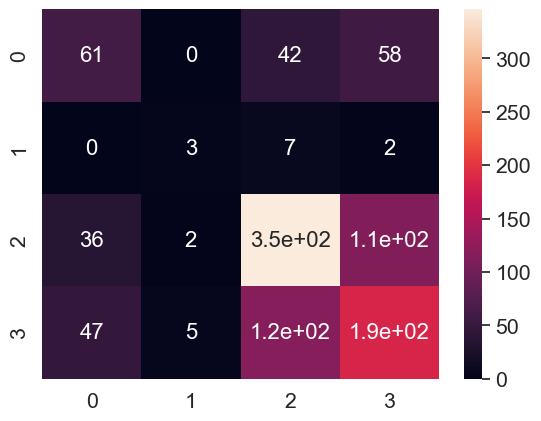

In [16]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [17]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[1279 rows x 2 columns]

In [18]:
df.head()

Filename  \
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                            Category  
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...

In [19]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented         640
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented    448
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented        179
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented     12
Name: Category, dtype: int64

In [20]:
df.shape

(1279, 2)

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented': 3}


In [22]:
y = le.transform(df['Category'])

In [23]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|                                                  | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  0%|                                          | 1/1279 [00:00<03:18,  6.44it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                          | 3/1279 [00:00<02:06, 10.06it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                         | 5/1279 [00:00<01:46, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏                                         | 7/1279 [00:00<01:36, 13.14it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▎                                         | 9/1279 [00:00<02:06, 10.05it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▎                                        | 11/1279 [00:00<01:50, 11.46it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▍                                        | 13/1279 [00:01<01:42, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▍                                        | 15/1279 [00:01<01:35, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 17/1279 [00:01<01:33, 13.54it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 19/1279 [00:01<01:34, 13.28it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▋                                        | 21/1279 [00:01<01:36, 12.97it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▋                                        | 23/1279 [00:01<01:35, 13.12it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▊                                        | 25/1279 [00:01<01:32, 13.49it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▊                                        | 27/1279 [00:02<01:31, 13.69it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                        | 29/1279 [00:02<01:31, 13.69it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▉                                        | 31/1279 [00:02<01:27, 14.24it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                        | 33/1279 [00:02<01:25, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█                                        | 35/1279 [00:02<01:24, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▏                                       | 37/1279 [00:02<01:25, 14.49it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▎                                       | 39/1279 [00:02<01:25, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▎                                       | 41/1279 [00:03<01:24, 14.71it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▍                                       | 43/1279 [00:03<01:25, 14.42it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▍                                       | 45/1279 [00:03<01:25, 14.52it/s]

1/1 [==============================] - 0s 48ms/step


  4%|█▌                                       | 47/1279 [00:03<01:27, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▌                                       | 49/1279 [00:03<01:23, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▋                                       | 51/1279 [00:03<01:21, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▋                                       | 53/1279 [00:03<01:20, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▊                                       | 55/1279 [00:04<01:21, 15.10it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▊                                       | 57/1279 [00:04<01:20, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


  5%|█▉                                       | 59/1279 [00:04<01:18, 15.48it/s]

1/1 [==============================] - 0s 30ms/step


  5%|█▉                                       | 61/1279 [00:04<01:17, 15.81it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██                                       | 63/1279 [00:04<01:17, 15.77it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██                                       | 65/1279 [00:04<01:16, 15.92it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██▏                                      | 67/1279 [00:04<01:18, 15.51it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                      | 69/1279 [00:04<01:19, 15.20it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▎                                      | 71/1279 [00:05<01:19, 15.27it/s]

1/1 [==============================] - 0s 30ms/step


  6%|██▎                                      | 73/1279 [00:05<01:18, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▍                                      | 75/1279 [00:05<01:17, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


  6%|██▍                                      | 77/1279 [00:05<01:16, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▌                                      | 79/1279 [00:05<01:15, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


  6%|██▌                                      | 81/1279 [00:05<01:16, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▋                                      | 83/1279 [00:05<01:15, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▋                                      | 85/1279 [00:05<01:15, 15.72it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▊                                      | 87/1279 [00:06<01:15, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


  7%|██▊                                      | 89/1279 [00:06<01:15, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▉                                      | 91/1279 [00:06<01:14, 15.89it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▉                                      | 93/1279 [00:06<01:14, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


  7%|███                                      | 95/1279 [00:06<01:13, 16.09it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███                                      | 97/1279 [00:06<01:13, 16.09it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███▏                                     | 99/1279 [00:06<01:16, 15.48it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▏                                    | 101/1279 [00:06<01:17, 15.10it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▏                                    | 103/1279 [00:07<01:18, 15.00it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▎                                    | 105/1279 [00:07<01:21, 14.46it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▎                                    | 107/1279 [00:07<01:21, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 109/1279 [00:07<01:18, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▍                                    | 111/1279 [00:07<01:16, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▌                                    | 113/1279 [00:07<01:15, 15.42it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▌                                    | 115/1279 [00:07<01:14, 15.62it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▋                                    | 117/1279 [00:08<01:14, 15.62it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▋                                    | 119/1279 [00:08<01:14, 15.67it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▊                                    | 121/1279 [00:08<01:13, 15.79it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▊                                    | 123/1279 [00:08<01:12, 15.90it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 125/1279 [00:08<01:13, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███▉                                    | 127/1279 [00:08<01:14, 15.52it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 129/1279 [00:08<01:15, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


 10%|████                                    | 131/1279 [00:08<01:13, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████▏                                   | 133/1279 [00:09<01:13, 15.50it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▏                                   | 135/1279 [00:09<01:15, 15.18it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▎                                   | 137/1279 [00:09<01:14, 15.33it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▎                                   | 139/1279 [00:09<01:13, 15.48it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 141/1279 [00:09<01:14, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▍                                   | 143/1279 [00:09<01:14, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▌                                   | 145/1279 [00:09<01:13, 15.48it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▌                                   | 147/1279 [00:09<01:13, 15.45it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▋                                   | 149/1279 [00:10<01:11, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▋                                   | 151/1279 [00:10<01:10, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▊                                   | 153/1279 [00:10<01:12, 15.62it/s]

1/1 [==============================] - 0s 30ms/step


 12%|████▊                                   | 155/1279 [00:10<01:12, 15.56it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▉                                   | 157/1279 [00:10<01:12, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▉                                   | 159/1279 [00:10<01:10, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████                                   | 161/1279 [00:10<01:11, 15.61it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████                                   | 163/1279 [00:10<01:10, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▏                                  | 165/1279 [00:11<01:10, 15.81it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▏                                  | 167/1279 [00:11<01:10, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 169/1279 [00:11<01:09, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 171/1279 [00:11<01:10, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 173/1279 [00:11<01:09, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▍                                  | 175/1279 [00:11<01:10, 15.72it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 177/1279 [00:11<01:09, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▌                                  | 179/1279 [00:11<01:09, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 181/1279 [00:12<01:10, 15.68it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▋                                  | 183/1279 [00:12<01:10, 15.55it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▊                                  | 185/1279 [00:12<01:13, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█████▊                                  | 187/1279 [00:12<01:12, 15.06it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█████▉                                  | 189/1279 [00:12<01:11, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▉                                  | 191/1279 [00:12<01:10, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 193/1279 [00:12<01:10, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 195/1279 [00:13<01:10, 15.38it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████▏                                 | 197/1279 [00:13<01:11, 15.15it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▏                                 | 199/1279 [00:13<01:11, 15.02it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▎                                 | 201/1279 [00:13<01:13, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▎                                 | 203/1279 [00:13<01:12, 14.91it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▍                                 | 205/1279 [00:13<01:10, 15.24it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▍                                 | 207/1279 [00:13<01:10, 15.18it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▌                                 | 209/1279 [00:13<01:10, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▌                                 | 211/1279 [00:14<01:08, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▋                                 | 213/1279 [00:14<01:08, 15.56it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▋                                 | 215/1279 [00:14<01:08, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 17%|██████▊                                 | 217/1279 [00:14<01:08, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▊                                 | 219/1279 [00:14<01:07, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▉                                 | 221/1279 [00:14<01:06, 15.91it/s]

1/1 [==============================] - 0s 29ms/step


 17%|██████▉                                 | 223/1279 [00:14<01:06, 15.91it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████                                 | 225/1279 [00:14<01:06, 15.74it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████                                 | 227/1279 [00:15<01:06, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▏                                | 229/1279 [00:15<01:06, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▏                                | 231/1279 [00:15<01:05, 15.94it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 233/1279 [00:15<01:06, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 235/1279 [00:15<01:06, 15.72it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 237/1279 [00:15<01:06, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▍                                | 239/1279 [00:15<01:05, 15.78it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▌                                | 241/1279 [00:16<01:07, 15.48it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 243/1279 [00:16<01:06, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▋                                | 245/1279 [00:16<01:05, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▋                                | 247/1279 [00:16<01:06, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▊                                | 249/1279 [00:16<01:06, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▊                                | 251/1279 [00:16<01:06, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                                | 253/1279 [00:16<01:07, 15.22it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▉                                | 255/1279 [00:16<01:06, 15.44it/s]

1/1 [==============================] - 0s 29ms/step


 20%|████████                                | 257/1279 [00:17<01:05, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 20%|████████                                | 259/1279 [00:17<01:04, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


 20%|████████▏                               | 261/1279 [00:17<01:06, 15.20it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████▏                               | 263/1279 [00:17<01:06, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▎                               | 265/1279 [00:17<01:07, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                               | 267/1279 [00:17<01:06, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▍                               | 269/1279 [00:17<01:06, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▍                               | 271/1279 [00:17<01:05, 15.31it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████▌                               | 273/1279 [00:18<01:04, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▌                               | 275/1279 [00:18<01:04, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▋                               | 277/1279 [00:18<01:03, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▋                               | 279/1279 [00:18<01:04, 15.58it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▊                               | 281/1279 [00:18<01:03, 15.74it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▊                               | 283/1279 [00:18<01:03, 15.79it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▉                               | 285/1279 [00:18<01:03, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▉                               | 287/1279 [00:18<01:03, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████                               | 289/1279 [00:19<01:02, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████                               | 291/1279 [00:19<01:03, 15.48it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████▏                              | 293/1279 [00:19<01:03, 15.51it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▏                              | 295/1279 [00:19<01:03, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████▎                              | 297/1279 [00:19<01:03, 15.54it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████▎                              | 299/1279 [00:19<01:06, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                              | 301/1279 [00:19<01:09, 14.17it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                              | 303/1279 [00:20<01:06, 14.69it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▌                              | 305/1279 [00:20<01:05, 14.97it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▌                              | 307/1279 [00:20<01:03, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▋                              | 309/1279 [00:20<01:04, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▋                              | 311/1279 [00:20<01:03, 15.28it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▊                              | 313/1279 [00:20<01:03, 15.15it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                              | 315/1279 [00:20<01:04, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▉                              | 317/1279 [00:20<01:02, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▉                              | 319/1279 [00:21<01:01, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██████████                              | 321/1279 [00:21<01:01, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██████████                              | 323/1279 [00:21<01:01, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██████████▏                             | 325/1279 [00:21<01:00, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▏                             | 327/1279 [00:21<01:00, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██████████▎                             | 329/1279 [00:21<01:00, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▎                             | 331/1279 [00:21<01:00, 15.77it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▍                             | 333/1279 [00:21<01:00, 15.57it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▍                             | 335/1279 [00:22<01:00, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▌                             | 337/1279 [00:22<01:00, 15.66it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                             | 339/1279 [00:22<00:59, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▋                             | 341/1279 [00:22<01:00, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▋                             | 343/1279 [00:22<00:59, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▊                             | 345/1279 [00:22<00:59, 15.82it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▊                             | 347/1279 [00:22<00:58, 15.94it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▉                             | 349/1279 [00:22<00:58, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▉                             | 351/1279 [00:23<00:58, 15.75it/s]

1/1 [==============================] - 0s 31ms/step


 28%|███████████                             | 353/1279 [00:23<00:59, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 28%|███████████                             | 355/1279 [00:23<00:59, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 28%|███████████▏                            | 357/1279 [00:23<00:58, 15.66it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████▏                            | 359/1279 [00:23<01:00, 15.22it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████▎                            | 361/1279 [00:23<01:01, 15.01it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████▎                            | 363/1279 [00:23<01:01, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▍                            | 365/1279 [00:24<01:01, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▍                            | 367/1279 [00:24<01:01, 14.91it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▌                            | 369/1279 [00:24<01:01, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▌                            | 371/1279 [00:24<00:59, 15.27it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▋                            | 373/1279 [00:24<01:00, 14.88it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████▋                            | 375/1279 [00:24<00:59, 15.17it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████▊                            | 377/1279 [00:24<00:59, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▊                            | 379/1279 [00:24<00:58, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▉                            | 381/1279 [00:25<00:58, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▉                            | 383/1279 [00:25<00:58, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 30%|████████████                            | 385/1279 [00:25<00:57, 15.59it/s]

1/1 [==============================] - 0s 30ms/step


 30%|████████████                            | 387/1279 [00:25<00:57, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 30%|████████████▏                           | 389/1279 [00:25<00:58, 15.28it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████▏                           | 391/1279 [00:25<00:58, 15.10it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████▎                           | 393/1279 [00:25<00:57, 15.44it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████▎                           | 395/1279 [00:26<00:57, 15.44it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████▍                           | 397/1279 [00:26<00:57, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████▍                           | 399/1279 [00:26<00:56, 15.51it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████▌                           | 401/1279 [00:26<00:56, 15.56it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▌                           | 403/1279 [00:26<00:56, 15.50it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▋                           | 405/1279 [00:26<00:59, 14.81it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▋                           | 407/1279 [00:26<00:57, 15.04it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▊                           | 409/1279 [00:26<00:58, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▊                           | 411/1279 [00:27<00:57, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▉                           | 413/1279 [00:27<00:58, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▉                           | 415/1279 [00:27<00:57, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████                           | 417/1279 [00:27<00:56, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████                           | 419/1279 [00:27<00:55, 15.60it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████▏                          | 421/1279 [00:27<00:54, 15.71it/s]

1/1 [==============================] - 0s 79ms/step


 33%|█████████████▏                          | 423/1279 [00:27<01:01, 13.99it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████▎                          | 425/1279 [00:28<01:02, 13.73it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████▎                          | 427/1279 [00:28<00:59, 14.34it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▍                          | 429/1279 [00:28<00:57, 14.80it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▍                          | 431/1279 [00:28<00:57, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▌                          | 433/1279 [00:28<00:57, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▌                          | 435/1279 [00:28<00:56, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▋                          | 437/1279 [00:28<00:55, 15.22it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▋                          | 439/1279 [00:28<00:55, 15.25it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▊                          | 441/1279 [00:29<00:55, 15.02it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▊                          | 443/1279 [00:29<00:54, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▉                          | 445/1279 [00:29<00:54, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▉                          | 447/1279 [00:29<00:53, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████                          | 449/1279 [00:29<00:53, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████                          | 451/1279 [00:29<00:52, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████▏                         | 453/1279 [00:29<00:52, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                         | 455/1279 [00:29<00:51, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▎                         | 457/1279 [00:30<00:51, 15.88it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▎                         | 459/1279 [00:30<00:53, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 36%|██████████████▍                         | 461/1279 [00:30<00:52, 15.55it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▍                         | 463/1279 [00:30<00:52, 15.51it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▌                         | 465/1279 [00:30<00:52, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▌                         | 467/1279 [00:30<00:53, 15.29it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▋                         | 469/1279 [00:30<00:54, 14.82it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▋                         | 471/1279 [00:31<00:54, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▊                         | 473/1279 [00:31<00:54, 14.75it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▊                         | 475/1279 [00:31<00:54, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▉                         | 477/1279 [00:31<00:56, 14.17it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▉                         | 479/1279 [00:31<00:54, 14.64it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███████████████                         | 481/1279 [00:31<00:53, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████                         | 483/1279 [00:31<00:52, 15.05it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███████████████▏                        | 485/1279 [00:31<00:52, 15.22it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████▏                        | 487/1279 [00:32<00:51, 15.31it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████▎                        | 489/1279 [00:32<00:51, 15.38it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████▎                        | 491/1279 [00:32<00:50, 15.52it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▍                        | 493/1279 [00:32<00:50, 15.70it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▍                        | 495/1279 [00:32<00:50, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▌                        | 497/1279 [00:32<00:49, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████▌                        | 499/1279 [00:32<00:48, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▋                        | 501/1279 [00:32<00:48, 15.91it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▋                        | 503/1279 [00:33<00:49, 15.63it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████▊                        | 505/1279 [00:33<00:49, 15.70it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▊                        | 507/1279 [00:33<00:48, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████▉                        | 509/1279 [00:33<00:48, 15.91it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▉                        | 511/1279 [00:33<00:48, 15.85it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████████████████                        | 513/1279 [00:33<00:49, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████████████████                        | 515/1279 [00:33<00:48, 15.71it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████████████████▏                       | 517/1279 [00:33<00:49, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▏                       | 519/1279 [00:34<00:49, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████████████████▎                       | 521/1279 [00:34<00:49, 15.31it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▎                       | 523/1279 [00:34<00:49, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████████████████▍                       | 525/1279 [00:34<00:48, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▍                       | 527/1279 [00:34<00:47, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▌                       | 529/1279 [00:34<00:48, 15.36it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▌                       | 531/1279 [00:34<00:49, 15.08it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▋                       | 533/1279 [00:35<00:48, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▋                       | 535/1279 [00:35<00:49, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▊                       | 537/1279 [00:35<00:48, 15.22it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▊                       | 539/1279 [00:35<00:48, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▉                       | 541/1279 [00:35<00:48, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▉                       | 543/1279 [00:35<00:47, 15.55it/s]

1/1 [==============================] - 0s 54ms/step


 43%|█████████████████                       | 545/1279 [00:35<00:55, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 43%|█████████████████                       | 547/1279 [00:36<00:52, 13.87it/s]

1/1 [==============================] - 0s 29ms/step


 43%|█████████████████▏                      | 549/1279 [00:36<00:51, 14.30it/s]

1/1 [==============================] - 0s 34ms/step


 43%|█████████████████▏                      | 551/1279 [00:36<00:49, 14.61it/s]

1/1 [==============================] - 0s 29ms/step


 43%|█████████████████▎                      | 553/1279 [00:36<00:48, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


 43%|█████████████████▎                      | 555/1279 [00:36<00:48, 14.90it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████▍                      | 557/1279 [00:36<00:48, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████▍                      | 559/1279 [00:36<00:47, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▌                      | 561/1279 [00:36<00:47, 15.04it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████▌                      | 563/1279 [00:37<00:47, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████▋                      | 565/1279 [00:37<00:46, 15.48it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▋                      | 567/1279 [00:37<00:47, 15.12it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▊                      | 569/1279 [00:37<00:46, 15.26it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▊                      | 571/1279 [00:37<00:46, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▉                      | 573/1279 [00:37<00:45, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▉                      | 575/1279 [00:37<00:45, 15.42it/s]

1/1 [==============================] - 0s 29ms/step


 45%|██████████████████                      | 577/1279 [00:37<00:46, 15.19it/s]

1/1 [==============================] - 0s 44ms/step


 45%|██████████████████                      | 579/1279 [00:38<00:53, 13.07it/s]

1/1 [==============================] - 0s 34ms/step


 45%|██████████████████▏                     | 581/1279 [00:38<00:52, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████▏                     | 583/1279 [00:38<00:51, 13.57it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████▎                     | 585/1279 [00:38<00:48, 14.19it/s]

1/1 [==============================] - 0s 29ms/step


 46%|██████████████████▎                     | 587/1279 [00:38<00:48, 14.31it/s]

1/1 [==============================] - 0s 29ms/step


 46%|██████████████████▍                     | 589/1279 [00:38<00:47, 14.53it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████▍                     | 591/1279 [00:39<00:46, 14.71it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████▌                     | 593/1279 [00:39<00:46, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▌                     | 595/1279 [00:39<00:45, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▋                     | 597/1279 [00:39<00:44, 15.24it/s]

1/1 [==============================] - 0s 29ms/step


 47%|██████████████████▋                     | 599/1279 [00:39<00:43, 15.47it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▊                     | 601/1279 [00:39<00:43, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▊                     | 603/1279 [00:39<00:43, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 47%|██████████████████▉                     | 605/1279 [00:39<00:43, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 47%|██████████████████▉                     | 607/1279 [00:40<00:43, 15.49it/s]

1/1 [==============================] - 0s 30ms/step


 48%|███████████████████                     | 609/1279 [00:40<00:43, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 48%|███████████████████                     | 611/1279 [00:40<00:43, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 48%|███████████████████▏                    | 613/1279 [00:40<00:43, 15.34it/s]

1/1 [==============================] - 0s 30ms/step


 48%|███████████████████▏                    | 615/1279 [00:40<00:42, 15.46it/s]

1/1 [==============================] - 0s 29ms/step


 48%|███████████████████▎                    | 617/1279 [00:40<00:42, 15.55it/s]

1/1 [==============================] - 0s 32ms/step


 48%|███████████████████▎                    | 619/1279 [00:40<00:42, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████▍                    | 621/1279 [00:40<00:43, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 49%|███████████████████▍                    | 623/1279 [00:41<00:43, 15.18it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████▌                    | 625/1279 [00:41<00:42, 15.36it/s]

1/1 [==============================] - 0s 39ms/step


 49%|███████████████████▌                    | 627/1279 [00:41<00:43, 14.96it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▋                    | 629/1279 [00:41<00:44, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▋                    | 631/1279 [00:41<00:44, 14.68it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████▊                    | 633/1279 [00:41<00:43, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


 50%|███████████████████▊                    | 635/1279 [00:41<00:44, 14.57it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▉                    | 637/1279 [00:42<00:44, 14.48it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▉                    | 639/1279 [00:42<00:43, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████████████████████                    | 641/1279 [00:42<00:43, 14.75it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████████████████████                    | 643/1279 [00:42<00:42, 14.90it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████████████████████▏                   | 645/1279 [00:42<00:41, 15.18it/s]

1/1 [==============================] - 0s 31ms/step


 51%|████████████████████▏                   | 647/1279 [00:42<00:42, 14.92it/s]

1/1 [==============================] - 0s 31ms/step


 51%|████████████████████▎                   | 649/1279 [00:42<00:41, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 51%|████████████████████▎                   | 651/1279 [00:42<00:40, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


 51%|████████████████████▍                   | 653/1279 [00:43<00:40, 15.44it/s]

1/1 [==============================] - 0s 33ms/step


 51%|████████████████████▍                   | 655/1279 [00:43<00:40, 15.44it/s]

1/1 [==============================] - 0s 29ms/step


 51%|████████████████████▌                   | 657/1279 [00:43<00:40, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▌                   | 659/1279 [00:43<00:40, 15.45it/s]

1/1 [==============================] - 0s 51ms/step


 52%|████████████████████▋                   | 661/1279 [00:43<00:45, 13.64it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▋                   | 663/1279 [00:43<00:45, 13.45it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▊                   | 665/1279 [00:43<00:44, 13.90it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▊                   | 667/1279 [00:44<00:43, 13.91it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▉                   | 669/1279 [00:44<00:42, 14.47it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▉                   | 671/1279 [00:44<00:41, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████████████████████                   | 673/1279 [00:44<00:41, 14.77it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████                   | 675/1279 [00:44<00:40, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████▏                  | 677/1279 [00:44<00:39, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████▏                  | 679/1279 [00:44<00:39, 15.18it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████████████████████▎                  | 681/1279 [00:44<00:38, 15.36it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████████████████████▎                  | 683/1279 [00:45<00:39, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████▍                  | 685/1279 [00:45<00:39, 14.92it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████▍                  | 687/1279 [00:45<00:38, 15.31it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████▌                  | 689/1279 [00:45<00:38, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████▌                  | 691/1279 [00:45<00:37, 15.52it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▋                  | 693/1279 [00:45<00:38, 15.41it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████▋                  | 695/1279 [00:45<00:37, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████████████████████▊                  | 697/1279 [00:46<00:38, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▊                  | 699/1279 [00:46<00:38, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▉                  | 701/1279 [00:46<00:38, 15.17it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▉                  | 703/1279 [00:46<00:37, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 55%|██████████████████████                  | 705/1279 [00:46<00:38, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 55%|██████████████████████                  | 707/1279 [00:46<00:38, 14.90it/s]

1/1 [==============================] - 0s 30ms/step


 55%|██████████████████████▏                 | 709/1279 [00:46<00:37, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 56%|██████████████████████▏                 | 711/1279 [00:46<00:38, 14.78it/s]

1/1 [==============================] - 0s 30ms/step


 56%|██████████████████████▎                 | 713/1279 [00:47<00:37, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 56%|██████████████████████▎                 | 715/1279 [00:47<00:36, 15.36it/s]

1/1 [==============================] - 0s 30ms/step


 56%|██████████████████████▍                 | 717/1279 [00:47<00:36, 15.46it/s]

1/1 [==============================] - 0s 29ms/step


 56%|██████████████████████▍                 | 719/1279 [00:47<00:36, 15.24it/s]

1/1 [==============================] - 0s 33ms/step


 56%|██████████████████████▌                 | 721/1279 [00:47<00:36, 15.33it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▌                 | 723/1279 [00:47<00:35, 15.50it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▋                 | 725/1279 [00:47<00:35, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▋                 | 727/1279 [00:48<00:35, 15.67it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▊                 | 729/1279 [00:48<00:35, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▊                 | 731/1279 [00:48<00:35, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████▉                 | 733/1279 [00:48<00:35, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


 57%|██████████████████████▉                 | 735/1279 [00:48<00:35, 15.34it/s]

1/1 [==============================] - 0s 31ms/step


 58%|███████████████████████                 | 737/1279 [00:48<00:35, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 58%|███████████████████████                 | 739/1279 [00:48<00:35, 15.04it/s]

1/1 [==============================] - 0s 31ms/step


 58%|███████████████████████▏                | 741/1279 [00:48<00:35, 15.08it/s]

1/1 [==============================] - 0s 29ms/step


 58%|███████████████████████▏                | 743/1279 [00:49<00:35, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 58%|███████████████████████▎                | 745/1279 [00:49<00:35, 15.10it/s]

1/1 [==============================] - 0s 34ms/step


 58%|███████████████████████▎                | 747/1279 [00:49<00:35, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 59%|███████████████████████▍                | 749/1279 [00:49<00:34, 15.30it/s]

1/1 [==============================] - 0s 31ms/step


 59%|███████████████████████▍                | 751/1279 [00:49<00:34, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 59%|███████████████████████▌                | 753/1279 [00:49<00:34, 15.23it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▌                | 755/1279 [00:49<00:34, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 59%|███████████████████████▋                | 757/1279 [00:49<00:33, 15.50it/s]

1/1 [==============================] - 0s 29ms/step


 59%|███████████████████████▋                | 759/1279 [00:50<00:34, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 59%|███████████████████████▊                | 761/1279 [00:50<00:34, 15.06it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▊                | 763/1279 [00:50<00:33, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 60%|███████████████████████▉                | 765/1279 [00:50<00:33, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 60%|███████████████████████▉                | 767/1279 [00:50<00:33, 15.22it/s]

1/1 [==============================] - 0s 31ms/step


 60%|████████████████████████                | 769/1279 [00:50<00:33, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 60%|████████████████████████                | 771/1279 [00:50<00:39, 12.89it/s]

1/1 [==============================] - 0s 30ms/step


 60%|████████████████████████▏               | 773/1279 [00:51<00:37, 13.44it/s]

1/1 [==============================] - 0s 30ms/step


 61%|████████████████████████▏               | 775/1279 [00:51<00:35, 14.16it/s]

1/1 [==============================] - 0s 28ms/step


 61%|████████████████████████▎               | 777/1279 [00:51<00:34, 14.72it/s]

1/1 [==============================] - 0s 32ms/step


 61%|████████████████████████▎               | 779/1279 [00:51<00:33, 14.91it/s]

1/1 [==============================] - 0s 35ms/step


 61%|████████████████████████▍               | 781/1279 [00:51<00:33, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 61%|████████████████████████▍               | 783/1279 [00:51<00:32, 15.09it/s]

1/1 [==============================] - 0s 34ms/step


 61%|████████████████████████▌               | 785/1279 [00:51<00:33, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 62%|████████████████████████▌               | 787/1279 [00:52<00:32, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 62%|████████████████████████▋               | 789/1279 [00:52<00:31, 15.41it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▋               | 791/1279 [00:52<00:31, 15.29it/s]

1/1 [==============================] - 0s 31ms/step


 62%|████████████████████████▊               | 793/1279 [00:52<00:31, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 62%|████████████████████████▊               | 795/1279 [00:52<00:31, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 62%|████████████████████████▉               | 797/1279 [00:52<00:31, 15.51it/s]

1/1 [==============================] - 0s 31ms/step


 62%|████████████████████████▉               | 799/1279 [00:52<00:30, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 63%|█████████████████████████               | 801/1279 [00:53<00:43, 10.91it/s]

1/1 [==============================] - 0s 30ms/step


 63%|█████████████████████████               | 803/1279 [00:53<00:39, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 63%|█████████████████████████▏              | 805/1279 [00:53<00:36, 12.99it/s]

1/1 [==============================] - 0s 31ms/step


 63%|█████████████████████████▏              | 807/1279 [00:53<00:34, 13.65it/s]

1/1 [==============================] - 0s 35ms/step


 63%|█████████████████████████▎              | 809/1279 [00:53<00:33, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


 63%|█████████████████████████▎              | 811/1279 [00:53<00:33, 14.09it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████▍              | 813/1279 [00:53<00:32, 14.31it/s]

1/1 [==============================] - 0s 30ms/step


 64%|█████████████████████████▍              | 815/1279 [00:54<00:31, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▌              | 817/1279 [00:54<00:30, 15.10it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▌              | 819/1279 [00:54<00:30, 15.05it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████▋              | 821/1279 [00:54<00:30, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


 64%|█████████████████████████▋              | 823/1279 [00:54<00:30, 14.74it/s]

1/1 [==============================] - 0s 29ms/step


 65%|█████████████████████████▊              | 825/1279 [00:54<00:30, 14.96it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▊              | 827/1279 [00:54<00:30, 14.79it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▉              | 829/1279 [00:54<00:30, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▉              | 831/1279 [00:55<00:29, 15.26it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████████████████████████              | 833/1279 [00:55<00:29, 15.34it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████████████████████████              | 835/1279 [00:55<00:28, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████████████████████████▏             | 837/1279 [00:55<00:28, 15.50it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████████████████████████▏             | 839/1279 [00:55<00:28, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████████████████████████▎             | 841/1279 [00:55<00:28, 15.44it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████████████████████████▎             | 843/1279 [00:55<00:28, 15.34it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████████████████████████▍             | 845/1279 [00:55<00:28, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████████████████████████▍             | 847/1279 [00:56<00:28, 15.38it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████████████████████████▌             | 849/1279 [00:56<00:27, 15.49it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████▌             | 851/1279 [00:56<00:27, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████▋             | 853/1279 [00:56<00:27, 15.75it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████▋             | 855/1279 [00:56<00:27, 15.44it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▊             | 857/1279 [00:56<00:27, 15.21it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▊             | 859/1279 [00:56<00:27, 15.34it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▉             | 861/1279 [00:57<00:27, 14.97it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████████████████████████▉             | 863/1279 [00:57<00:27, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████             | 865/1279 [00:57<00:28, 14.62it/s]

1/1 [==============================] - 0s 31ms/step


 68%|███████████████████████████             | 867/1279 [00:57<00:28, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 68%|███████████████████████████▏            | 869/1279 [00:57<00:28, 14.59it/s]

1/1 [==============================] - 0s 35ms/step


 68%|███████████████████████████▏            | 871/1279 [00:57<00:27, 14.64it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████▎            | 873/1279 [00:57<00:27, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████▎            | 875/1279 [00:57<00:27, 14.92it/s]

1/1 [==============================] - 0s 31ms/step


 69%|███████████████████████████▍            | 877/1279 [00:58<00:27, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 69%|███████████████████████████▍            | 879/1279 [00:58<00:26, 14.98it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████▌            | 881/1279 [00:58<00:26, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████▌            | 883/1279 [00:58<00:26, 14.76it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████▋            | 885/1279 [00:58<00:26, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


 69%|███████████████████████████▋            | 887/1279 [00:58<00:26, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▊            | 889/1279 [00:58<00:26, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▊            | 891/1279 [00:59<00:26, 14.59it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▉            | 893/1279 [00:59<00:26, 14.40it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▉            | 895/1279 [00:59<00:26, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 70%|████████████████████████████            | 897/1279 [00:59<00:25, 14.84it/s]

1/1 [==============================] - 0s 33ms/step


 70%|████████████████████████████            | 899/1279 [00:59<00:25, 14.96it/s]

1/1 [==============================] - 0s 32ms/step


 70%|████████████████████████████▏           | 901/1279 [00:59<00:29, 12.61it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▏           | 903/1279 [00:59<00:28, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 71%|████████████████████████████▎           | 905/1279 [01:00<00:28, 13.32it/s]

1/1 [==============================] - 0s 31ms/step


 71%|████████████████████████████▎           | 907/1279 [01:00<00:26, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 71%|████████████████████████████▍           | 909/1279 [01:00<00:26, 14.12it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▍           | 911/1279 [01:00<00:25, 14.42it/s]

1/1 [==============================] - 0s 32ms/step


 71%|████████████████████████████▌           | 913/1279 [01:00<00:24, 14.79it/s]

1/1 [==============================] - 0s 34ms/step


 72%|████████████████████████████▌           | 915/1279 [01:00<00:25, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


 72%|████████████████████████████▋           | 917/1279 [01:00<00:24, 14.57it/s]

1/1 [==============================] - 0s 30ms/step


 72%|████████████████████████████▋           | 919/1279 [01:01<00:24, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████▊           | 921/1279 [01:01<00:23, 15.23it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████▊           | 923/1279 [01:01<00:22, 15.51it/s]

1/1 [==============================] - 0s 29ms/step


 72%|████████████████████████████▉           | 925/1279 [01:01<00:23, 15.35it/s]

1/1 [==============================] - 0s 30ms/step


 72%|████████████████████████████▉           | 927/1279 [01:01<00:22, 15.44it/s]

1/1 [==============================] - 0s 39ms/step


 73%|█████████████████████████████           | 929/1279 [01:01<00:23, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


 73%|█████████████████████████████           | 931/1279 [01:01<00:24, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 73%|█████████████████████████████▏          | 933/1279 [01:02<00:24, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


 73%|█████████████████████████████▏          | 935/1279 [01:02<00:24, 14.25it/s]

1/1 [==============================] - 0s 31ms/step


 73%|█████████████████████████████▎          | 937/1279 [01:02<00:24, 14.13it/s]

1/1 [==============================] - 0s 35ms/step


 73%|█████████████████████████████▎          | 939/1279 [01:02<00:23, 14.41it/s]

1/1 [==============================] - 0s 29ms/step


 74%|█████████████████████████████▍          | 941/1279 [01:02<00:23, 14.50it/s]

1/1 [==============================] - 0s 30ms/step


 74%|█████████████████████████████▍          | 943/1279 [01:02<00:23, 14.46it/s]

1/1 [==============================] - 0s 30ms/step


 74%|█████████████████████████████▌          | 945/1279 [01:02<00:23, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


 74%|█████████████████████████████▌          | 947/1279 [01:02<00:22, 14.68it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████▋          | 949/1279 [01:03<00:22, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


 74%|█████████████████████████████▋          | 951/1279 [01:03<00:21, 15.02it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████▊          | 953/1279 [01:03<00:22, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████▊          | 955/1279 [01:03<00:22, 14.49it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▉          | 957/1279 [01:03<00:21, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


 75%|█████████████████████████████▉          | 959/1279 [01:03<00:21, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 75%|██████████████████████████████          | 961/1279 [01:03<00:21, 14.93it/s]

1/1 [==============================] - 0s 31ms/step


 75%|██████████████████████████████          | 963/1279 [01:04<00:21, 14.94it/s]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████▏         | 965/1279 [01:04<00:21, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


 76%|██████████████████████████████▏         | 967/1279 [01:04<00:21, 14.53it/s]

1/1 [==============================] - 0s 30ms/step


 76%|██████████████████████████████▎         | 969/1279 [01:04<00:21, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


 76%|██████████████████████████████▎         | 971/1279 [01:04<00:20, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


 76%|██████████████████████████████▍         | 973/1279 [01:04<00:20, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 76%|██████████████████████████████▍         | 975/1279 [01:04<00:19, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 76%|██████████████████████████████▌         | 977/1279 [01:04<00:20, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████▌         | 979/1279 [01:05<00:19, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████▋         | 981/1279 [01:05<00:20, 14.88it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▋         | 983/1279 [01:05<00:19, 14.94it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████▊         | 985/1279 [01:05<00:19, 14.92it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████▊         | 987/1279 [01:05<00:19, 14.68it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▉         | 989/1279 [01:05<00:19, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████▉         | 991/1279 [01:05<00:19, 14.57it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████         | 993/1279 [01:06<00:19, 14.56it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████████████████████████████         | 995/1279 [01:06<00:19, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████▏        | 997/1279 [01:06<00:19, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████████████████████████████▏        | 999/1279 [01:06<00:18, 14.91it/s]

1/1 [==============================] - 0s 106ms/step


 78%|██████████████████████████████▌        | 1001/1279 [01:06<00:21, 12.80it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▌        | 1003/1279 [01:06<00:20, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


 79%|██████████████████████████████▋        | 1005/1279 [01:06<00:19, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 79%|██████████████████████████████▋        | 1007/1279 [01:07<00:18, 14.37it/s]

1/1 [==============================] - 0s 29ms/step


 79%|██████████████████████████████▊        | 1009/1279 [01:07<00:18, 14.26it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▊        | 1011/1279 [01:07<00:18, 14.26it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▉        | 1013/1279 [01:07<00:18, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


 79%|██████████████████████████████▉        | 1015/1279 [01:07<00:18, 14.31it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████████████████████████████        | 1017/1279 [01:07<00:17, 14.59it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████        | 1019/1279 [01:07<00:17, 14.68it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▏       | 1021/1279 [01:08<00:17, 14.53it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████████████████████████████▏       | 1023/1279 [01:08<00:17, 14.89it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▎       | 1025/1279 [01:08<00:17, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▎       | 1027/1279 [01:08<00:17, 14.61it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▍       | 1029/1279 [01:08<00:16, 14.80it/s]

1/1 [==============================] - 0s 30ms/step


 81%|███████████████████████████████▍       | 1031/1279 [01:08<00:16, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


 81%|███████████████████████████████▍       | 1033/1279 [01:08<00:16, 14.77it/s]

1/1 [==============================] - 0s 29ms/step


 81%|███████████████████████████████▌       | 1035/1279 [01:08<00:16, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


 81%|███████████████████████████████▌       | 1037/1279 [01:09<00:16, 14.87it/s]

1/1 [==============================] - 0s 30ms/step


 81%|███████████████████████████████▋       | 1039/1279 [01:09<00:16, 14.84it/s]

1/1 [==============================] - 0s 31ms/step


 81%|███████████████████████████████▋       | 1041/1279 [01:09<00:15, 14.89it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▊       | 1043/1279 [01:09<00:15, 14.75it/s]

1/1 [==============================] - 0s 36ms/step


 82%|███████████████████████████████▊       | 1045/1279 [01:09<00:15, 14.88it/s]

1/1 [==============================] - 0s 30ms/step


 82%|███████████████████████████████▉       | 1047/1279 [01:09<00:15, 14.92it/s]

1/1 [==============================] - 0s 29ms/step


 82%|███████████████████████████████▉       | 1049/1279 [01:09<00:15, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████████████████████████████       | 1051/1279 [01:10<00:14, 15.39it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 1053/1279 [01:10<00:14, 15.34it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████████████████████████████▏      | 1055/1279 [01:10<00:14, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████████████████████████████▏      | 1057/1279 [01:10<00:14, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████████████████████████████▎      | 1059/1279 [01:10<00:14, 15.44it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▎      | 1061/1279 [01:10<00:14, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████████████████████████████▍      | 1063/1279 [01:10<00:14, 14.92it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████████████████████████████▍      | 1065/1279 [01:10<00:14, 15.13it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▌      | 1067/1279 [01:11<00:14, 14.75it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▌      | 1069/1279 [01:11<00:14, 14.93it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▋      | 1071/1279 [01:11<00:13, 15.14it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▋      | 1073/1279 [01:11<00:13, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████████████████████████████▊      | 1075/1279 [01:11<00:13, 15.08it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████████████████████████████▊      | 1077/1279 [01:11<00:13, 15.45it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▉      | 1079/1279 [01:11<00:13, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████████████████████████████▉      | 1081/1279 [01:12<00:13, 15.21it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████      | 1083/1279 [01:12<00:13, 15.06it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████      | 1085/1279 [01:12<00:13, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 85%|█████████████████████████████████▏     | 1087/1279 [01:12<00:12, 15.05it/s]

1/1 [==============================] - 0s 29ms/step


 85%|█████████████████████████████████▏     | 1089/1279 [01:12<00:12, 15.09it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▎     | 1091/1279 [01:12<00:12, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▎     | 1093/1279 [01:12<00:12, 14.94it/s]

1/1 [==============================] - 0s 30ms/step


 86%|█████████████████████████████████▍     | 1095/1279 [01:12<00:12, 15.17it/s]

1/1 [==============================] - 0s 30ms/step


 86%|█████████████████████████████████▍     | 1097/1279 [01:13<00:12, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 86%|█████████████████████████████████▌     | 1099/1279 [01:13<00:12, 14.94it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 1101/1279 [01:13<00:11, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 86%|█████████████████████████████████▋     | 1103/1279 [01:13<00:11, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▋     | 1105/1279 [01:13<00:11, 14.69it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▊     | 1107/1279 [01:13<00:14, 12.17it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████▊     | 1109/1279 [01:13<00:13, 12.85it/s]

1/1 [==============================] - 0s 30ms/step


 87%|█████████████████████████████████▉     | 1111/1279 [01:14<00:12, 13.37it/s]

1/1 [==============================] - 0s 30ms/step


 87%|█████████████████████████████████▉     | 1113/1279 [01:14<00:11, 13.89it/s]

1/1 [==============================] - 0s 30ms/step


 87%|█████████████████████████████████▉     | 1115/1279 [01:14<00:11, 14.41it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████     | 1117/1279 [01:14<00:11, 14.40it/s]

1/1 [==============================] - 0s 30ms/step


 87%|██████████████████████████████████     | 1119/1279 [01:14<00:10, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▏    | 1121/1279 [01:14<00:10, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▏    | 1123/1279 [01:14<00:10, 15.14it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▎    | 1125/1279 [01:15<00:10, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▎    | 1127/1279 [01:15<00:10, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▍    | 1129/1279 [01:15<00:09, 15.23it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▍    | 1131/1279 [01:15<00:09, 15.42it/s]

1/1 [==============================] - 0s 31ms/step


 89%|██████████████████████████████████▌    | 1133/1279 [01:15<00:09, 15.35it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▌    | 1135/1279 [01:15<00:09, 15.07it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▋    | 1137/1279 [01:15<00:09, 15.00it/s]

1/1 [==============================] - 0s 38ms/step


 89%|██████████████████████████████████▋    | 1139/1279 [01:15<00:09, 14.48it/s]

1/1 [==============================] - 0s 31ms/step


 89%|██████████████████████████████████▊    | 1141/1279 [01:16<00:09, 14.50it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▊    | 1143/1279 [01:16<00:09, 14.75it/s]

1/1 [==============================] - 0s 31ms/step


 90%|██████████████████████████████████▉    | 1145/1279 [01:16<00:09, 14.78it/s]

1/1 [==============================] - 0s 35ms/step


 90%|██████████████████████████████████▉    | 1147/1279 [01:16<00:08, 14.71it/s]

1/1 [==============================] - 0s 31ms/step


 90%|███████████████████████████████████    | 1149/1279 [01:16<00:08, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 90%|███████████████████████████████████    | 1151/1279 [01:16<00:08, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 90%|███████████████████████████████████▏   | 1153/1279 [01:16<00:08, 14.47it/s]

1/1 [==============================] - 0s 30ms/step


 90%|███████████████████████████████████▏   | 1155/1279 [01:17<00:08, 14.45it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▎   | 1157/1279 [01:17<00:08, 14.59it/s]

1/1 [==============================] - 0s 32ms/step


 91%|███████████████████████████████████▎   | 1159/1279 [01:17<00:08, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


 91%|███████████████████████████████████▍   | 1161/1279 [01:17<00:07, 14.94it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▍   | 1163/1279 [01:17<00:07, 14.87it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▌   | 1165/1279 [01:17<00:07, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▌   | 1167/1279 [01:17<00:07, 15.01it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▋   | 1169/1279 [01:18<00:07, 15.00it/s]

1/1 [==============================] - 0s 31ms/step


 92%|███████████████████████████████████▋   | 1171/1279 [01:18<00:07, 14.75it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▊   | 1173/1279 [01:18<00:07, 14.79it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▊   | 1175/1279 [01:18<00:07, 14.68it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▉   | 1177/1279 [01:18<00:07, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 92%|███████████████████████████████████▉   | 1179/1279 [01:18<00:06, 14.69it/s]

1/1 [==============================] - 0s 30ms/step


 92%|████████████████████████████████████   | 1181/1279 [01:18<00:06, 14.79it/s]

1/1 [==============================] - 0s 35ms/step


 92%|████████████████████████████████████   | 1183/1279 [01:18<00:06, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


 93%|████████████████████████████████████▏  | 1185/1279 [01:19<00:06, 15.02it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████▏  | 1187/1279 [01:19<00:06, 14.76it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▎  | 1189/1279 [01:19<00:06, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 93%|████████████████████████████████████▎  | 1191/1279 [01:19<00:06, 14.58it/s]

1/1 [==============================] - 0s 31ms/step


 93%|████████████████████████████████████▍  | 1193/1279 [01:19<00:05, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 1195/1279 [01:19<00:05, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 94%|████████████████████████████████████▍  | 1197/1279 [01:19<00:05, 14.67it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 1199/1279 [01:20<00:05, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


 94%|████████████████████████████████████▌  | 1201/1279 [01:20<00:05, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 94%|████████████████████████████████████▋  | 1203/1279 [01:20<00:04, 15.20it/s]

1/1 [==============================] - 0s 30ms/step


 94%|████████████████████████████████████▋  | 1205/1279 [01:20<00:04, 14.95it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▊  | 1207/1279 [01:20<00:04, 14.41it/s]

1/1 [==============================] - 0s 36ms/step


 95%|████████████████████████████████████▊  | 1209/1279 [01:20<00:04, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████▉  | 1211/1279 [01:20<00:04, 14.54it/s]

1/1 [==============================] - 0s 30ms/step


 95%|████████████████████████████████████▉  | 1213/1279 [01:21<00:04, 14.62it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████████████████████████████████  | 1215/1279 [01:21<00:04, 14.78it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████  | 1217/1279 [01:21<00:04, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████████████████████████████████▏ | 1219/1279 [01:21<00:04, 14.93it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████████████████████████████████▏ | 1221/1279 [01:21<00:03, 15.16it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 1223/1279 [01:21<00:03, 14.82it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 1225/1279 [01:21<00:03, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████████████████████████████████▍ | 1227/1279 [01:21<00:03, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▍ | 1229/1279 [01:22<00:03, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████████████████████████████████▌ | 1231/1279 [01:22<00:03, 14.67it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████████████████████████████████▌ | 1233/1279 [01:22<00:03, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████▋ | 1235/1279 [01:22<00:02, 15.04it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████▋ | 1237/1279 [01:22<00:02, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████▊ | 1239/1279 [01:22<00:02, 14.54it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████████████████████████████████▊ | 1241/1279 [01:22<00:02, 14.29it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▉ | 1243/1279 [01:23<00:02, 14.35it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████████████████████████████████▉ | 1245/1279 [01:23<00:02, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 97%|██████████████████████████████████████ | 1247/1279 [01:23<00:02, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████ | 1249/1279 [01:23<00:02, 12.85it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████▏| 1251/1279 [01:23<00:02, 13.09it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▏| 1253/1279 [01:23<00:01, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▎| 1255/1279 [01:23<00:01, 13.25it/s]

1/1 [==============================] - 0s 31ms/step


 98%|██████████████████████████████████████▎| 1257/1279 [01:24<00:01, 13.88it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████▍| 1259/1279 [01:24<00:01, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▍| 1261/1279 [01:24<00:01, 13.91it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████▌| 1263/1279 [01:24<00:01, 14.14it/s]

1/1 [==============================] - 0s 31ms/step


 99%|██████████████████████████████████████▌| 1265/1279 [01:24<00:00, 14.38it/s]

1/1 [==============================] - 0s 30ms/step


 99%|██████████████████████████████████████▋| 1267/1279 [01:24<00:00, 14.60it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▋| 1269/1279 [01:24<00:00, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 99%|██████████████████████████████████████▊| 1271/1279 [01:25<00:00, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


100%|██████████████████████████████████████▊| 1273/1279 [01:25<00:00, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


100%|██████████████████████████████████████▉| 1275/1279 [01:25<00:00, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


100%|██████████████████████████████████████▉| 1277/1279 [01:25<00:00, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


100%|███████████████████████████████████████| 1279/1279 [01:25<00:00, 14.93it/s]


In [24]:
x_test = pd.DataFrame(x_test)

In [25]:
x_test.head()

0    1    2    3    4        5    6    7    8    9    ...  502  503  504  \
0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  6.22622  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

   505       506  507  508  509  510  511  
0  0.0  3.614488  0.0  0.0  0.0  0.0  0.0  
1  0.0  2.033257  0.0  0.0  0.0  0.0  0.0  
2  0.0  9.862586  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  
4  0.0  4.685975  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [26]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_test.shape

(1279, 512)

In [28]:
y_pred = dtc.predict(x_test)

In [29]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(precision_score(y_pred, y_test, average='macro'))
print(recall_score(y_pred, y_test, average='macro'))

0.3706020328381548
0.2013546992389958
0.21062138367917002
0.2059029400540887


/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
